In [1]:
import torch
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import torchvision.transforms.functional as TF
import shutil
import math
from torch.utils.data import DataLoader
import torch.utils.data as data
from datetime import datetime
import torch
import torch.nn as nn
import torch.optim as optim

#Images

In [2]:
!git clone https://github.com/BorgwardtLab/covid19_ultrasound.git
!cd covid19_ultrasound/pocovidnet/
!pip install -e .

Cloning into 'covid19_ultrasound'...
remote: Enumerating objects: 4531, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 4531 (delta 37), reused 29 (delta 10), pack-reused 4453
Receiving objects: 100% (4531/4531), 165.49 MiB | 23.18 MiB/s, done.
Resolving deltas: 100% (369/369), done.
Updating files: 100% (3873/3873), done.
Obtaining file:///content
ERROR: file:///content does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


In [3]:
#copy data folder for further work
!cp -r /content/covid19_ultrasound/data /content/

In [4]:
#check how many files are in each folder (images or video files)
!ls -1 /content/data/pocus_images/convex | wc -l
!ls -1 /content/data/pocus_images/linear | wc -l
!ls -1 /content/data/pocus_videos/convex | wc -l
!ls -1 /content/data/pocus_videos/linear | wc -l

29
3
124
11


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Get the files used by the authors of the dataset, with some modifications (mostly path fixes)
file_names = ['crop.json', 'crop_processed_data.py', 'get_and_process_web_data.sh', 'build_image_dataset.py', 'cross_val_splitter.py']

# define source and destination path
source_folder = '/content/drive/MyDrive/Bakis'
destination_folder = '/content/'

# Copy the files
for file_name in file_names:
    source_path = os.path.join(source_folder, file_name)
    destination_path = os.path.join(destination_folder, file_name)
    if os.path.isfile(source_path):
        shutil.copy(source_path, destination_path)

In [7]:
#Files from web
!cd covid19_ultrasound/data
!sh /content/get_and_process_web_data.sh

youtube-dl could not be found, installing now..
--2024-05-23 08:15:30--  https://yt-dl.org/downloads/latest/youtube-dl
Resolving yt-dl.org (yt-dl.org)... 95.143.172.170, 2001:1a50:11:0:5f:8f:acaa:177
Connecting to yt-dl.org (yt-dl.org)|95.143.172.170|:443... connected.
HTTP request sent, awaiting response... 451 Unavailable For Legal Reasons
2024-05-23 08:15:30 ERROR 451: Unavailable For Legal Reasons.

Grabbing data now..
--2024-05-23 08:15:30--  https://clarius.com/wp-content/uploads/2020/03/1-blines.gif
Resolving clarius.com (clarius.com)... 104.26.8.204, 104.26.9.204, 172.67.72.226, ...
Connecting to clarius.com (clarius.com)|104.26.8.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10315947 (9.8M) [image/gif]
Saving to: ‘tmp/pocus_videos/convex/Cov-clarius.gif’

tmp/pocus_videos/co 100%[===================>]   9.84M  --.-KB/s    in 0.05s   

2024-05-23 08:15:30 (197 MB/s) - ‘tmp/pocus_videos/convex/Cov-clarius.gif’ saved [10315947/10315947]

--2024-05-

In [8]:
#how many files we get from web
!ls -1 /content/tmp/pocus_images/convex | wc -l
!ls -1 /content/tmp/pocus_images/linear | wc -l
!ls -1 /content/tmp/pocus_videos/convex | wc -l
!ls -1 /content/tmp/pocus_videos/linear | wc -l

31
4
41
9


In [9]:
#crop web files and put into data folder
!python3 /content/crop_processed_data.py

pocus_videos/convex/Reg-nephropocus.gif [[25, 90, 250], [0, 30.0]]
(30, 250, 250, 3)
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
pocus_videos/convex/Reg-Youtube.mp4 [[40, 150, 280], [2299, 2429]]
Problem reading file: tmp/pocus_videos/convex/Reg-Youtube.mp4
pocus_videos/convex/pneu-everyday.gif [[30, 90, 340], [0, 61.0]]
(61, 340, 340, 3)
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
pocus_videos/convex/Cov-clarius.gif [[30, 100, 350], [0, 103.0]]
(103, 350, 350, 3)
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
pocus_videos/convex/Reg-bcpocus.gif [[0, 100, 400], [0, 59.0]]
(59, 400, 400, 3)
OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is

In [10]:
# check if new files appear in the folders
!ls -1 /content/data/pocus_images/convex | wc -l
!ls -1 /content/data/pocus_images/linear | wc -l
!ls -1 /content/data/pocus_videos/convex | wc -l
!ls -1 /content/data/pocus_videos/linear | wc -l

53
6
155
18


In [11]:
#temp delete
#!rm -rf tmp

In [12]:
#crop videos files, images, put into image_dataset folder
!python3 /content/build_image_dataset.py

Reg_pat4Image_140024.mpeg framerate 25.0 width 370.0 height 370.0 number frames: 436.0
--> taking every  8 th image
Pneu_consol_advancesVid10.mp4 framerate 29.97 width 350.0 height 350.0 number frames: 450.0
--> taking every  9 th image
Reg_Avi_Image002.mp4 framerate 50.261259019656634 width 568.0 height 568.0 number frames: 202.0
--> taking every  16 th image
Pneu_northumbria_0409_set6_vid7.avi framerate 22.25 width 510.0 height 510.0 number frames: 91.0
--> taking every  7 th image
Reg_Avi_Video_002.mp4 framerate 50.79365079365079 width 608.0 height 608.0 number frames: 64.0
--> taking every  16 th image
Reg_pat1Image_133138.mpeg framerate 25.0 width 370.0 height 370.0 number frames: 260.0
--> taking every  8 th image
Cov-grep-7507.mp4 framerate 30.0 width 300.0 height 300.0 number frames: 159.0
--> taking every  10 th image
Reg_Image_181739_trimmed_crop.mp4 framerate 29.028603794958936 width 386.0 height 386.0 number frames: 104.0
--> taking every  9 th image
Pneu-grep-pneumonia3.mp

In [13]:
#check how many files we have (here are the images, no video files left)
!ls -1 /content/image_dataset/covid | wc -l
!ls -1 /content/image_dataset/pneumonia | wc -l
!ls -1 /content/image_dataset/regular | wc -l

918
726
1380


In [14]:
#create splits for 5 fold cross validation
#for another method in "make folders to be ready for train and test"
#!python3 /content/cross_val_splitter.py --splits 5

#Make folders to be ready for train and test

**Using POCUS cropped images (image-dataset)**

Making folders fold0 - fold5, where each folder has test, validation and train folders.

First, we let kfold divide the data into 5 splits, which contain train and test data. Then we take a part of the train data, which we will use for validation (for early stopping)

In [15]:
import os
import shutil
from sklearn.model_selection import KFold, train_test_split
import numpy as np

data_dir = '/content/image_dataset'
classes = ['covid', 'pneumonia', 'regular']

data = []
labels = []

for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    for image_name in os.listdir(class_dir):
        data.append(os.path.join(class_dir, image_name))
        labels.append(class_name)

data = np.array(data)
labels = np.array(labels)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
split_dir = os.path.join(data_dir, 'splits')
os.makedirs(split_dir, exist_ok=True)

for fold, (train_idx, test_idx) in enumerate(kf.split(data)):
    fold_dir = os.path.join(split_dir, f'fold_{fold}')
    os.makedirs(fold_dir, exist_ok=True)

    train_dir = os.path.join(fold_dir, 'train')
    val_dir = os.path.join(fold_dir, 'val')
    test_dir = os.path.join(fold_dir, 'test')
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    train_data, val_data = train_test_split(train_idx, test_size=0.2, random_state=42)

    for idx in train_data:
        class_name = labels[idx]
        dest_folder = os.path.join(train_dir, class_name)
        os.makedirs(dest_folder, exist_ok=True)
        shutil.copy(data[idx], dest_folder)

    for idx in val_data:
        class_name = labels[idx]
        dest_folder = os.path.join(val_dir, class_name)
        os.makedirs(dest_folder, exist_ok=True)
        shutil.copy(data[idx], dest_folder)

    for idx in test_idx:
        class_name = labels[idx]
        dest_folder = os.path.join(test_dir, class_name)
        os.makedirs(dest_folder, exist_ok=True)
        shutil.copy(data[idx], dest_folder)


In [16]:
import os

def count_files(directory):
    """Funkcija skaičiuoja failus kiekvienoje direktorijoje ir jos subdirektorijose."""
    total_files = 0
    for root, dirs, files in os.walk(directory):
        total_files += len(files)
    return total_files

data_dir = '/content/image_dataset/splits'  # Čia nurodykite savo splits katalogą

# Eiti per kiekvieną fold direktoriją
for fold in os.listdir(data_dir):
    fold_dir = os.path.join(data_dir, fold)
    train_dir = os.path.join(fold_dir, 'train')
    val_dir = os.path.join(fold_dir, 'val')
    test_dir = os.path.join(fold_dir, 'test')

    # Skaičiuojame failus kiekvienoje direktorijoje
    train_count = count_files(train_dir)
    val_count = count_files(val_dir)
    test_count = count_files(test_dir)

    print(f'{fold}:')
    print(f'  Training data: {train_count} files')
    print(f'  Validation data: {val_count} files')
    print(f'  Testing data: {test_count} files')


fold_1:
  Training data: 1935 files
  Validation data: 484 files
  Testing data: 605 files
fold_4:
  Training data: 1936 files
  Validation data: 484 files
  Testing data: 604 files
fold_2:
  Training data: 1935 files
  Validation data: 484 files
  Testing data: 605 files
fold_0:
  Training data: 1935 files
  Validation data: 484 files
  Testing data: 605 files
fold_3:
  Training data: 1935 files
  Validation data: 484 files
  Testing data: 605 files


**Using POCUS cross validation splits**
(old method)

Making folders fold0 - fold5, where each folder has test and train folders.

In each fold, it will combine previous splits images (what are in cross_validation folder) as indicated:

fold0:  
*   test -> images from folder split0;
*   train -> images from folders split1-4

other folders are generated in the same way

In [17]:
# import os

# base_dir = "/content/"
# crossval_dir = os.path.join(base_dir, "mySplits")

# # Base folders
# for i in range(0, 5):
#     fold_dir = os.path.join(crossval_dir, f"fold{i}")
#     train_dir = os.path.join(fold_dir, "train")
#     test_dir = os.path.join(fold_dir, "test")

#     # test and train folders
#     os.makedirs(train_dir, exist_ok=True)
#     os.makedirs(test_dir, exist_ok=True)

#     # classes folders
#     for class_name in ['covid', 'pneumonia', 'regular']:
#         os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
#         os.makedirs(os.path.join(test_dir, class_name), exist_ok=True)


In [18]:
# classes_names = ['covid', 'pneumonia', 'regular']  # classes names

# src_dir = '/content/cross_validation/'
# dest_dir = '/content/mySplits/'

# for i in range(0, 5):
#     test_index = i  # Test split
#     train_indices = [j for j in range(0, 5) if j != i]  # The remaining splits will be used for training
#     print(test_index)
#     print(train_indices)

#     # Copy test images
#     for cls in classes_names:
#         src_folder = os.path.join(src_dir, f"split{test_index}", cls)
#         dst_folder = os.path.join(dest_dir, f"fold{i}", "test", cls)

#         for filename in os.listdir(src_folder):
#             src_file = os.path.join(src_folder, filename)
#             dst_file = os.path.join(dst_folder, filename)
#             shutil.copy(src_file, dst_file)

#     # Copy train images
#     for train_index in train_indices:
#         for cls in classes_names:
#             src_folder = os.path.join(src_dir, f"split{train_index}", cls)
#             dst_folder = os.path.join(dest_dir, f"fold{i}", "train", cls)
#             for filename in os.listdir(src_folder):
#                 src_file = os.path.join(src_folder, filename)
#                 dst_file = os.path.join(dst_folder, filename)
#                 shutil.copy(src_file, dst_file)


#Trying and evaluating with Keras


In [19]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight
import numpy as np
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import itertools
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Nadam, SGD, Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import EarlyStopping


In [20]:
# Data generators with augmentation for the training set
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,  # Added vertical flip
    brightness_range=[0.8,1.2],  # Adjust brightness
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)


# Specify image dimensions, batch size
img_height = 224
img_width = 224
batch_size = 32

In [21]:
#functions
# Plot the training graph
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Training accuracy in red
    plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
    # Validation accuracy in blue
    plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
    plt.title('Treniravimo ir validacijos tikslumas')
    plt.legend()

    plt.figure()

    # Training loss in red
    plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
    # Validation loss in blue
    plt.plot(epochs, val_loss, 'b-', label='Validacijos nuostoliai', color='blue')
    plt.title('Treniravimo ir validacijos nuostoliai')
    plt.legend()

    plt.show()

# Function to calculate specificity for each class
def calculate_specificity(conf_matrix, class_index):
    tn = np.sum(conf_matrix) - np.sum(conf_matrix[class_index, :]) - np.sum(conf_matrix[:, class_index]) + conf_matrix[class_index, class_index]
    fp = np.sum(conf_matrix[:, class_index]) - conf_matrix[class_index, class_index]
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    return specificity

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Klasifikavimo lentelė',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Tikra klasė')
    plt.xlabel('Spėjama klasė')

# Focal Loss
def focal_loss(gamma=2., alpha=4.):
    gamma = float(gamma)
    alpha = float(alpha)
    def focal_loss_fixed(y_true, y_pred):
        epsilon = 1.e-9
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        y_true = tf.cast(y_true, tf.float32)
        loss = -y_true * alpha * tf.pow((1 - y_pred), gamma) * tf.math.log(y_pred)
        loss = tf.reduce_sum(loss, axis=1)
        return loss
    return focal_loss_fixed

## Cross entropy + nadam + 0.001

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 0
Class index 0: Weight 1.15
Class index 1: Weight 1.37
Class index 2: Weight 0.71
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 66s 667ms/step - loss: 0.6555 - accuracy: 0.7349 - auc_1: 0.8917 - val_loss: 0.5367 - val_accuracy: 0.7893 - val_auc_1: 0.9303
Epoch 2/30
61/61 [==============================] - 38s 620ms/step - loss: 0.3789 - accuracy: 0.8357 - auc_1: 0.9603 - val_loss: 0.3375 - val_accuracy: 0.8884 - val_auc_1: 0.9672
Epoch 3/30
61/61 [==============================] - 38s 623ms/step - loss: 0.3324 - accuracy: 0.8734 - auc_1: 0.9700 - val_loss: 0.2172 - val_accuracy: 0.9029 - val_auc_1: 0.9875
Epoch 4/30
61/61 [==============================] - 37s 608ms/step - loss: 0.2571 - accuracy: 0.9054 - auc_1: 0.9810 - val_loss: 0.2225 - val_accuracy: 

<ipython-input-26-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-26-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-26-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-26-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

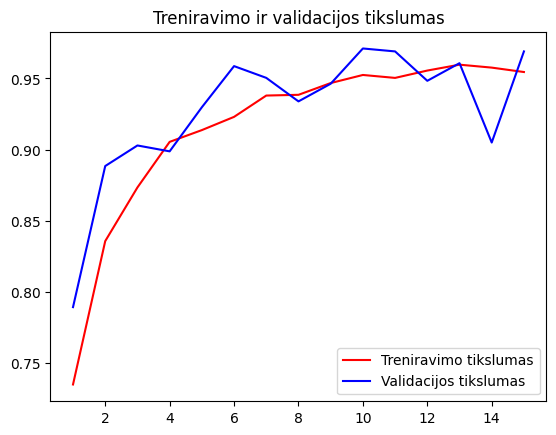

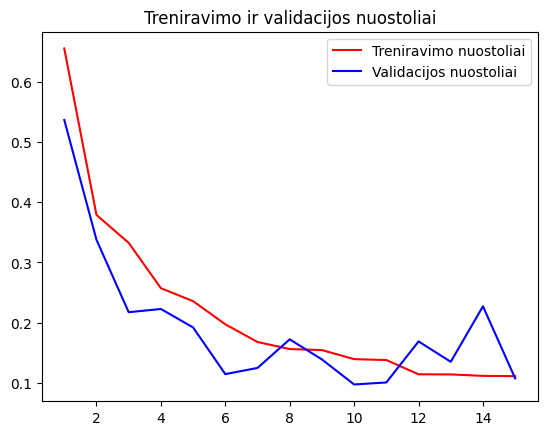

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_nadam_fold_0.h5


<ipython-input-28-a31f19bb1e7b>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 6s 197ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.97      0.97      0.97       203
   pneumonia       0.97      0.94      0.95       139
     regular       0.95      0.97      0.96       263

    accuracy                           0.96       605
   macro avg       0.96      0.96      0.96       605
weighted avg       0.96      0.96      0.96       605

Accuracy: 0.9586776859504132
Specificity for covid: 0.98
Specificity for pneumonia: 0.99
Specificity for regular: 0.96
Macro-average Specificity: 0.98


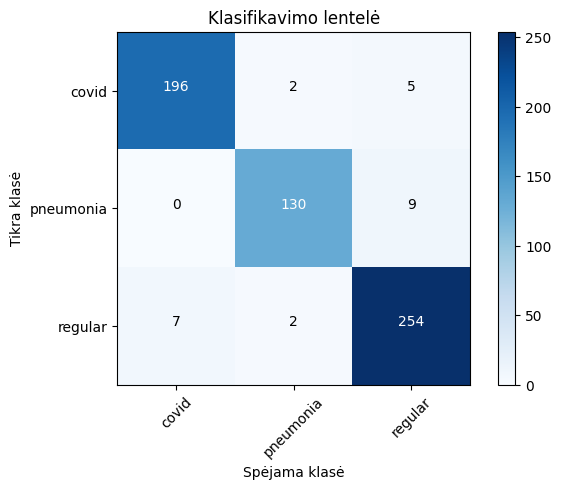

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 1
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 61s 646ms/step - loss: 0.6744 - accuracy: 0.7147 - auc_2: 0.8828 - val_loss: 0.4890 - val_accuracy: 0.7872 - val_auc_2: 0.9360
Epoch 2/30
61/61 [==============================] - 37s 604ms/step - loss: 0.3813 - accuracy: 0.8512 - auc_2: 0.9602 - val_loss: 0.3942 - val_accuracy: 0.8574 - val_auc_2: 0.9552
Epoch 3/30
61/61 [==============================] - 38s 613ms/step - loss: 0.3228 - accuracy: 0.8760 - auc_2: 0.9706 - val_loss: 0.3111 - val_accuracy: 0.8946 - val_auc_2: 0.9699
Epoch 4/30
61/61 [==============================] - 39s 631ms/step - loss: 0.2894 - accuracy: 0.8894 - auc_2: 0.9762 - val_loss: 0.2041 - val_accuracy: 

<ipython-input-26-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-26-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-26-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-26-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

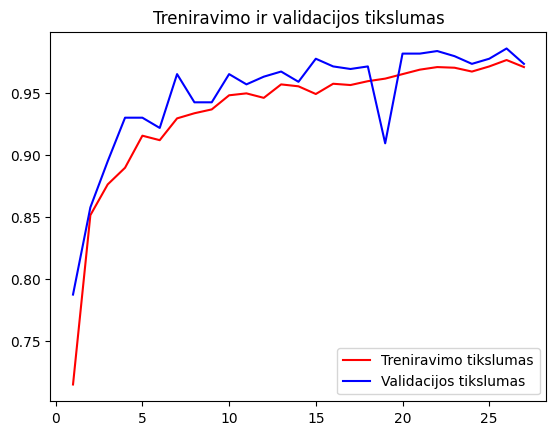

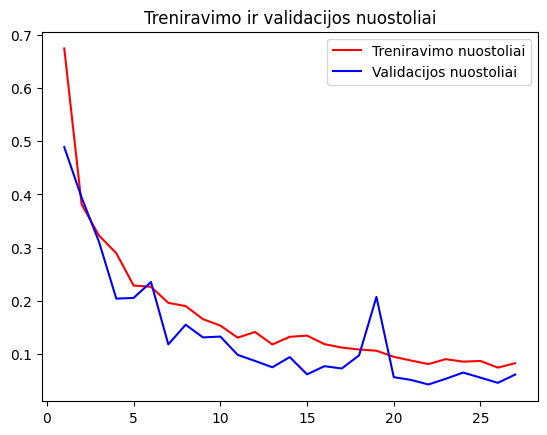

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_nadam_fold_1.h5


<ipython-input-28-a31f19bb1e7b>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 5s 126ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.97      1.00      0.99       175
   pneumonia       0.98      0.95      0.97       152
     regular       0.98      0.97      0.98       278

    accuracy                           0.98       605
   macro avg       0.98      0.98      0.98       605
weighted avg       0.98      0.98      0.98       605

Accuracy: 0.9768595041322314
Specificity for covid: 0.99
Specificity for pneumonia: 0.99
Specificity for regular: 0.98
Macro-average Specificity: 0.99


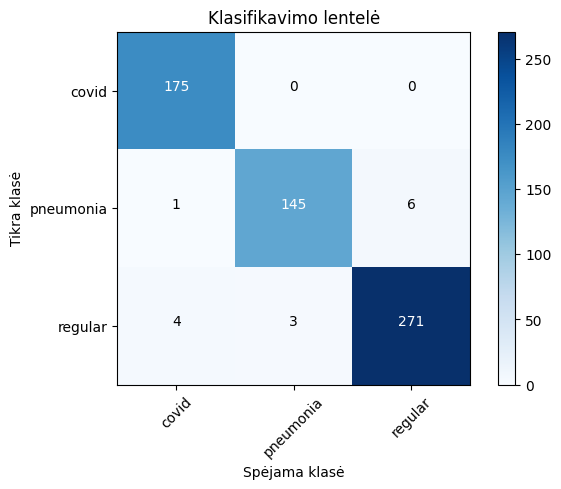

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 2
Class index 0: Weight 1.12
Class index 1: Weight 1.36
Class index 2: Weight 0.73
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 60s 642ms/step - loss: 0.6551 - accuracy: 0.7209 - auc_3: 0.8873 - val_loss: 0.8359 - val_accuracy: 0.6612 - val_auc_3: 0.8539
Epoch 2/30
61/61 [==============================] - 41s 666ms/step - loss: 0.3958 - accuracy: 0.8553 - auc_3: 0.9584 - val_loss: 0.4545 - val_accuracy: 0.8223 - val_auc_3: 0.9462
Epoch 3/30
61/61 [==============================] - 37s 603ms/step - loss: 0.3359 - accuracy: 0.8641 - auc_3: 0.9689 - val_loss: 0.2863 - val_accuracy: 0.9008 - val_auc_3: 0.9775
Epoch 4/30
61/61 [==============================] - 37s 597ms/step - loss: 0.2871 - accuracy: 0.8806 - auc_3: 0.9769 - val_loss: 0.2495 - val_accuracy: 

<ipython-input-26-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-26-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-26-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-26-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

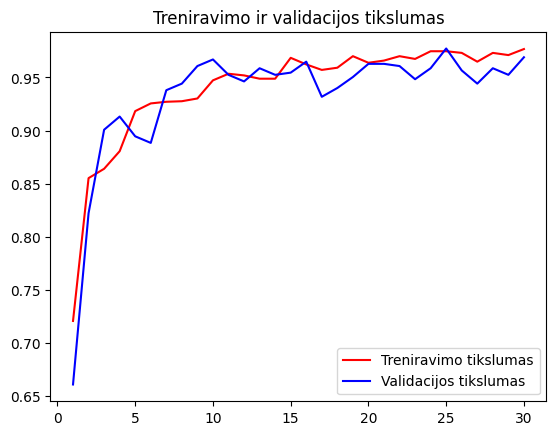

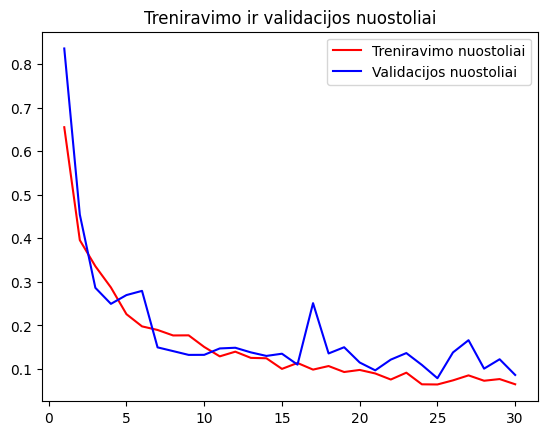

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_nadam_fold_2.h5


<ipython-input-28-a31f19bb1e7b>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 87ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.98      0.97      0.97       180
   pneumonia       0.99      0.99      0.99       136
     regular       0.98      0.99      0.98       289

    accuracy                           0.98       605
   macro avg       0.98      0.98      0.98       605
weighted avg       0.98      0.98      0.98       605

Accuracy: 0.9818181818181818
Specificity for covid: 0.99
Specificity for pneumonia: 1.00
Specificity for regular: 0.98
Macro-average Specificity: 0.99


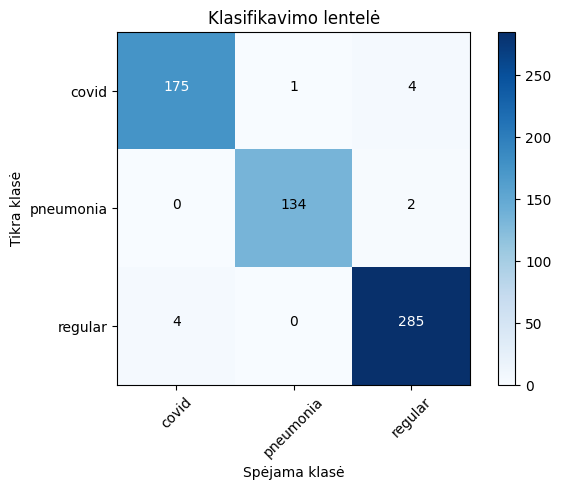

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 3
Class index 0: Weight 1.13
Class index 1: Weight 1.39
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 63s 650ms/step - loss: 0.7127 - accuracy: 0.7044 - auc_4: 0.8699 - val_loss: 0.7906 - val_accuracy: 0.6446 - val_auc_4: 0.8553
Epoch 2/30
61/61 [==============================] - 39s 629ms/step - loss: 0.4169 - accuracy: 0.8398 - auc_4: 0.9547 - val_loss: 0.4090 - val_accuracy: 0.8471 - val_auc_4: 0.9542
Epoch 3/30
61/61 [==============================] - 37s 613ms/step - loss: 0.3114 - accuracy: 0.8832 - auc_4: 0.9737 - val_loss: 0.3873 - val_accuracy: 0.8512 - val_auc_4: 0.9593
Epoch 4/30
61/61 [==============================] - 37s 605ms/step - loss: 0.2923 - accuracy: 0.8853 - auc_4: 0.9751 - val_loss: 0.2555 - val_accuracy: 

<ipython-input-26-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-26-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-26-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-26-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

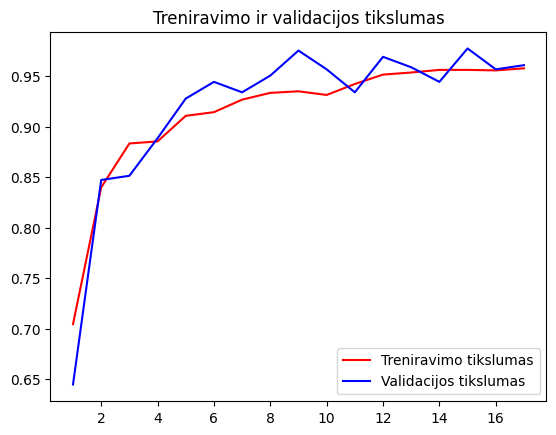

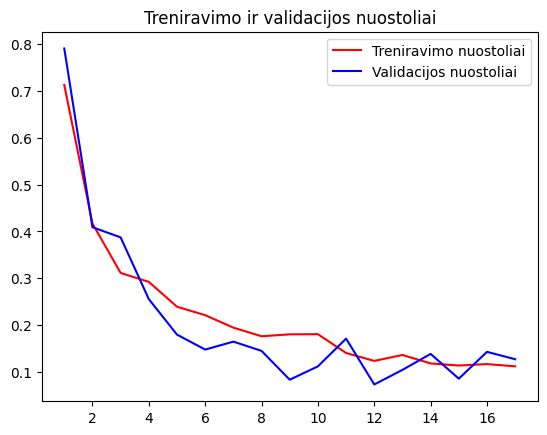

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_nadam_fold_3.h5


<ipython-input-28-a31f19bb1e7b>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 84ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.99      0.90      0.94       187
   pneumonia       0.92      0.98      0.95       145
     regular       0.94      0.96      0.95       273

    accuracy                           0.95       605
   macro avg       0.95      0.95      0.95       605
weighted avg       0.95      0.95      0.95       605

Accuracy: 0.947107438016529
Specificity for covid: 1.00
Specificity for pneumonia: 0.97
Specificity for regular: 0.95
Macro-average Specificity: 0.97


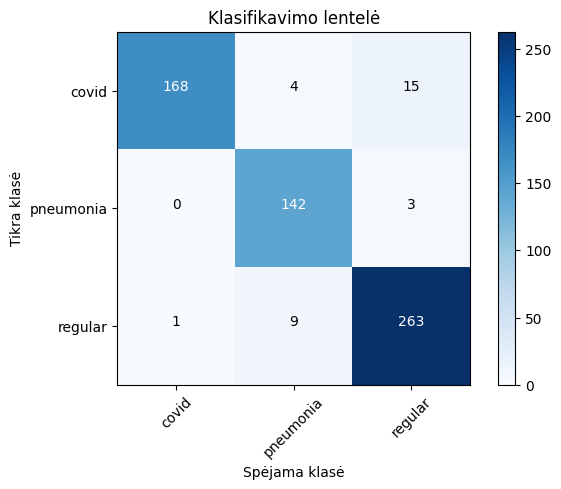

Found 1936 images belonging to 3 classes.
Found 604 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 4
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 64s 667ms/step - loss: 0.6812 - accuracy: 0.7102 - auc_5: 0.8781 - val_loss: 0.5186 - val_accuracy: 0.7851 - val_auc_5: 0.9306
Epoch 2/30
61/61 [==============================] - 38s 615ms/step - loss: 0.3822 - accuracy: 0.8554 - auc_5: 0.9596 - val_loss: 0.4005 - val_accuracy: 0.8512 - val_auc_5: 0.9573
Epoch 3/30
61/61 [==============================] - 38s 624ms/step - loss: 0.3088 - accuracy: 0.8786 - auc_5: 0.9733 - val_loss: 0.3838 - val_accuracy: 0.8595 - val_auc_5: 0.9612
Epoch 4/30
61/61 [==============================] - 38s 618ms/step - loss: 0.2706 - accuracy: 0.8951 - auc_5: 0.9796 - val_loss: 0.4616 - val_accuracy: 

<ipython-input-26-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-26-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-26-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-26-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

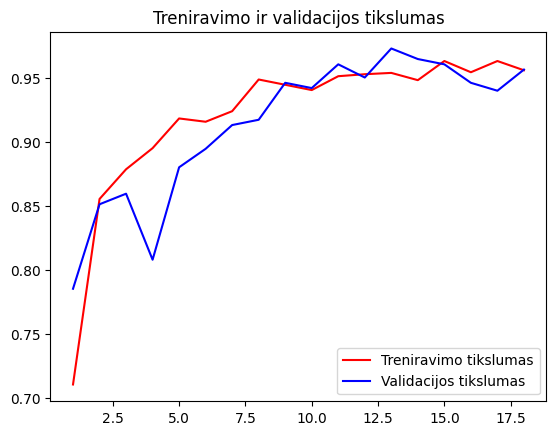

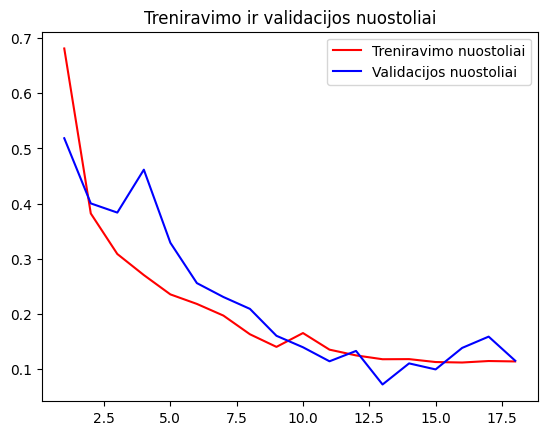

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_nadam_fold_4.h5


<ipython-input-28-a31f19bb1e7b>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 6s 194ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.97      0.97      0.97       173
   pneumonia       0.98      0.94      0.96       154
     regular       0.96      0.99      0.98       277

    accuracy                           0.97       604
   macro avg       0.97      0.97      0.97       604
weighted avg       0.97      0.97      0.97       604

Accuracy: 0.9701986754966887
Specificity for covid: 0.99
Specificity for pneumonia: 0.99
Specificity for regular: 0.97
Macro-average Specificity: 0.98


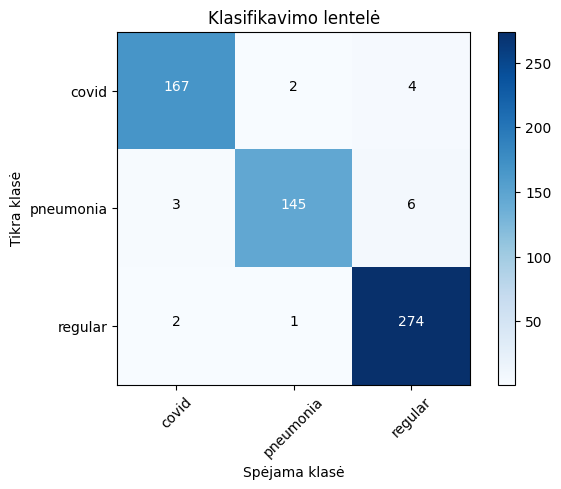

Final Metrics Across All Folds:
Average Accuracy: 0.97 ± 0.01
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.98 ± 0.01
Class covid - Average Recall: 0.96 ± 0.03
Class covid - Average F1 Score: 0.97 ± 0.01
Class pneumonia - Average Precision: 0.97 ± 0.03
Class pneumonia - Average Recall: 0.96 ± 0.02
Class pneumonia - Average F1 Score: 0.96 ± 0.01
Class regular - Average Precision: 0.96 ± 0.02
Class regular - Average Recall: 0.98 ± 0.01
Class regular - Average F1 Score: 0.97 ± 0.01


In [ ]:
# For overall results
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    base_dir = f'/content/image_dataset/splits/fold_{fold}'
    train_dir = os.path.join(base_dir, 'train')
    test_dir = os.path.join(base_dir, 'test')
    val_dir = os.path.join(base_dir, 'val')


    # Data generators
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
        shuffle=False
    )

    val_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'
    )

    # Compute class weights
    class_weights_array = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_generator.classes),
        y=train_generator.classes
    )
    class_weights = {i: weight for i, weight in enumerate(class_weights_array)}

    print(f"Training fold {fold}")

    # Print the computed class weights
    for class_index, weight in class_weights.items():
        print(f"Class index {class_index}: Weight {weight:.2f}")

    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

    # Calculate the number of layers to make trainable
    total_layers = len(base_model.layers)
    layers_to_train = int(total_layers * 0.30)  # 30% of the total number of layers

    # Make the first 30% of layers trainable
    for layer in base_model.layers[:layers_to_train]:
        layer.trainable = True

    # Freeze the rest of the layers
    for layer in base_model.layers[layers_to_train:]:
        layer.trainable = False

    # Freeze the layers of the base model
    #base_model.trainable = False


    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  # Dropout added here
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)  # Another Dropout layer
    # Add a fully connected layer for classification
    output_layer = Dense(3, activation='softmax')(x)


    # Construct the final model
    model = Model(inputs=base_model.input, outputs=output_layer)

    #optimizer
    my_optimizer = Nadam(learning_rate=0.001)

    # Compile the model
    model.compile(optimizer=my_optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy', AUC()])

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


    #model params
    total_params = model.count_params()
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    non_trainable_params = total_params - trainable_params

    print(f"Total parameters: {total_params}")
    print(f"Trainable parameters: {trainable_params}")
    print(f"Non-trainable parameters: {non_trainable_params}")

    # Train the model
    history = model.fit(
        train_generator,
        epochs=30,
        validation_data=val_generator,
        class_weight=class_weights,
        callbacks=[early_stopping]
    )

    #training results
    plot_training(history)

    # Save the model
    model_save_path = f'/content/drive/MyDrive/Bakis/ModelOutputs/cross_nadam_fold_{fold}.h5'
    model.save(model_save_path)
    print(f"Model saved to {model_save_path}")


    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## Focal loss + nadam + 0.001

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 0
Class index 0: Weight 1.15
Class index 1: Weight 1.37
Class index 2: Weight 0.71
16705208/16705208 [==============================] - 2s 0us/step
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 53s 433ms/step - loss: 1.4361 - accuracy: 0.6977 - auc: 0.8586 - val_loss: 1.1635 - val_accuracy: 0.6095 - val_auc: 0.8475
Epoch 2/30
61/61 [==============================] - 27s 445ms/step - loss: 0.8162 - accuracy: 0.8072 - auc: 0.9365 - val_loss: 0.6607 - val_accuracy: 0.8698 - val_auc: 0.9489
Epoch 3/30
61/61 [==============================] - 26s 422ms/step - loss: 0.5204 - accuracy: 0.8713 - auc: 0.9685 - val_loss: 0.4292 - val_accuracy: 0.9029 - val_auc: 0.9760
Epoch 4/30
61/61 [==============================] - 27s 432ms/step - loss: 0.5296 - accuracy: 0.870

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

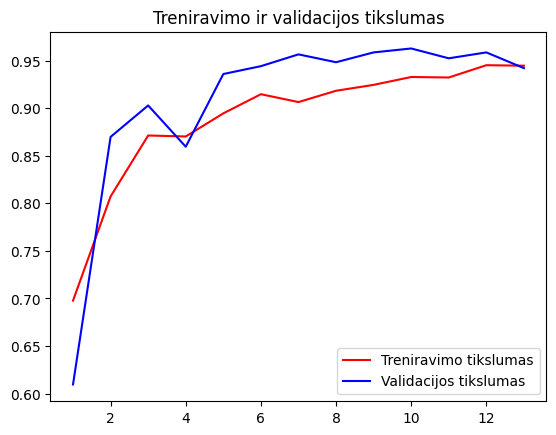

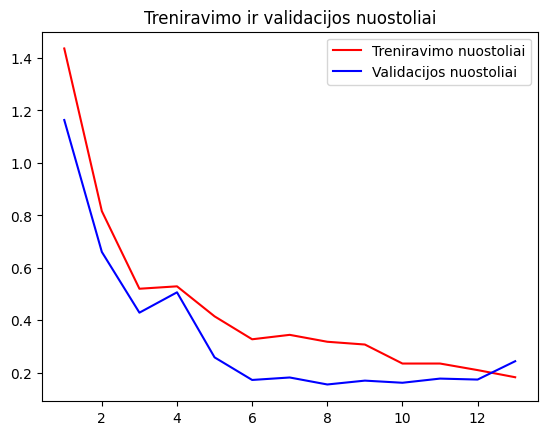

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_nadam_fold_0.h5


<ipython-input-22-857e94c20203>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 4s 142ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.94      0.94      0.94       203
   pneumonia       0.92      0.97      0.95       139
     regular       0.95      0.93      0.94       263

    accuracy                           0.94       605
   macro avg       0.94      0.94      0.94       605
weighted avg       0.94      0.94      0.94       605

Accuracy: 0.9404958677685951
Specificity for covid: 0.97
Specificity for pneumonia: 0.98
Specificity for regular: 0.96
Macro-average Specificity: 0.97


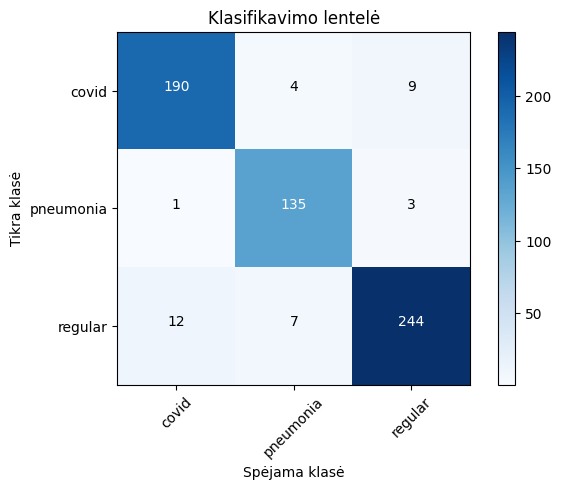

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 1
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 42s 385ms/step - loss: 1.4502 - accuracy: 0.6992 - auc_1: 0.8526 - val_loss: 1.2221 - val_accuracy: 0.6550 - val_auc_1: 0.8444
Epoch 2/30
61/61 [==============================] - 26s 430ms/step - loss: 0.7583 - accuracy: 0.8160 - auc_1: 0.9453 - val_loss: 0.6278 - val_accuracy: 0.8368 - val_auc_1: 0.9508
Epoch 3/30
61/61 [==============================] - 26s 423ms/step - loss: 0.5802 - accuracy: 0.8651 - auc_1: 0.9642 - val_loss: 0.7463 - val_accuracy: 0.8079 - val_auc_1: 0.9419
Epoch 4/30
61/61 [==============================] - 26s 430ms/step - loss: 0.5208 - accuracy: 0.8801 - auc_1: 0.9697 - val_loss: 0.3075 - val_accuracy: 

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

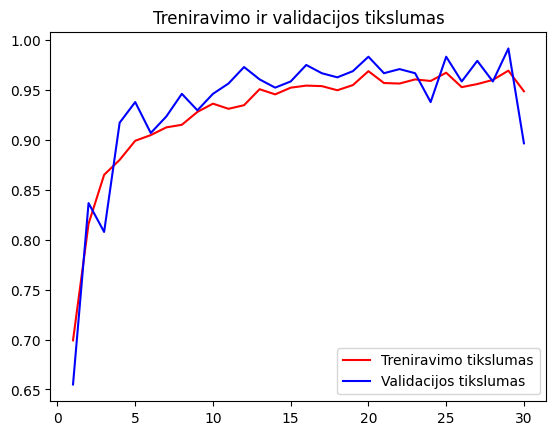

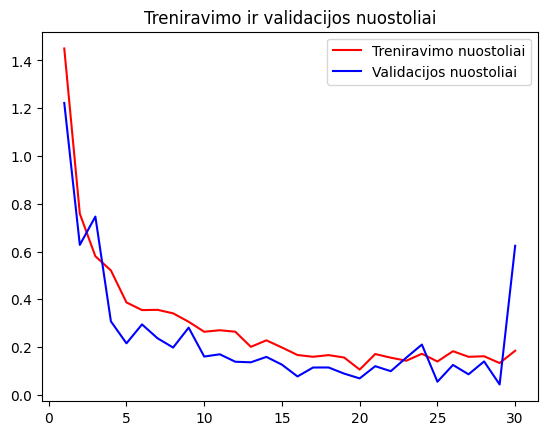

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_nadam_fold_1.h5


<ipython-input-22-857e94c20203>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 70ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.74      0.98      0.84       175
   pneumonia       0.95      0.81      0.88       152
     regular       0.95      0.84      0.89       278

    accuracy                           0.87       605
   macro avg       0.88      0.87      0.87       605
weighted avg       0.89      0.87      0.87       605

Accuracy: 0.8710743801652893
Specificity for covid: 0.86
Specificity for pneumonia: 0.99
Specificity for regular: 0.97
Macro-average Specificity: 0.94


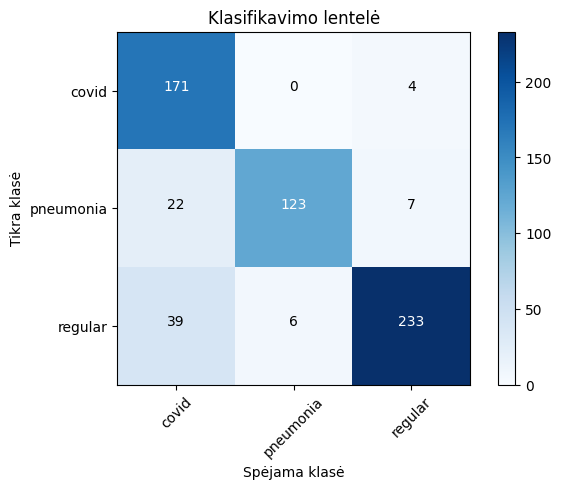

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 2
Class index 0: Weight 1.12
Class index 1: Weight 1.36
Class index 2: Weight 0.73
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 42s 389ms/step - loss: 1.4329 - accuracy: 0.6961 - auc_2: 0.8607 - val_loss: 1.8852 - val_accuracy: 0.4897 - val_auc_2: 0.7543
Epoch 2/30
61/61 [==============================] - 27s 431ms/step - loss: 0.8948 - accuracy: 0.8057 - auc_2: 0.9338 - val_loss: 0.6659 - val_accuracy: 0.8182 - val_auc_2: 0.9469
Epoch 3/30
61/61 [==============================] - 27s 438ms/step - loss: 0.6205 - accuracy: 0.8512 - auc_2: 0.9581 - val_loss: 0.4897 - val_accuracy: 0.8740 - val_auc_2: 0.9691
Epoch 4/30
61/61 [==============================] - 27s 439ms/step - loss: 0.4454 - accuracy: 0.8765 - auc_2: 0.9741 - val_loss: 0.3397 - val_accuracy: 

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

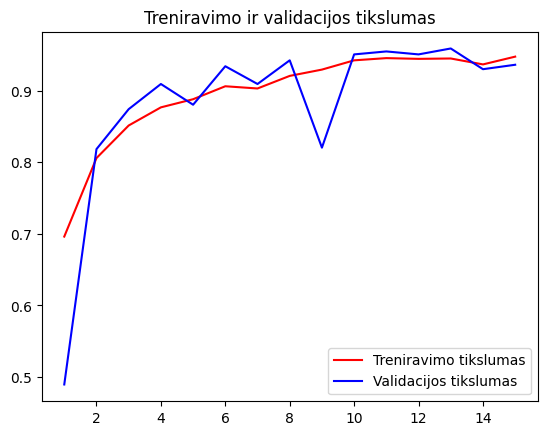

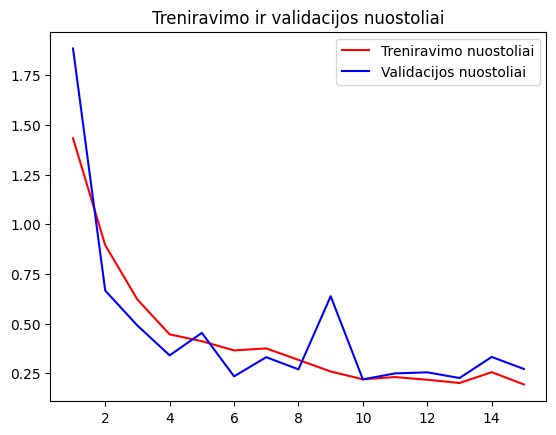

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_nadam_fold_2.h5


<ipython-input-22-857e94c20203>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 68ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.93      0.94      0.94       180
   pneumonia       0.94      0.93      0.94       136
     regular       0.95      0.95      0.95       289

    accuracy                           0.94       605
   macro avg       0.94      0.94      0.94       605
weighted avg       0.94      0.94      0.94       605

Accuracy: 0.9421487603305785
Specificity for covid: 0.97
Specificity for pneumonia: 0.98
Specificity for regular: 0.95
Macro-average Specificity: 0.97


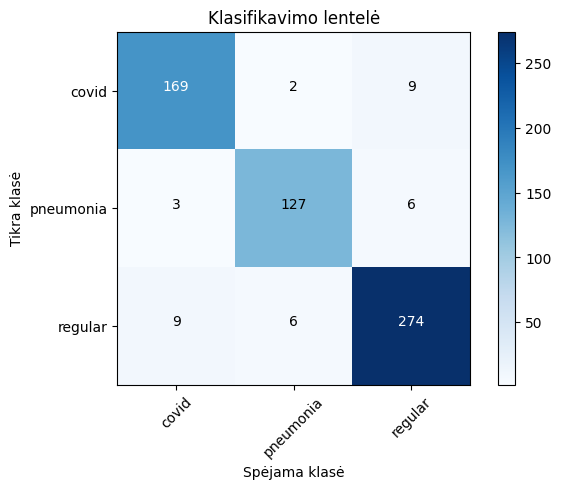

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 3
Class index 0: Weight 1.13
Class index 1: Weight 1.39
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 43s 400ms/step - loss: 1.4175 - accuracy: 0.6977 - auc_3: 0.8599 - val_loss: 0.8194 - val_accuracy: 0.7851 - val_auc_3: 0.9275
Epoch 2/30
61/61 [==============================] - 27s 446ms/step - loss: 0.8467 - accuracy: 0.7984 - auc_3: 0.9345 - val_loss: 0.5198 - val_accuracy: 0.8616 - val_auc_3: 0.9665
Epoch 3/30
61/61 [==============================] - 27s 446ms/step - loss: 0.5597 - accuracy: 0.8708 - auc_3: 0.9656 - val_loss: 0.3863 - val_accuracy: 0.8616 - val_auc_3: 0.9783
Epoch 4/30
61/61 [==============================] - 27s 444ms/step - loss: 0.4816 - accuracy: 0.8775 - auc_3: 0.9728 - val_loss: 0.3247 - val_accuracy: 

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

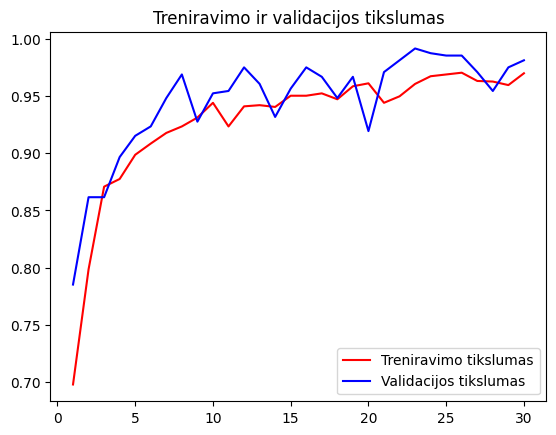

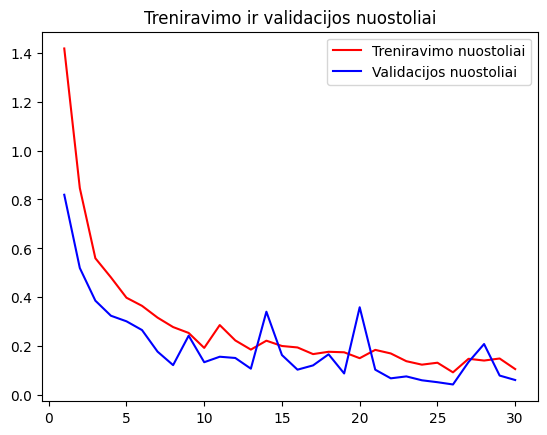

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_nadam_fold_3.h5


<ipython-input-22-857e94c20203>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 4s 63ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.99      0.98      0.98       187
   pneumonia       0.99      0.97      0.98       145
     regular       0.97      0.99      0.98       273

    accuracy                           0.98       605
   macro avg       0.98      0.98      0.98       605
weighted avg       0.98      0.98      0.98       605

Accuracy: 0.9818181818181818
Specificity for covid: 1.00
Specificity for pneumonia: 1.00
Specificity for regular: 0.98
Macro-average Specificity: 0.99


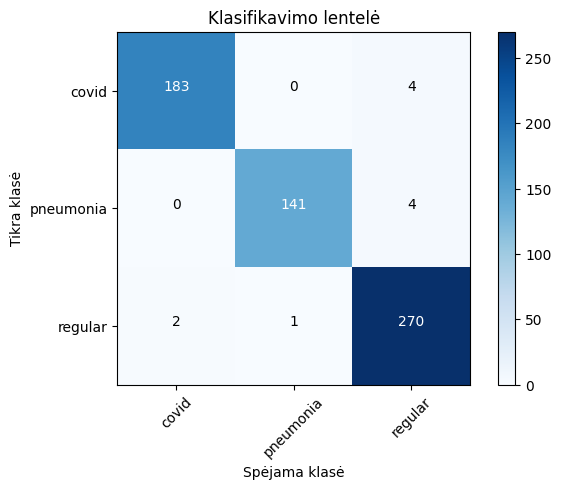

Found 1936 images belonging to 3 classes.
Found 604 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 4
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 42s 394ms/step - loss: 1.4241 - accuracy: 0.6849 - auc_4: 0.8619 - val_loss: 2.0043 - val_accuracy: 0.5847 - val_auc_4: 0.8143
Epoch 2/30
61/61 [==============================] - 27s 442ms/step - loss: 0.7865 - accuracy: 0.8161 - auc_4: 0.9427 - val_loss: 0.8165 - val_accuracy: 0.8202 - val_auc_4: 0.9322
Epoch 3/30
61/61 [==============================] - 27s 440ms/step - loss: 0.5619 - accuracy: 0.8636 - auc_4: 0.9657 - val_loss: 0.8982 - val_accuracy: 0.7645 - val_auc_4: 0.9304
Epoch 4/30
61/61 [==============================] - 27s 437ms/step - loss: 0.4679 - accuracy: 0.8858 - auc_4: 0.9743 - val_loss: 0.5137 - val_accuracy: 

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

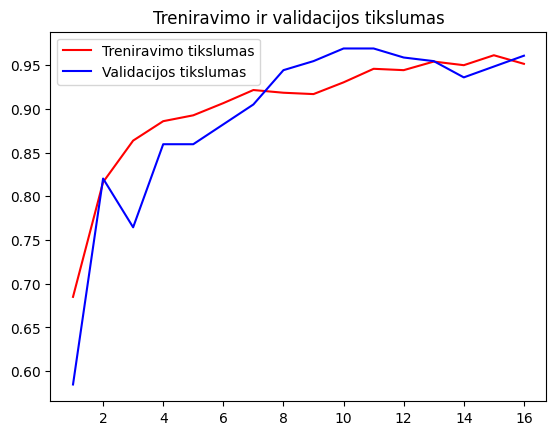

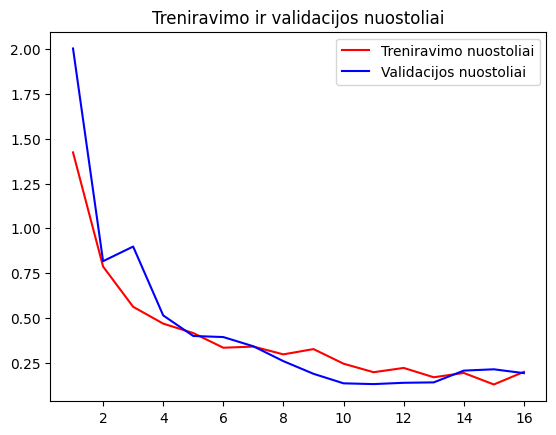

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_nadam_fold_4.h5


<ipython-input-22-857e94c20203>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 4s 141ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.99      0.94      0.96       173
   pneumonia       0.99      0.88      0.93       154
     regular       0.91      0.99      0.95       277

    accuracy                           0.95       604
   macro avg       0.96      0.94      0.95       604
weighted avg       0.95      0.95      0.95       604

Accuracy: 0.9503311258278145
Specificity for covid: 1.00
Specificity for pneumonia: 1.00
Specificity for regular: 0.92
Macro-average Specificity: 0.97


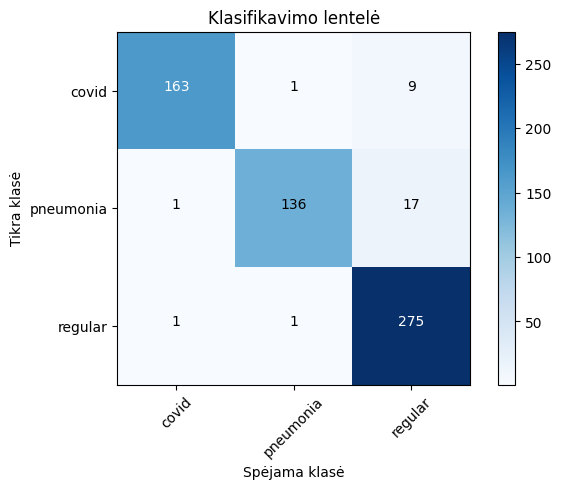

Final Metrics Across All Folds:
Average Accuracy: 0.94 ± 0.04
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.92 ± 0.09
Class covid - Average Recall: 0.95 ± 0.02
Class covid - Average F1 Score: 0.93 ± 0.05
Class pneumonia - Average Precision: 0.96 ± 0.03
Class pneumonia - Average Recall: 0.91 ± 0.06
Class pneumonia - Average F1 Score: 0.93 ± 0.03
Class regular - Average Precision: 0.95 ± 0.02
Class regular - Average Recall: 0.94 ± 0.06
Class regular - Average F1 Score: 0.94 ± 0.03


In [ ]:
# For overall results
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    base_dir = f'/content/image_dataset/splits/fold_{fold}'
    train_dir = os.path.join(base_dir, 'train')
    test_dir = os.path.join(base_dir, 'test')
    val_dir = os.path.join(base_dir, 'val')


    # Data generators
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
        shuffle=False
    )

    val_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'
    )

    # Compute class weights
    class_weights_array = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_generator.classes),
        y=train_generator.classes
    )
    class_weights = {i: weight for i, weight in enumerate(class_weights_array)}

    print(f"Training fold {fold}")

    # Print the computed class weights
    for class_index, weight in class_weights.items():
        print(f"Class index {class_index}: Weight {weight:.2f}")

    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

    # Calculate the number of layers to make trainable
    total_layers = len(base_model.layers)
    layers_to_train = int(total_layers * 0.30)  # 30% of the total number of layers

    # Make the first 30% of layers trainable
    for layer in base_model.layers[:layers_to_train]:
        layer.trainable = True

    # Freeze the rest of the layers
    for layer in base_model.layers[layers_to_train:]:
        layer.trainable = False

    # Freeze the layers of the base model
    #base_model.trainable = False


    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  # Dropout added here
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)  # Another Dropout layer
    # Add a fully connected layer for classification
    output_layer = Dense(3, activation='softmax')(x)


    # Construct the final model
    model = Model(inputs=base_model.input, outputs=output_layer)

    #optimizer
    my_optimizer = Nadam(learning_rate=0.001)

    # Compile the model
    model.compile(optimizer=my_optimizer, loss=focal_loss(), metrics=['accuracy', AUC()])

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


    #model params
    total_params = model.count_params()
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    non_trainable_params = total_params - trainable_params

    print(f"Total parameters: {total_params}")
    print(f"Trainable parameters: {trainable_params}")
    print(f"Non-trainable parameters: {non_trainable_params}")

    # Train the model
    history = model.fit(
        train_generator,
        epochs=30,
        validation_data=val_generator,
        class_weight=class_weights,
        callbacks=[early_stopping]
    )

    #training results
    plot_training(history)

    # Save the model
    model_save_path = f'/content/drive/MyDrive/Bakis/ModelOutputs/focal_nadam_fold_{fold}.h5'
    model.save(model_save_path)
    print(f"Model saved to {model_save_path}")


    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## Cross entropy + sgd + 0.01

In [ ]:
from tensorflow.keras.optimizers import SGD

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 0
Class index 0: Weight 1.15
Class index 1: Weight 1.37
Class index 2: Weight 0.71
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 38s 420ms/step - loss: 0.8347 - accuracy: 0.6486 - auc_5: 0.8243 - val_loss: 1.0656 - val_accuracy: 0.6012 - val_auc_5: 0.7950
Epoch 2/30
61/61 [==============================] - 27s 437ms/step - loss: 0.4957 - accuracy: 0.8083 - auc_5: 0.9355 - val_loss: 0.7901 - val_accuracy: 0.6694 - val_auc_5: 0.8804
Epoch 3/30
61/61 [==============================] - 26s 430ms/step - loss: 0.4347 - accuracy: 0.8367 - auc_5: 0.9490 - val_loss: 0.5350 - val_accuracy: 0.7975 - val_auc_5: 0.9280
Epoch 4/30
61/61 [==============================] - 27s 440ms/step - loss: 0.3885 - accuracy: 0.8491 - auc_5: 0.9599 - val_loss: 0.2671 - val_accuracy: 

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

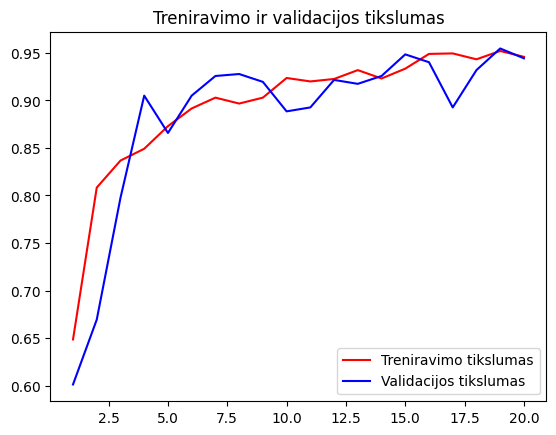

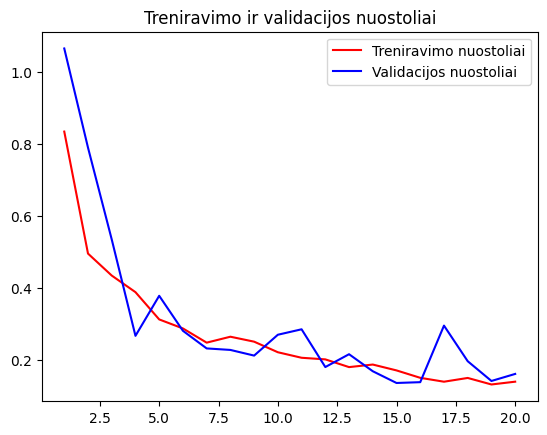

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_sgd_fold_0.h5


<ipython-input-24-6063d8b55738>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 68ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.91      0.94      0.93       203
   pneumonia       0.93      0.91      0.92       139
     regular       0.94      0.94      0.94       263

    accuracy                           0.93       605
   macro avg       0.93      0.93      0.93       605
weighted avg       0.93      0.93      0.93       605

Accuracy: 0.9305785123966942
Specificity for covid: 0.96
Specificity for pneumonia: 0.98
Specificity for regular: 0.96
Macro-average Specificity: 0.96


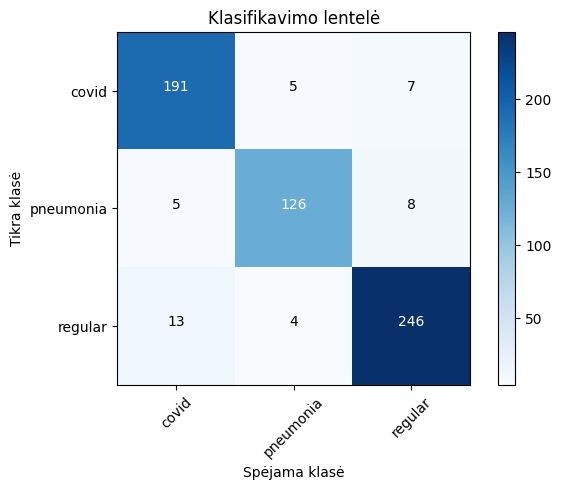

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 1
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 37s 436ms/step - loss: 0.8058 - accuracy: 0.6517 - auc_6: 0.8300 - val_loss: 0.9704 - val_accuracy: 0.5661 - val_auc_6: 0.7976
Epoch 2/30
61/61 [==============================] - 27s 431ms/step - loss: 0.5734 - accuracy: 0.7809 - auc_6: 0.9165 - val_loss: 0.9141 - val_accuracy: 0.5930 - val_auc_6: 0.8421
Epoch 3/30
61/61 [==============================] - 27s 435ms/step - loss: 0.5265 - accuracy: 0.8098 - auc_6: 0.9294 - val_loss: 0.5069 - val_accuracy: 0.7934 - val_auc_6: 0.9292
Epoch 4/30
61/61 [==============================] - 27s 433ms/step - loss: 0.4051 - accuracy: 0.8475 - auc_6: 0.9567 - val_loss: 0.3416 - val_accuracy: 

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

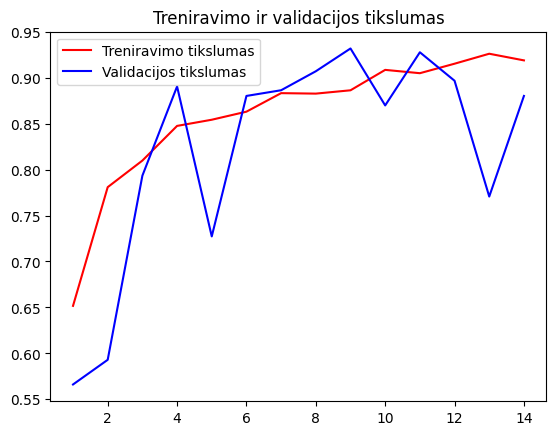

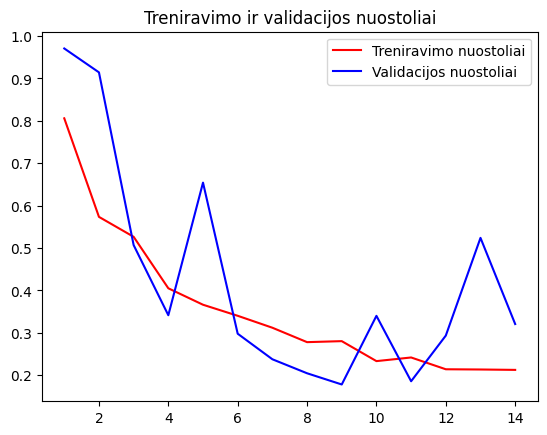

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_sgd_fold_1.h5


<ipython-input-24-6063d8b55738>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 68ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.98      0.96      0.97       175
   pneumonia       0.99      0.92      0.95       152
     regular       0.94      0.98      0.96       278

    accuracy                           0.96       605
   macro avg       0.97      0.95      0.96       605
weighted avg       0.96      0.96      0.96       605

Accuracy: 0.9603305785123967
Specificity for covid: 0.99
Specificity for pneumonia: 1.00
Specificity for regular: 0.94
Macro-average Specificity: 0.98


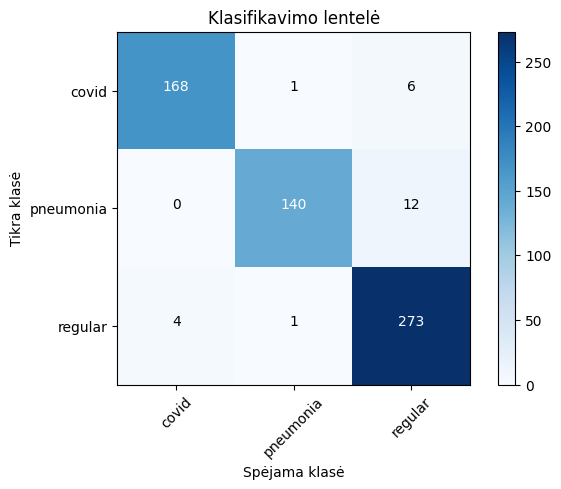

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 2
Class index 0: Weight 1.12
Class index 1: Weight 1.36
Class index 2: Weight 0.73
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 36s 432ms/step - loss: 0.8423 - accuracy: 0.6289 - auc_7: 0.8180 - val_loss: 0.8369 - val_accuracy: 0.6715 - val_auc_7: 0.8261
Epoch 2/30
61/61 [==============================] - 26s 425ms/step - loss: 0.5291 - accuracy: 0.7943 - auc_7: 0.9279 - val_loss: 0.6423 - val_accuracy: 0.7252 - val_auc_7: 0.8943
Epoch 3/30
61/61 [==============================] - 26s 428ms/step - loss: 0.4231 - accuracy: 0.8346 - auc_7: 0.9507 - val_loss: 0.7387 - val_accuracy: 0.6901 - val_auc_7: 0.8747
Epoch 4/30
61/61 [==============================] - 26s 430ms/step - loss: 0.3805 - accuracy: 0.8537 - auc_7: 0.9604 - val_loss: 0.3771 - val_accuracy: 

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

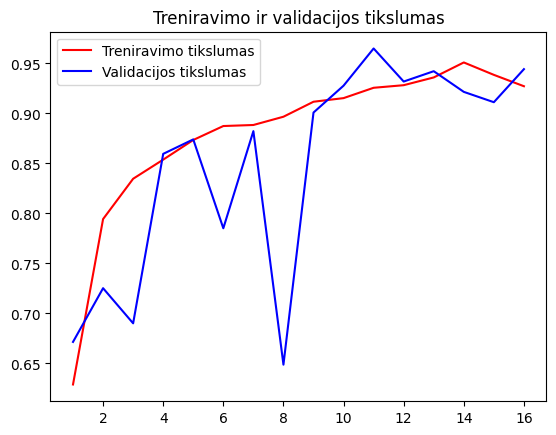

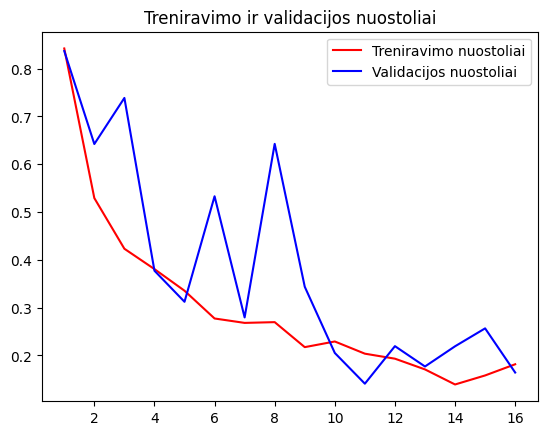

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_sgd_fold_2.h5


<ipython-input-24-6063d8b55738>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 67ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.89      0.99      0.94       180
   pneumonia       0.95      0.92      0.94       136
     regular       0.97      0.92      0.95       289

    accuracy                           0.94       605
   macro avg       0.94      0.94      0.94       605
weighted avg       0.94      0.94      0.94       605

Accuracy: 0.9421487603305785
Specificity for covid: 0.95
Specificity for pneumonia: 0.99
Specificity for regular: 0.97
Macro-average Specificity: 0.97


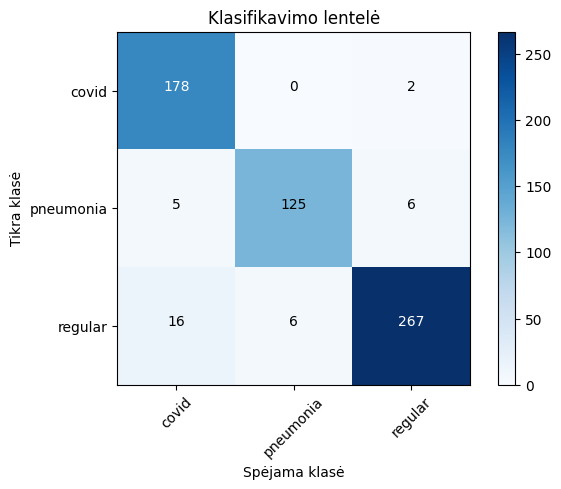

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 3
Class index 0: Weight 1.13
Class index 1: Weight 1.39
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 38s 435ms/step - loss: 0.8536 - accuracy: 0.6212 - auc_8: 0.8108 - val_loss: 0.7350 - val_accuracy: 0.6529 - val_auc_8: 0.8575
Epoch 2/30
61/61 [==============================] - 26s 430ms/step - loss: 0.5680 - accuracy: 0.7850 - auc_8: 0.9196 - val_loss: 0.5474 - val_accuracy: 0.7665 - val_auc_8: 0.9189
Epoch 3/30
61/61 [==============================] - 26s 430ms/step - loss: 0.4421 - accuracy: 0.8233 - auc_8: 0.9458 - val_loss: 0.5285 - val_accuracy: 0.7624 - val_auc_8: 0.9224
Epoch 4/30
61/61 [==============================] - 27s 432ms/step - loss: 0.3834 - accuracy: 0.8527 - auc_8: 0.9601 - val_loss: 0.4275 - val_accuracy: 

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

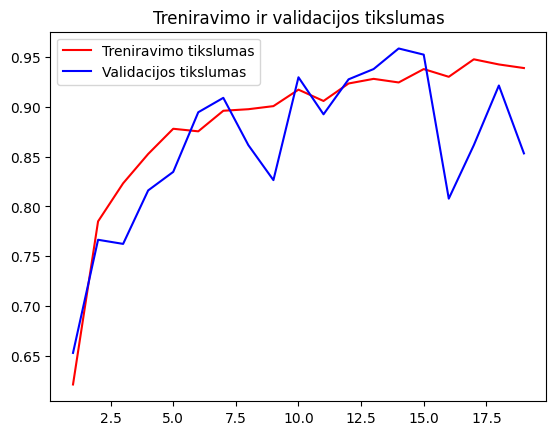

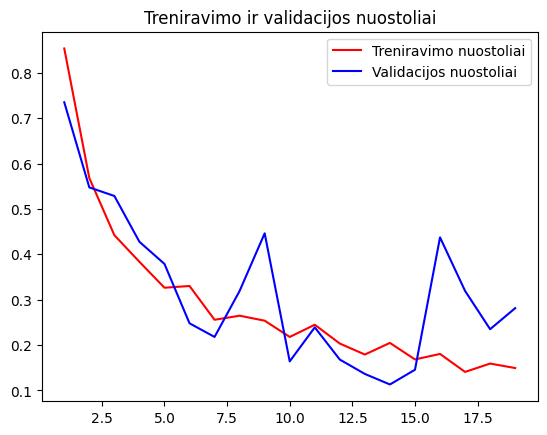

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_sgd_fold_3.h5


<ipython-input-24-6063d8b55738>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 68ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.97      0.94      0.95       187
   pneumonia       0.94      0.97      0.96       145
     regular       0.95      0.95      0.95       273

    accuracy                           0.95       605
   macro avg       0.95      0.95      0.95       605
weighted avg       0.95      0.95      0.95       605

Accuracy: 0.9520661157024793
Specificity for covid: 0.99
Specificity for pneumonia: 0.98
Specificity for regular: 0.95
Macro-average Specificity: 0.97


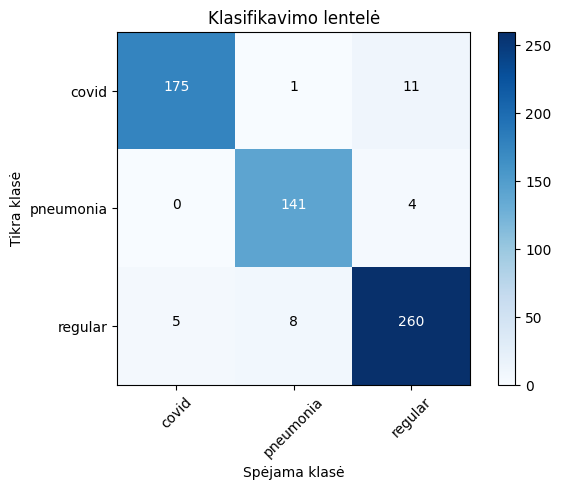

Found 1936 images belonging to 3 classes.
Found 604 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 4
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 37s 439ms/step - loss: 0.8420 - accuracy: 0.6395 - auc_9: 0.8132 - val_loss: 0.9094 - val_accuracy: 0.5971 - val_auc_9: 0.8053
Epoch 2/30
61/61 [==============================] - 27s 440ms/step - loss: 0.5923 - accuracy: 0.7660 - auc_9: 0.9121 - val_loss: 0.4456 - val_accuracy: 0.8326 - val_auc_9: 0.9552
Epoch 3/30
61/61 [==============================] - 27s 437ms/step - loss: 0.4943 - accuracy: 0.8110 - auc_9: 0.9349 - val_loss: 0.4923 - val_accuracy: 0.8037 - val_auc_9: 0.9406
Epoch 4/30
61/61 [==============================] - 27s 432ms/step - loss: 0.4117 - accuracy: 0.8466 - auc_9: 0.9559 - val_loss: 0.2931 - val_accuracy: 

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

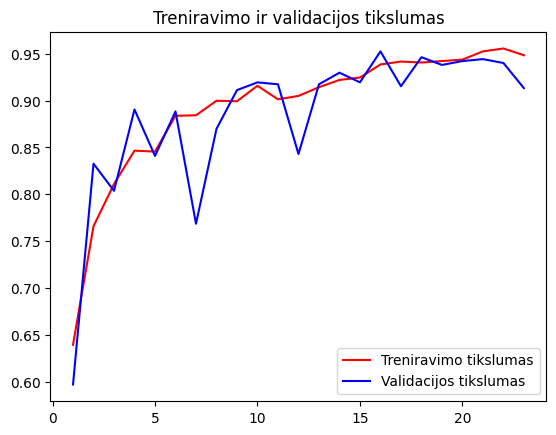

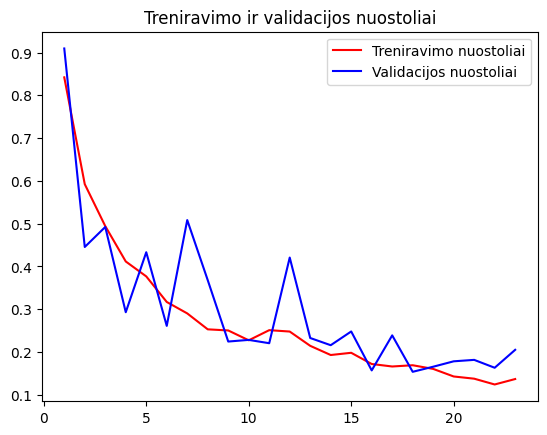

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_sgd_fold_4.h5


<ipython-input-24-6063d8b55738>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 65ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.98      0.89      0.93       173
   pneumonia       0.91      0.95      0.93       154
     regular       0.95      0.98      0.96       277

    accuracy                           0.95       604
   macro avg       0.95      0.94      0.94       604
weighted avg       0.95      0.95      0.95       604

Accuracy: 0.9470198675496688
Specificity for covid: 0.99
Specificity for pneumonia: 0.97
Specificity for regular: 0.95
Macro-average Specificity: 0.97


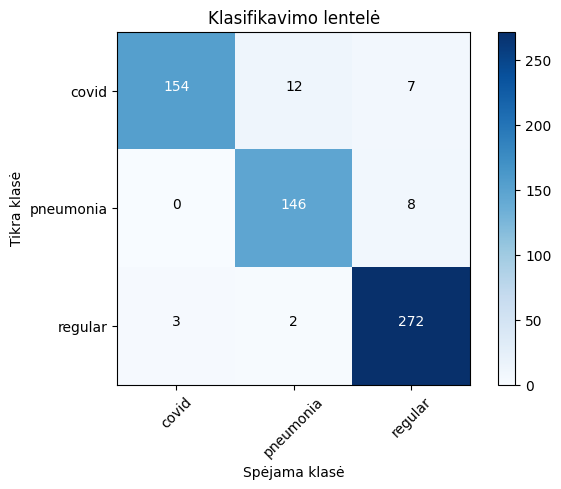

Final Metrics Across All Folds:
Average Accuracy: 0.95 ± 0.01
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.95 ± 0.04
Class covid - Average Recall: 0.94 ± 0.03
Class covid - Average F1 Score: 0.94 ± 0.01
Class pneumonia - Average Precision: 0.95 ± 0.02
Class pneumonia - Average Recall: 0.93 ± 0.02
Class pneumonia - Average F1 Score: 0.94 ± 0.01
Class regular - Average Precision: 0.95 ± 0.01
Class regular - Average Recall: 0.96 ± 0.02
Class regular - Average F1 Score: 0.95 ± 0.01


In [ ]:
# For overall results
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    base_dir = f'/content/image_dataset/splits/fold_{fold}'
    train_dir = os.path.join(base_dir, 'train')
    test_dir = os.path.join(base_dir, 'test')
    val_dir = os.path.join(base_dir, 'val')


    # Data generators
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
        shuffle=False
    )

    val_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'
    )

    # Compute class weights
    class_weights_array = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_generator.classes),
        y=train_generator.classes
    )
    class_weights = {i: weight for i, weight in enumerate(class_weights_array)}

    print(f"Training fold {fold}")

    # Print the computed class weights
    for class_index, weight in class_weights.items():
        print(f"Class index {class_index}: Weight {weight:.2f}")

    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

    # Calculate the number of layers to make trainable
    total_layers = len(base_model.layers)
    layers_to_train = int(total_layers * 0.30)  # 30% of the total number of layers

    # Make the first 30% of layers trainable
    for layer in base_model.layers[:layers_to_train]:
        layer.trainable = True

    # Freeze the rest of the layers
    for layer in base_model.layers[layers_to_train:]:
        layer.trainable = False

    # Freeze the layers of the base model
    #base_model.trainable = False


    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  # Dropout added here
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)  # Another Dropout layer
    # Add a fully connected layer for classification
    output_layer = Dense(3, activation='softmax')(x)


    # Construct the final model
    model = Model(inputs=base_model.input, outputs=output_layer)

    #optimizer
    my_optimizer = SGD(learning_rate=0.01, momentum=0.9)

    # Compile the model
    model.compile(optimizer=my_optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy', AUC()])

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


    #model params
    total_params = model.count_params()
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    non_trainable_params = total_params - trainable_params

    print(f"Total parameters: {total_params}")
    print(f"Trainable parameters: {trainable_params}")
    print(f"Non-trainable parameters: {non_trainable_params}")

    # Train the model
    history = model.fit(
        train_generator,
        epochs=30,
        validation_data=val_generator,
        class_weight=class_weights,
        callbacks=[early_stopping]
    )

    #training results
    plot_training(history)

    # Save the model
    model_save_path = f'/content/drive/MyDrive/Bakis/ModelOutputs/cross_sgd_fold_{fold}.h5'
    model.save(model_save_path)
    print(f"Model saved to {model_save_path}")


    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## Focal loss + sgd + 0.01

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 0
Class index 0: Weight 1.15
Class index 1: Weight 1.37
Class index 2: Weight 0.71
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 36s 432ms/step - loss: 3.0643 - accuracy: 0.5602 - auc_10: 0.7383 - val_loss: 18.3999 - val_accuracy: 0.2686 - val_auc_10: 0.3596
Epoch 2/30
61/61 [==============================] - 27s 435ms/step - loss: 1.3605 - accuracy: 0.6941 - auc_10: 0.8554 - val_loss: 1.4734 - val_accuracy: 0.5723 - val_auc_10: 0.7764
Epoch 3/30
61/61 [==============================] - 26s 429ms/step - loss: 0.9925 - accuracy: 0.7674 - auc_10: 0.9134 - val_loss: 1.1656 - val_accuracy: 0.7335 - val_auc_10: 0.8951
Epoch 4/30
61/61 [==============================] - 26s 424ms/step - loss: 0.8720 - accuracy: 0.7871 - auc_10: 0.9300 - val_loss: 3.6989 - val_ac

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

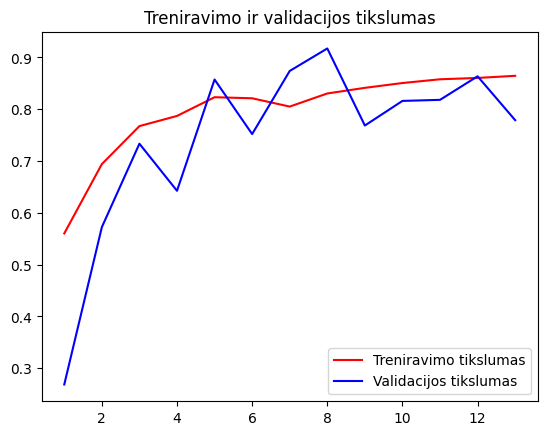

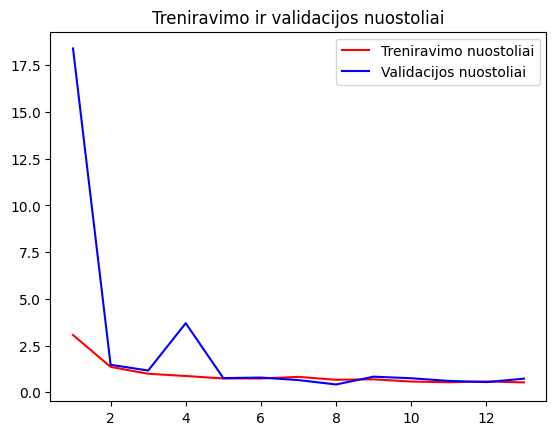

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_sgd_fold_0.h5


<ipython-input-25-a785ae40b6fa>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 71ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.91      0.77      0.83       203
   pneumonia       0.82      0.88      0.85       139
     regular       0.89      0.96      0.92       263

    accuracy                           0.88       605
   macro avg       0.87      0.87      0.87       605
weighted avg       0.88      0.88      0.88       605

Accuracy: 0.8776859504132232
Specificity for covid: 0.96
Specificity for pneumonia: 0.94
Specificity for regular: 0.91
Macro-average Specificity: 0.94


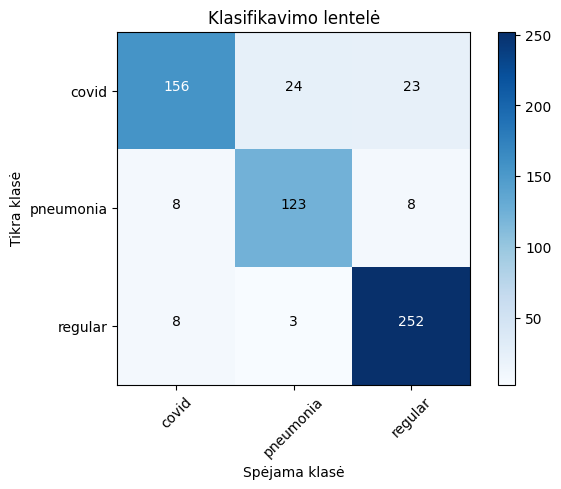

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 1
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 37s 435ms/step - loss: 2.7744 - accuracy: 0.5509 - auc_11: 0.7257 - val_loss: 1.7197 - val_accuracy: 0.3967 - val_auc_11: 0.7037
Epoch 2/30
61/61 [==============================] - 26s 430ms/step - loss: 1.3327 - accuracy: 0.6899 - auc_11: 0.8568 - val_loss: 1.3182 - val_accuracy: 0.6529 - val_auc_11: 0.8232
Epoch 3/30
61/61 [==============================] - 26s 426ms/step - loss: 1.0361 - accuracy: 0.7530 - auc_11: 0.9042 - val_loss: 1.2908 - val_accuracy: 0.5496 - val_auc_11: 0.8176
Epoch 4/30
61/61 [==============================] - 26s 426ms/step - loss: 0.9346 - accuracy: 0.7674 - auc_11: 0.9180 - val_loss: 1.2600 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

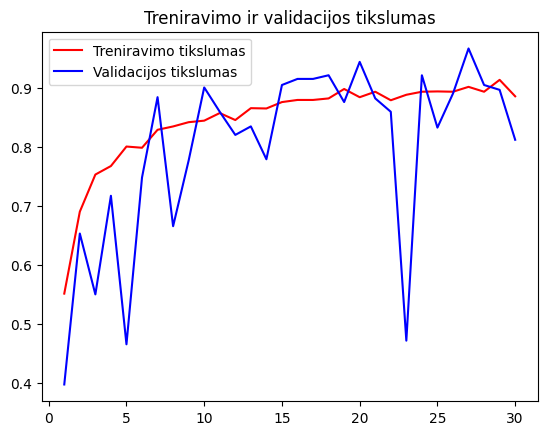

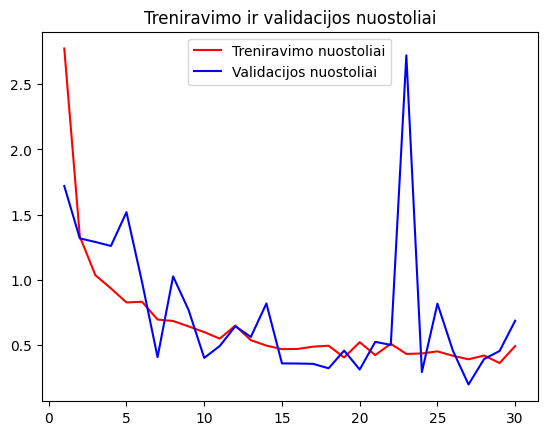

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_sgd_fold_1.h5


<ipython-input-25-a785ae40b6fa>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 66ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.59      0.79      0.68       175
   pneumonia       0.94      0.76      0.84       152
     regular       0.84      0.75      0.79       278

    accuracy                           0.77       605
   macro avg       0.79      0.77      0.77       605
weighted avg       0.79      0.77      0.77       605

Accuracy: 0.7652892561983471
Specificity for covid: 0.78
Specificity for pneumonia: 0.98
Specificity for regular: 0.88
Macro-average Specificity: 0.88


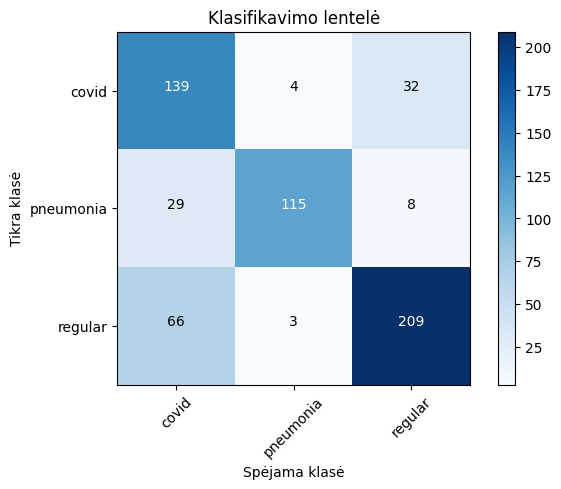

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 2
Class index 0: Weight 1.12
Class index 1: Weight 1.36
Class index 2: Weight 0.73
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 36s 428ms/step - loss: 2.9937 - accuracy: 0.5137 - auc_12: 0.6848 - val_loss: 2.3069 - val_accuracy: 0.3285 - val_auc_12: 0.6114
Epoch 2/30
61/61 [==============================] - 26s 428ms/step - loss: 1.5693 - accuracy: 0.6202 - auc_12: 0.7939 - val_loss: 3.0800 - val_accuracy: 0.3719 - val_auc_12: 0.6251
Epoch 3/30
61/61 [==============================] - 26s 427ms/step - loss: 1.2469 - accuracy: 0.7049 - auc_12: 0.8590 - val_loss: 2.7957 - val_accuracy: 0.5372 - val_auc_12: 0.6965
Epoch 4/30
61/61 [==============================] - 26s 422ms/step - loss: 1.1119 - accuracy: 0.7302 - auc_12: 0.8889 - val_loss: 1.2336 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

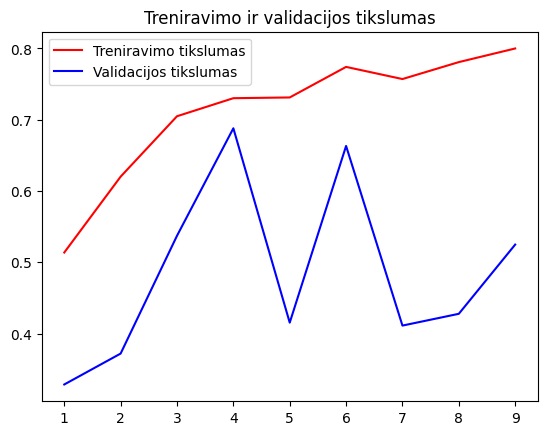

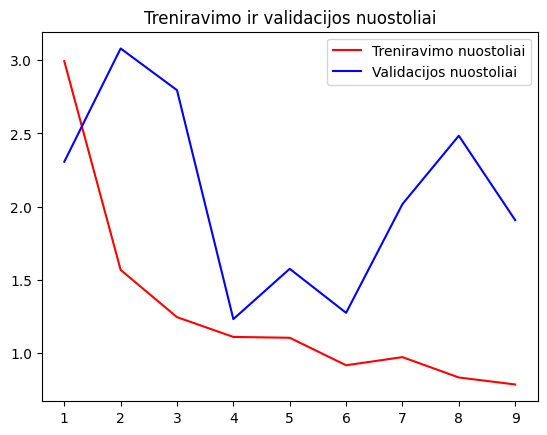

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_sgd_fold_2.h5


<ipython-input-25-a785ae40b6fa>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 65ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.72      0.53      0.61       180
   pneumonia       0.83      0.63      0.72       136
     regular       0.69      0.89      0.78       289

    accuracy                           0.72       605
   macro avg       0.75      0.68      0.70       605
weighted avg       0.73      0.72      0.71       605

Accuracy: 0.7223140495867768
Specificity for covid: 0.91
Specificity for pneumonia: 0.96
Specificity for regular: 0.64
Macro-average Specificity: 0.84


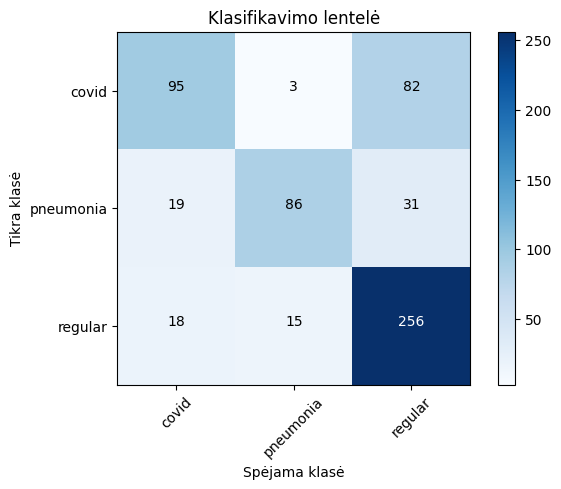

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 3
Class index 0: Weight 1.13
Class index 1: Weight 1.39
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 36s 433ms/step - loss: 2.5789 - accuracy: 0.5504 - auc_13: 0.7353 - val_loss: 2.4616 - val_accuracy: 0.5041 - val_auc_13: 0.6651
Epoch 2/30
61/61 [==============================] - 26s 428ms/step - loss: 1.4157 - accuracy: 0.6693 - auc_13: 0.8403 - val_loss: 1.6362 - val_accuracy: 0.4628 - val_auc_13: 0.7695
Epoch 3/30
61/61 [==============================] - 26s 429ms/step - loss: 1.1150 - accuracy: 0.7349 - auc_13: 0.8928 - val_loss: 1.1754 - val_accuracy: 0.7087 - val_auc_13: 0.8590
Epoch 4/30
61/61 [==============================] - 26s 425ms/step - loss: 1.0028 - accuracy: 0.7659 - auc_13: 0.9128 - val_loss: 0.5978 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

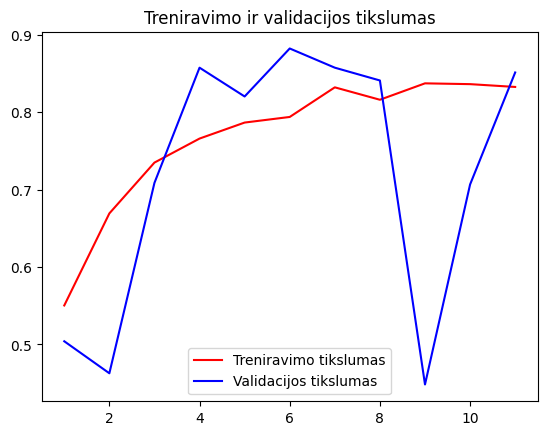

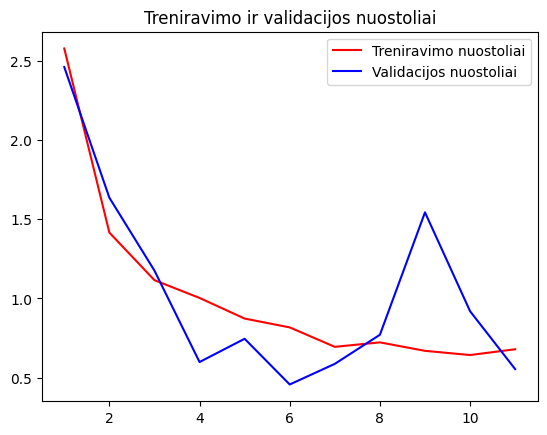

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_sgd_fold_3.h5


<ipython-input-25-a785ae40b6fa>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 67ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.87      0.80      0.84       187
   pneumonia       0.87      0.90      0.88       145
     regular       0.88      0.91      0.90       273

    accuracy                           0.87       605
   macro avg       0.87      0.87      0.87       605
weighted avg       0.87      0.87      0.87       605

Accuracy: 0.8743801652892562
Specificity for covid: 0.95
Specificity for pneumonia: 0.96
Specificity for regular: 0.90
Macro-average Specificity: 0.93


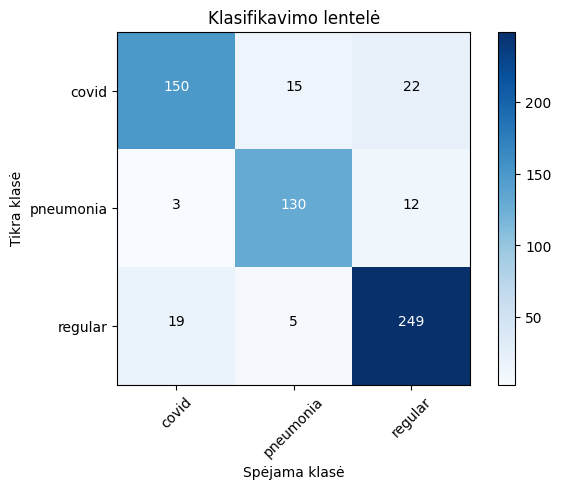

Found 1936 images belonging to 3 classes.
Found 604 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 4
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 39s 437ms/step - loss: 2.7214 - accuracy: 0.5671 - auc_14: 0.7481 - val_loss: 1.9138 - val_accuracy: 0.5579 - val_auc_14: 0.7633
Epoch 2/30
61/61 [==============================] - 27s 434ms/step - loss: 1.6460 - accuracy: 0.6333 - auc_14: 0.8157 - val_loss: 1.3679 - val_accuracy: 0.6488 - val_auc_14: 0.8235
Epoch 3/30
61/61 [==============================] - 26s 430ms/step - loss: 1.2020 - accuracy: 0.7190 - auc_14: 0.8743 - val_loss: 2.8989 - val_accuracy: 0.4421 - val_auc_14: 0.6735
Epoch 4/30
61/61 [==============================] - 26s 429ms/step - loss: 1.0950 - accuracy: 0.7407 - auc_14: 0.8947 - val_loss: 1.4350 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

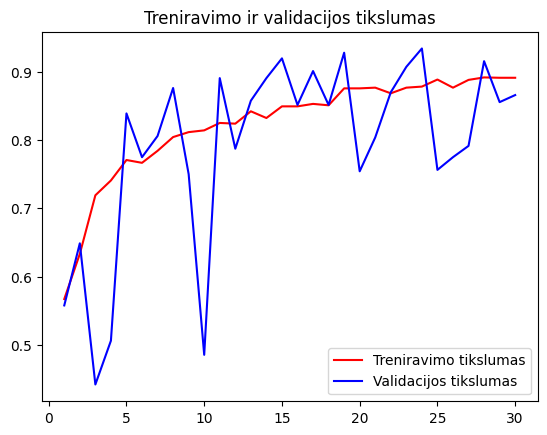

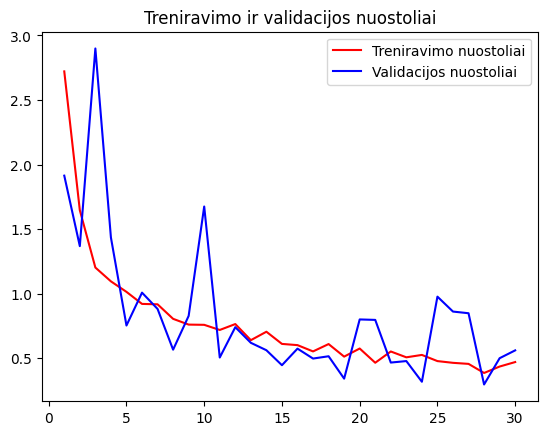

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_sgd_fold_4.h5


<ipython-input-25-a785ae40b6fa>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 68ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.69      0.98      0.81       173
   pneumonia       0.99      0.64      0.77       154
     regular       0.93      0.87      0.90       277

    accuracy                           0.84       604
   macro avg       0.87      0.83      0.83       604
weighted avg       0.88      0.84      0.84       604

Accuracy: 0.8427152317880795
Specificity for covid: 0.82
Specificity for pneumonia: 1.00
Specificity for regular: 0.95
Macro-average Specificity: 0.92


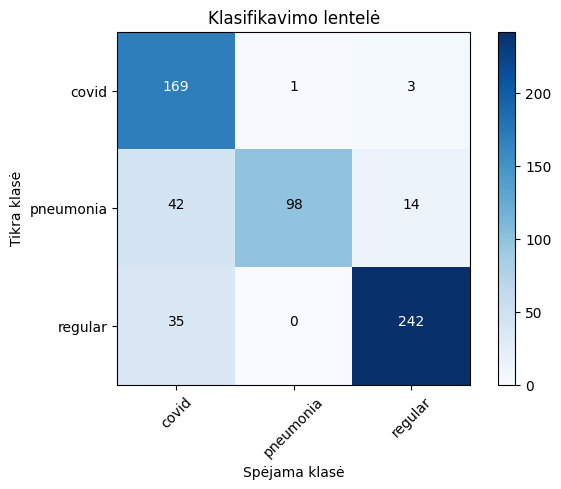

Final Metrics Across All Folds:
Average Accuracy: 0.82 ± 0.06
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.76 ± 0.12
Class covid - Average Recall: 0.77 ± 0.14
Class covid - Average F1 Score: 0.75 ± 0.09
Class pneumonia - Average Precision: 0.89 ± 0.07
Class pneumonia - Average Recall: 0.76 ± 0.11
Class pneumonia - Average F1 Score: 0.81 ± 0.06
Class regular - Average Precision: 0.85 ± 0.08
Class regular - Average Recall: 0.88 ± 0.07
Class regular - Average F1 Score: 0.86 ± 0.06


In [ ]:
# For overall results
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    base_dir = f'/content/image_dataset/splits/fold_{fold}'
    train_dir = os.path.join(base_dir, 'train')
    test_dir = os.path.join(base_dir, 'test')
    val_dir = os.path.join(base_dir, 'val')


    # Data generators
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
        shuffle=False
    )

    val_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'
    )

    # Compute class weights
    class_weights_array = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_generator.classes),
        y=train_generator.classes
    )
    class_weights = {i: weight for i, weight in enumerate(class_weights_array)}

    print(f"Training fold {fold}")

    # Print the computed class weights
    for class_index, weight in class_weights.items():
        print(f"Class index {class_index}: Weight {weight:.2f}")

    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

    # Calculate the number of layers to make trainable
    total_layers = len(base_model.layers)
    layers_to_train = int(total_layers * 0.30)  # 30% of the total number of layers

    # Make the first 30% of layers trainable
    for layer in base_model.layers[:layers_to_train]:
        layer.trainable = True

    # Freeze the rest of the layers
    for layer in base_model.layers[layers_to_train:]:
        layer.trainable = False

    # Freeze the layers of the base model
    #base_model.trainable = False


    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  # Dropout added here
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)  # Another Dropout layer
    # Add a fully connected layer for classification
    output_layer = Dense(3, activation='softmax')(x)


    # Construct the final model
    model = Model(inputs=base_model.input, outputs=output_layer)

    #optimizer
    my_optimizer = SGD(learning_rate=0.01, momentum=0.9)

    # Compile the model
    model.compile(optimizer=my_optimizer, loss=focal_loss(), metrics=['accuracy', AUC()])

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


    #model params
    total_params = model.count_params()
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    non_trainable_params = total_params - trainable_params

    print(f"Total parameters: {total_params}")
    print(f"Trainable parameters: {trainable_params}")
    print(f"Non-trainable parameters: {non_trainable_params}")

    # Train the model
    history = model.fit(
        train_generator,
        epochs=30,
        validation_data=val_generator,
        class_weight=class_weights,
        callbacks=[early_stopping]
    )

    #training results
    plot_training(history)

    # Save the model
    model_save_path = f'/content/drive/MyDrive/Bakis/ModelOutputs/focal_sgd_fold_{fold}.h5'
    model.save(model_save_path)
    print(f"Model saved to {model_save_path}")


    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## Focal loss + adam + 0.001




Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 0
Class index 0: Weight 1.15
Class index 1: Weight 1.37
Class index 2: Weight 0.71
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 39s 380ms/step - loss: 1.5601 - accuracy: 0.6842 - auc_15: 0.8507 - val_loss: 1.5938 - val_accuracy: 0.5310 - val_auc_15: 0.7594
Epoch 2/30
61/61 [==============================] - 26s 423ms/step - loss: 0.7567 - accuracy: 0.8181 - auc_15: 0.9434 - val_loss: 0.6674 - val_accuracy: 0.7934 - val_auc_15: 0.9432
Epoch 3/30
61/61 [==============================] - 26s 424ms/step - loss: 0.6474 - accuracy: 0.8424 - auc_15: 0.9588 - val_loss: 0.4280 - val_accuracy: 0.8926 - val_auc_15: 0.9777
Epoch 4/30
61/61 [==============================] - 26s 427ms/step - loss: 0.4866 - accuracy: 0.8842 - auc_15: 0.9726 - val_loss: 0.2990 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

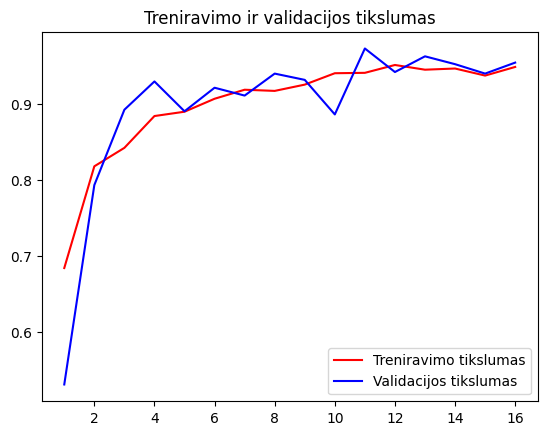

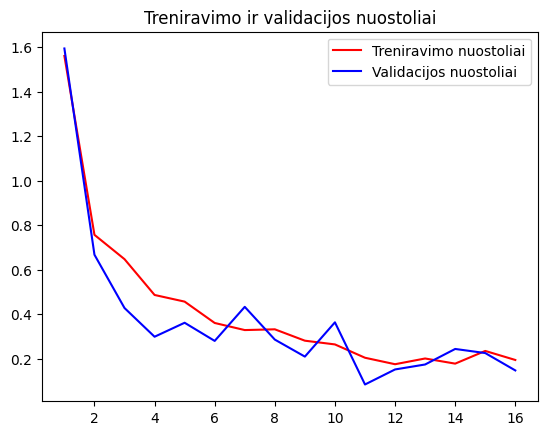

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_adam_fold_0.h5


<ipython-input-26-a0cd49f49ce8>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 67ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.99      0.94      0.96       203
   pneumonia       0.98      0.94      0.96       139
     regular       0.93      1.00      0.96       263

    accuracy                           0.96       605
   macro avg       0.97      0.96      0.96       605
weighted avg       0.96      0.96      0.96       605

Accuracy: 0.9619834710743802
Specificity for covid: 1.00
Specificity for pneumonia: 1.00
Specificity for regular: 0.94
Macro-average Specificity: 0.98


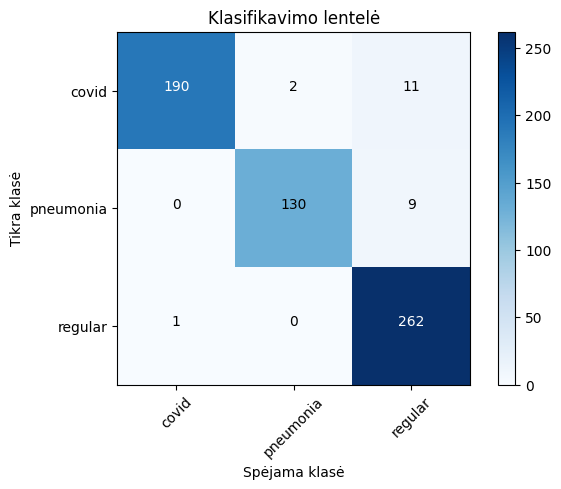

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 1
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 38s 390ms/step - loss: 1.5403 - accuracy: 0.6796 - auc_16: 0.8482 - val_loss: 0.9467 - val_accuracy: 0.7500 - val_auc_16: 0.9042
Epoch 2/30
61/61 [==============================] - 26s 427ms/step - loss: 0.8253 - accuracy: 0.8155 - auc_16: 0.9371 - val_loss: 0.6568 - val_accuracy: 0.8471 - val_auc_16: 0.9514
Epoch 3/30
61/61 [==============================] - 26s 429ms/step - loss: 0.6486 - accuracy: 0.8424 - auc_16: 0.9547 - val_loss: 0.6143 - val_accuracy: 0.8409 - val_auc_16: 0.9524
Epoch 4/30
61/61 [==============================] - 26s 425ms/step - loss: 0.5131 - accuracy: 0.8708 - auc_16: 0.9685 - val_loss: 0.2497 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

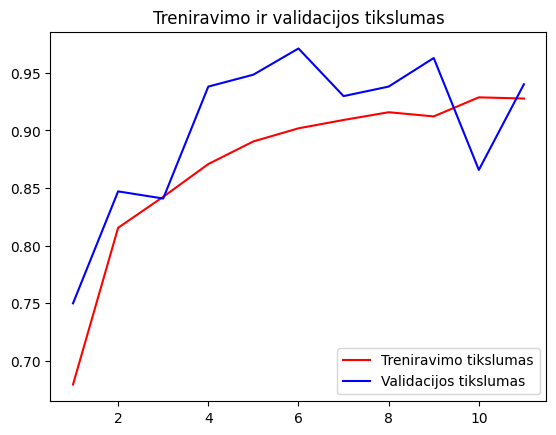

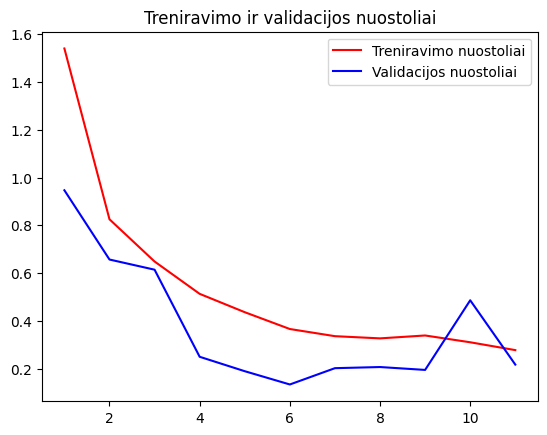

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_adam_fold_1.h5


<ipython-input-26-a0cd49f49ce8>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 66ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.98      0.95      0.96       175
   pneumonia       0.99      0.94      0.96       152
     regular       0.94      0.99      0.96       278

    accuracy                           0.96       605
   macro avg       0.97      0.96      0.96       605
weighted avg       0.96      0.96      0.96       605

Accuracy: 0.9636363636363636
Specificity for covid: 0.99
Specificity for pneumonia: 1.00
Specificity for regular: 0.95
Macro-average Specificity: 0.98


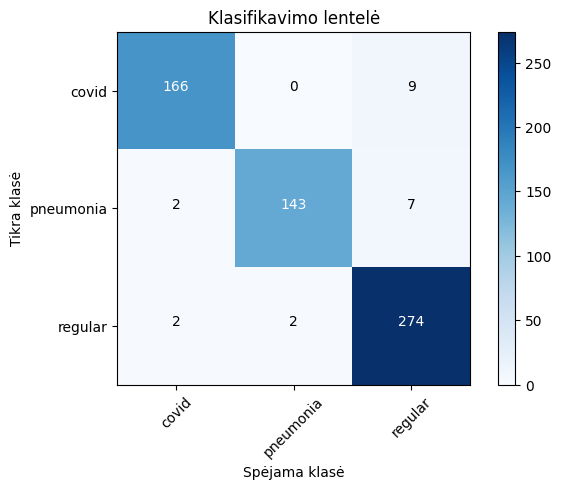

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 2
Class index 0: Weight 1.12
Class index 1: Weight 1.36
Class index 2: Weight 0.73
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 38s 391ms/step - loss: 1.4406 - accuracy: 0.7127 - auc_17: 0.8683 - val_loss: 0.9276 - val_accuracy: 0.7851 - val_auc_17: 0.9130
Epoch 2/30
61/61 [==============================] - 26s 425ms/step - loss: 0.7522 - accuracy: 0.8248 - auc_17: 0.9471 - val_loss: 0.7078 - val_accuracy: 0.8285 - val_auc_17: 0.9487
Epoch 3/30
61/61 [==============================] - 26s 431ms/step - loss: 0.6183 - accuracy: 0.8522 - auc_17: 0.9591 - val_loss: 0.5475 - val_accuracy: 0.8678 - val_auc_17: 0.9646
Epoch 4/30
61/61 [==============================] - 27s 432ms/step - loss: 0.5240 - accuracy: 0.8724 - auc_17: 0.9687 - val_loss: 0.4149 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

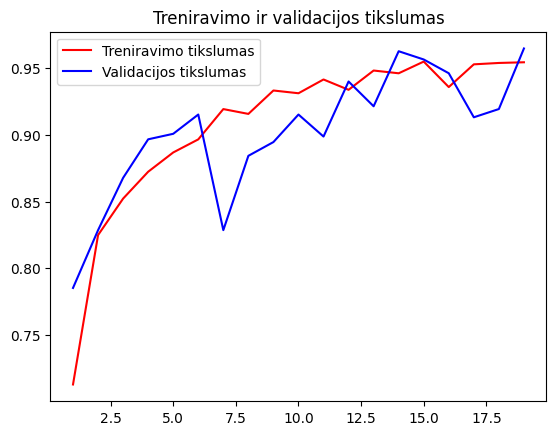

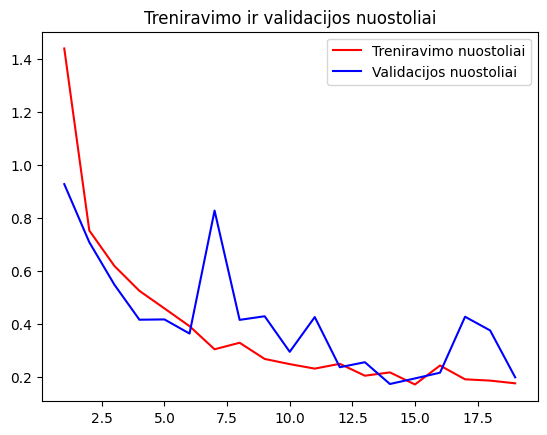

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_adam_fold_2.h5


<ipython-input-26-a0cd49f49ce8>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 72ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.98      0.97      0.97       180
   pneumonia       0.97      0.97      0.97       136
     regular       0.97      0.98      0.98       289

    accuracy                           0.98       605
   macro avg       0.98      0.97      0.97       605
weighted avg       0.98      0.98      0.98       605

Accuracy: 0.9752066115702479
Specificity for covid: 0.99
Specificity for pneumonia: 0.99
Specificity for regular: 0.97
Macro-average Specificity: 0.99


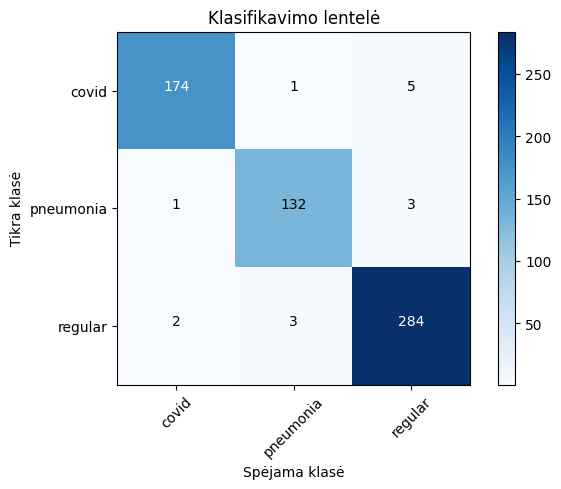

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 3
Class index 0: Weight 1.13
Class index 1: Weight 1.39
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 38s 394ms/step - loss: 1.5799 - accuracy: 0.6879 - auc_18: 0.8566 - val_loss: 1.1771 - val_accuracy: 0.7211 - val_auc_18: 0.8795
Epoch 2/30
61/61 [==============================] - 26s 423ms/step - loss: 0.8708 - accuracy: 0.8036 - auc_18: 0.9346 - val_loss: 0.8018 - val_accuracy: 0.7397 - val_auc_18: 0.9221
Epoch 3/30
61/61 [==============================] - 26s 433ms/step - loss: 0.5185 - accuracy: 0.8667 - auc_18: 0.9683 - val_loss: 0.6150 - val_accuracy: 0.8202 - val_auc_18: 0.9481
Epoch 4/30
61/61 [==============================] - 27s 433ms/step - loss: 0.4900 - accuracy: 0.8806 - auc_18: 0.9732 - val_loss: 0.5446 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

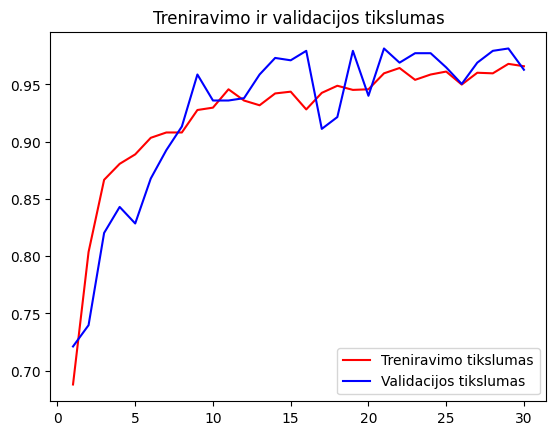

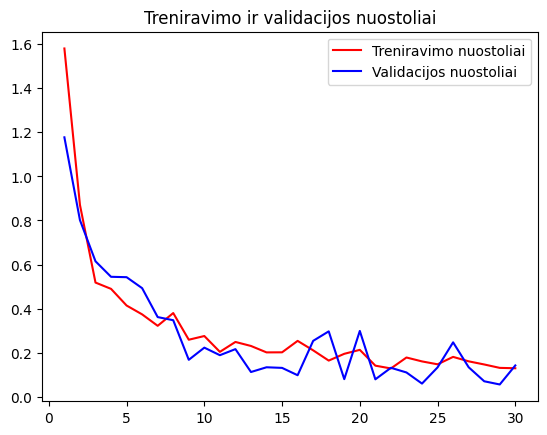

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_adam_fold_3.h5


<ipython-input-26-a0cd49f49ce8>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 68ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.94      0.98      0.96       187
   pneumonia       0.95      0.97      0.96       145
     regular       0.99      0.95      0.97       273

    accuracy                           0.97       605
   macro avg       0.96      0.97      0.96       605
weighted avg       0.97      0.97      0.97       605

Accuracy: 0.9652892561983472
Specificity for covid: 0.97
Specificity for pneumonia: 0.98
Specificity for regular: 0.99
Macro-average Specificity: 0.98


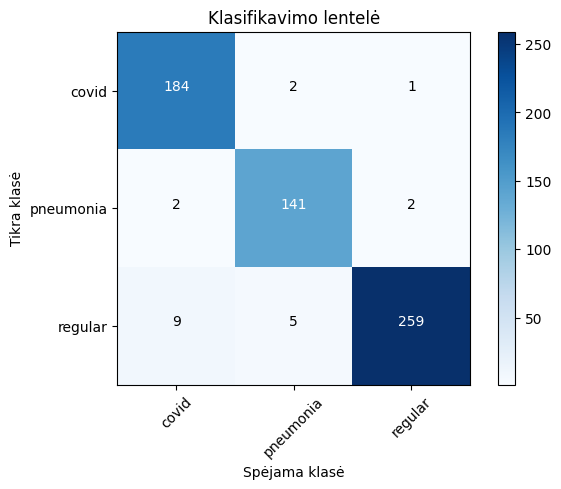

Found 1936 images belonging to 3 classes.
Found 604 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 4
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 38s 393ms/step - loss: 1.5915 - accuracy: 0.6958 - auc_19: 0.8581 - val_loss: 0.8748 - val_accuracy: 0.7789 - val_auc_19: 0.9163
Epoch 2/30
61/61 [==============================] - 27s 432ms/step - loss: 0.7752 - accuracy: 0.8140 - auc_19: 0.9416 - val_loss: 0.6756 - val_accuracy: 0.8017 - val_auc_19: 0.9420
Epoch 3/30
61/61 [==============================] - 27s 431ms/step - loss: 0.5100 - accuracy: 0.8781 - auc_19: 0.9697 - val_loss: 0.5011 - val_accuracy: 0.8471 - val_auc_19: 0.9642
Epoch 4/30
61/61 [==============================] - 26s 430ms/step - loss: 0.4300 - accuracy: 0.8884 - auc_19: 0.9769 - val_loss: 0.3703 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

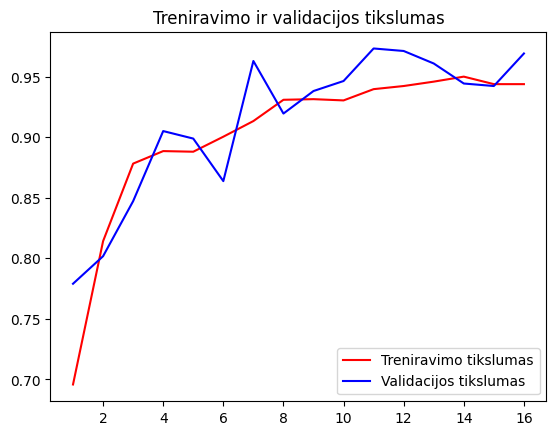

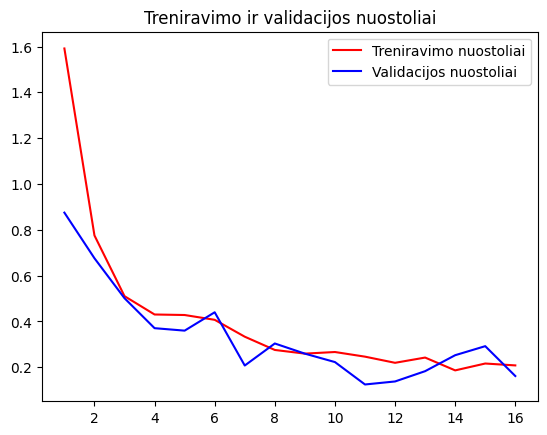

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_adam_fold_4.h5


<ipython-input-26-a0cd49f49ce8>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 66ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.98      0.97      0.97       173
   pneumonia       0.93      0.97      0.95       154
     regular       0.98      0.97      0.98       277

    accuracy                           0.97       604
   macro avg       0.97      0.97      0.97       604
weighted avg       0.97      0.97      0.97       604

Accuracy: 0.9685430463576159
Specificity for covid: 0.99
Specificity for pneumonia: 0.98
Specificity for regular: 0.98
Macro-average Specificity: 0.98


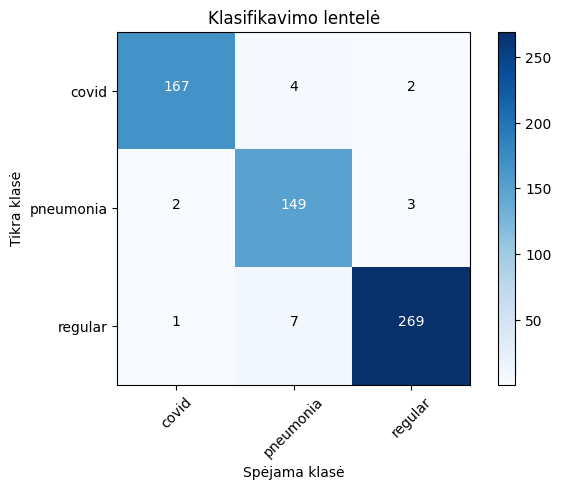

Final Metrics Across All Folds:
Average Accuracy: 0.97 ± 0.00
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.98 ± 0.02
Class covid - Average Recall: 0.96 ± 0.02
Class covid - Average F1 Score: 0.97 ± 0.01
Class pneumonia - Average Precision: 0.97 ± 0.02
Class pneumonia - Average Recall: 0.96 ± 0.02
Class pneumonia - Average F1 Score: 0.96 ± 0.01
Class regular - Average Precision: 0.96 ± 0.02
Class regular - Average Recall: 0.98 ± 0.02
Class regular - Average F1 Score: 0.97 ± 0.01


In [ ]:
# For overall results
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    base_dir = f'/content/image_dataset/splits/fold_{fold}'
    train_dir = os.path.join(base_dir, 'train')
    test_dir = os.path.join(base_dir, 'test')
    val_dir = os.path.join(base_dir, 'val')


    # Data generators
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
        shuffle=False
    )

    val_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'
    )

    # Compute class weights
    class_weights_array = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_generator.classes),
        y=train_generator.classes
    )
    class_weights = {i: weight for i, weight in enumerate(class_weights_array)}

    print(f"Training fold {fold}")

    # Print the computed class weights
    for class_index, weight in class_weights.items():
        print(f"Class index {class_index}: Weight {weight:.2f}")

    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

    # Calculate the number of layers to make trainable
    total_layers = len(base_model.layers)
    layers_to_train = int(total_layers * 0.30)  # 30% of the total number of layers

    # Make the first 30% of layers trainable
    for layer in base_model.layers[:layers_to_train]:
        layer.trainable = True

    # Freeze the rest of the layers
    for layer in base_model.layers[layers_to_train:]:
        layer.trainable = False

    # Freeze the layers of the base model
    #base_model.trainable = False


    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  # Dropout added here
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)  # Another Dropout layer
    # Add a fully connected layer for classification
    output_layer = Dense(3, activation='softmax')(x)


    # Construct the final model
    model = Model(inputs=base_model.input, outputs=output_layer)

    #optimizer
    my_optimizer = Adam(learning_rate=0.001)

    # Compile the model
    model.compile(optimizer=my_optimizer, loss=focal_loss(), metrics=['accuracy', AUC()])

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


    #model params
    total_params = model.count_params()
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    non_trainable_params = total_params - trainable_params

    print(f"Total parameters: {total_params}")
    print(f"Trainable parameters: {trainable_params}")
    print(f"Non-trainable parameters: {non_trainable_params}")

    # Train the model
    history = model.fit(
        train_generator,
        epochs=30,
        validation_data=val_generator,
        class_weight=class_weights,
        callbacks=[early_stopping]
    )

    #training results
    plot_training(history)

    # Save the model
    model_save_path = f'/content/drive/MyDrive/Bakis/ModelOutputs/focal_adam_fold_{fold}.h5'
    model.save(model_save_path)
    print(f"Model saved to {model_save_path}")


    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## Cross entropy + nadam + 0.0002

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 0
Class index 0: Weight 1.15
Class index 1: Weight 1.37
Class index 2: Weight 0.71
16705208/16705208 [==============================] - 2s 0us/step
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 53s 434ms/step - loss: 0.9068 - accuracy: 0.5850 - auc: 0.7690 - val_loss: 0.9317 - val_accuracy: 0.5351 - val_auc: 0.7502
Epoch 2/30
61/61 [==============================] - 27s 445ms/step - loss: 0.5769 - accuracy: 0.7757 - auc: 0.9133 - val_loss: 0.6649 - val_accuracy: 0.7025 - val_auc: 0.8752
Epoch 3/30
61/61 [==============================] - 27s 442ms/step - loss: 0.4668 - accuracy: 0.8119 - auc: 0.9419 - val_loss: 0.4211 - val_accuracy: 0.8616 - val_auc: 0.9534
Epoch 4/30
61/61 [==============================] - 27s 441ms/step - loss: 0.3750 - accuracy: 0.851

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

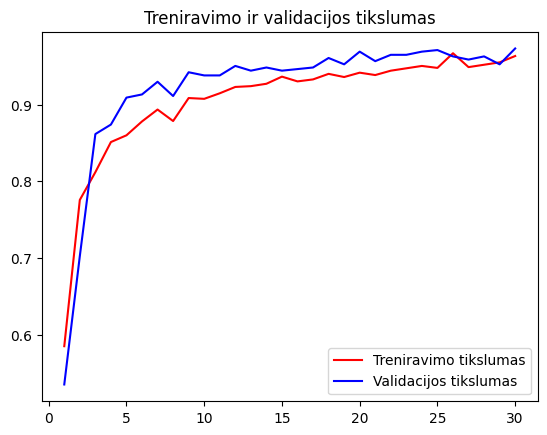

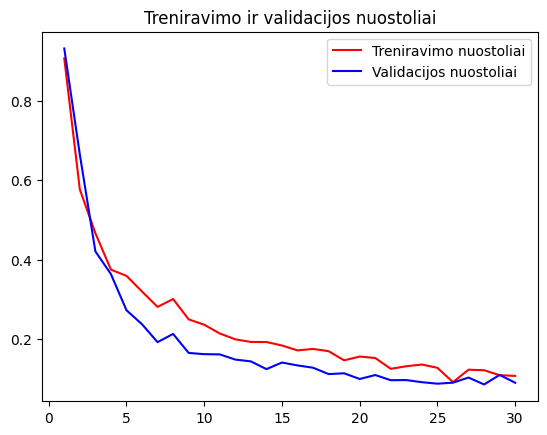

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_nadam_0.0002_fold_0.h5


<ipython-input-22-208667f4b0c1>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 4s 139ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.99      0.95      0.97       203
   pneumonia       0.94      0.96      0.95       139
     regular       0.94      0.97      0.96       263

    accuracy                           0.96       605
   macro avg       0.96      0.96      0.96       605
weighted avg       0.96      0.96      0.96       605

Accuracy: 0.9586776859504132
Specificity for covid: 1.00
Specificity for pneumonia: 0.98
Specificity for regular: 0.95
Macro-average Specificity: 0.98


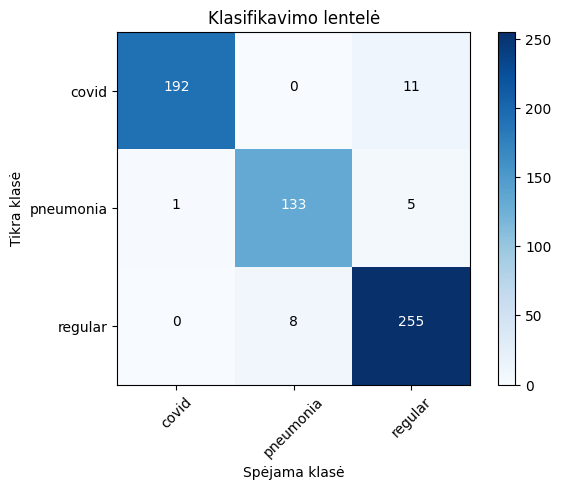

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 1
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 43s 399ms/step - loss: 0.8815 - accuracy: 0.5871 - auc_1: 0.7821 - val_loss: 0.8789 - val_accuracy: 0.5413 - val_auc_1: 0.7731
Epoch 2/30
61/61 [==============================] - 27s 438ms/step - loss: 0.6021 - accuracy: 0.7576 - auc_1: 0.9040 - val_loss: 0.6660 - val_accuracy: 0.6777 - val_auc_1: 0.8762
Epoch 3/30
61/61 [==============================] - 27s 442ms/step - loss: 0.4578 - accuracy: 0.8186 - auc_1: 0.9430 - val_loss: 0.5120 - val_accuracy: 0.7748 - val_auc_1: 0.9276
Epoch 4/30
61/61 [==============================] - 27s 433ms/step - loss: 0.3952 - accuracy: 0.8486 - auc_1: 0.9580 - val_loss: 0.4199 - val_accuracy: 

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

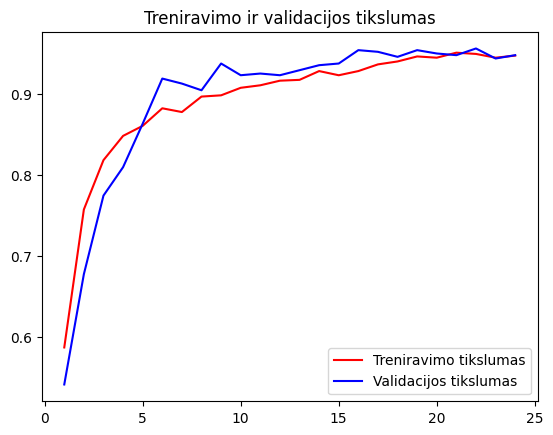

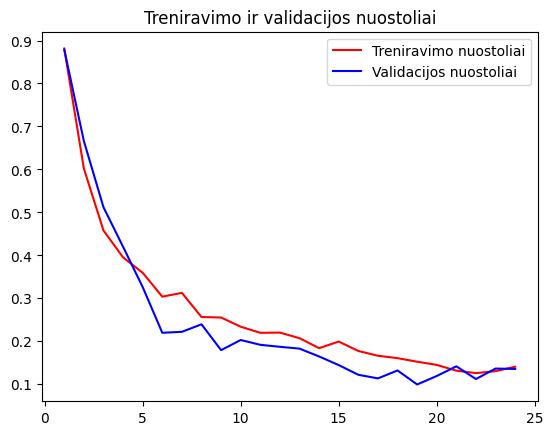

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_nadam_0.0002_fold_1.h5


<ipython-input-22-208667f4b0c1>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 63ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.96      0.94      0.95       175
   pneumonia       0.99      0.99      0.99       152
     regular       0.95      0.97      0.96       278

    accuracy                           0.97       605
   macro avg       0.97      0.97      0.97       605
weighted avg       0.97      0.97      0.97       605

Accuracy: 0.9669421487603306
Specificity for covid: 0.99
Specificity for pneumonia: 1.00
Specificity for regular: 0.96
Macro-average Specificity: 0.98


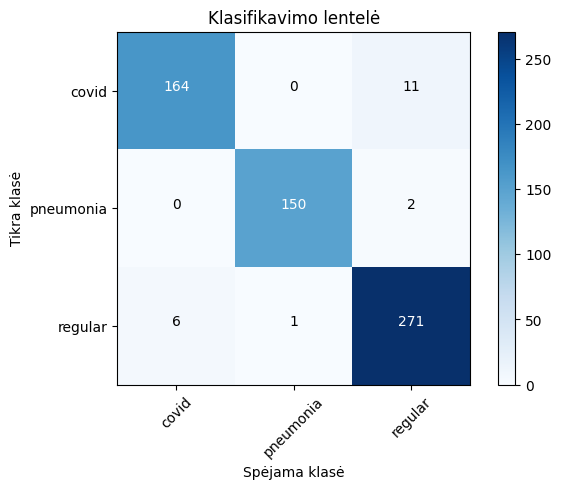

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 2
Class index 0: Weight 1.12
Class index 1: Weight 1.36
Class index 2: Weight 0.73
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 42s 394ms/step - loss: 0.8708 - accuracy: 0.5922 - auc_2: 0.7879 - val_loss: 0.8971 - val_accuracy: 0.5537 - val_auc_2: 0.7751
Epoch 2/30
61/61 [==============================] - 27s 436ms/step - loss: 0.5863 - accuracy: 0.7778 - auc_2: 0.9119 - val_loss: 0.6766 - val_accuracy: 0.6777 - val_auc_2: 0.8718
Epoch 3/30
61/61 [==============================] - 27s 437ms/step - loss: 0.4680 - accuracy: 0.8186 - auc_2: 0.9408 - val_loss: 0.5794 - val_accuracy: 0.7541 - val_auc_2: 0.9065
Epoch 4/30
61/61 [==============================] - 27s 437ms/step - loss: 0.3983 - accuracy: 0.8413 - auc_2: 0.9576 - val_loss: 0.3477 - val_accuracy: 

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

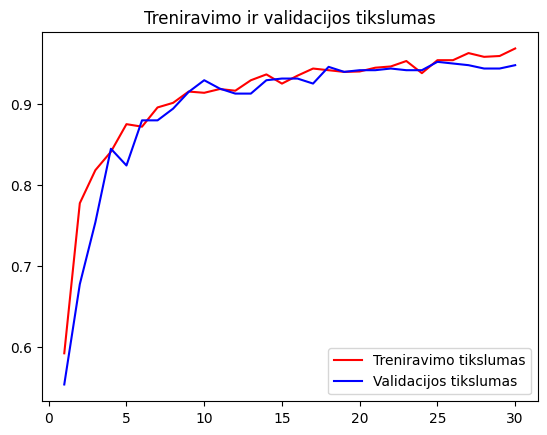

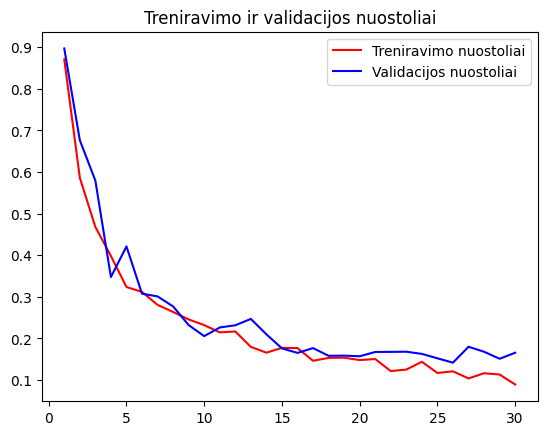

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_nadam_0.0002_fold_2.h5


<ipython-input-22-208667f4b0c1>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 63ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       1.00      0.88      0.94       180
   pneumonia       0.96      0.96      0.96       136
     regular       0.92      0.99      0.95       289

    accuracy                           0.95       605
   macro avg       0.96      0.94      0.95       605
weighted avg       0.95      0.95      0.95       605

Accuracy: 0.9504132231404959
Specificity for covid: 1.00
Specificity for pneumonia: 0.99
Specificity for regular: 0.92
Macro-average Specificity: 0.97


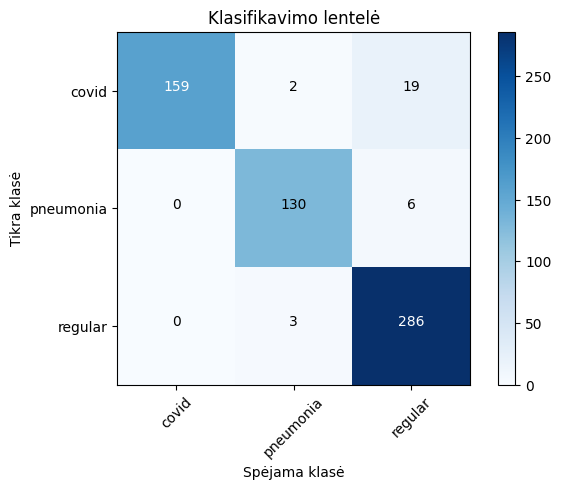

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 3
Class index 0: Weight 1.13
Class index 1: Weight 1.39
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 42s 396ms/step - loss: 0.9109 - accuracy: 0.5933 - auc_3: 0.7697 - val_loss: 0.8012 - val_accuracy: 0.5826 - val_auc_3: 0.8139
Epoch 2/30
61/61 [==============================] - 27s 431ms/step - loss: 0.6187 - accuracy: 0.7561 - auc_3: 0.8996 - val_loss: 0.5607 - val_accuracy: 0.7376 - val_auc_3: 0.9162
Epoch 3/30
61/61 [==============================] - 27s 433ms/step - loss: 0.5103 - accuracy: 0.7860 - auc_3: 0.9299 - val_loss: 0.4315 - val_accuracy: 0.7975 - val_auc_3: 0.9489
Epoch 4/30
61/61 [==============================] - 27s 435ms/step - loss: 0.4175 - accuracy: 0.8336 - auc_3: 0.9525 - val_loss: 0.3117 - val_accuracy: 

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

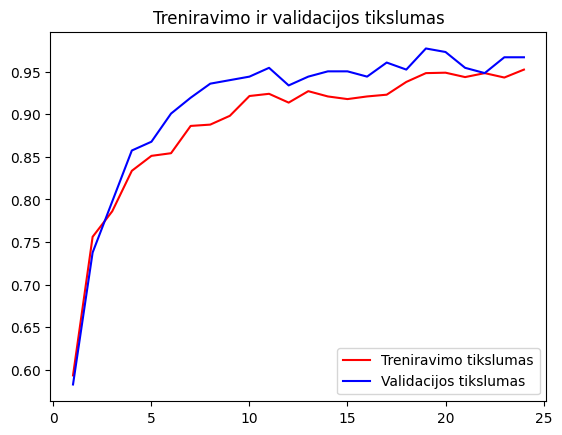

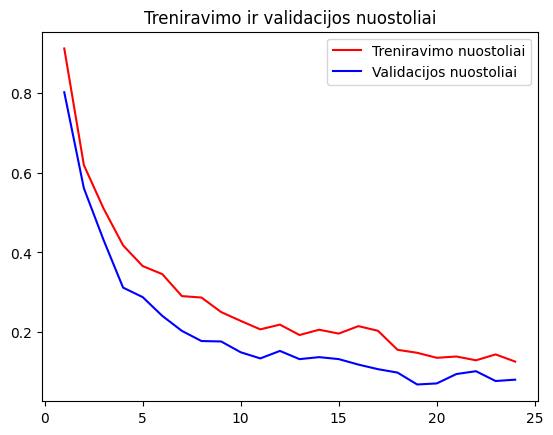

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_nadam_0.0002_fold_3.h5


<ipython-input-22-208667f4b0c1>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 72ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.99      0.91      0.95       187
   pneumonia       0.95      0.93      0.94       145
     regular       0.92      0.98      0.95       273

    accuracy                           0.95       605
   macro avg       0.95      0.94      0.95       605
weighted avg       0.95      0.95      0.95       605

Accuracy: 0.947107438016529
Specificity for covid: 1.00
Specificity for pneumonia: 0.98
Specificity for regular: 0.93
Macro-average Specificity: 0.97


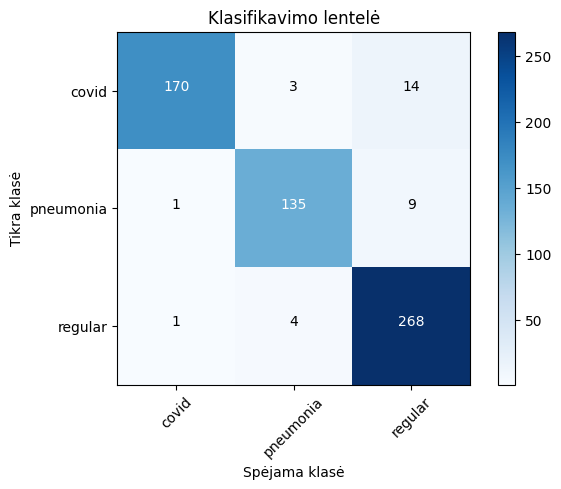

Found 1936 images belonging to 3 classes.
Found 604 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 4
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 42s 393ms/step - loss: 0.8989 - accuracy: 0.5987 - auc_4: 0.7792 - val_loss: 0.9318 - val_accuracy: 0.5165 - val_auc_4: 0.7512
Epoch 2/30
61/61 [==============================] - 27s 435ms/step - loss: 0.5826 - accuracy: 0.7655 - auc_4: 0.9118 - val_loss: 0.6892 - val_accuracy: 0.6860 - val_auc_4: 0.8679
Epoch 3/30
61/61 [==============================] - 27s 434ms/step - loss: 0.4668 - accuracy: 0.8171 - auc_4: 0.9420 - val_loss: 0.5206 - val_accuracy: 0.7665 - val_auc_4: 0.9269
Epoch 4/30
61/61 [==============================] - 28s 448ms/step - loss: 0.4047 - accuracy: 0.8388 - auc_4: 0.9564 - val_loss: 0.3480 - val_accuracy: 

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

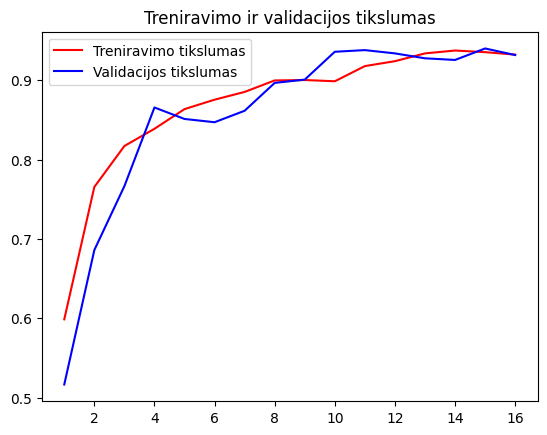

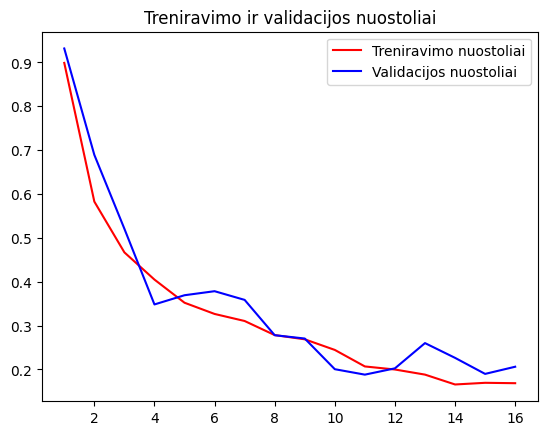

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_nadam_0.0002_fold_4.h5


<ipython-input-22-208667f4b0c1>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 4s 133ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.93      0.87      0.90       173
   pneumonia       0.94      0.96      0.95       154
     regular       0.91      0.94      0.92       277

    accuracy                           0.92       604
   macro avg       0.93      0.92      0.92       604
weighted avg       0.92      0.92      0.92       604

Accuracy: 0.9238410596026491
Specificity for covid: 0.97
Specificity for pneumonia: 0.98
Specificity for regular: 0.92
Macro-average Specificity: 0.96


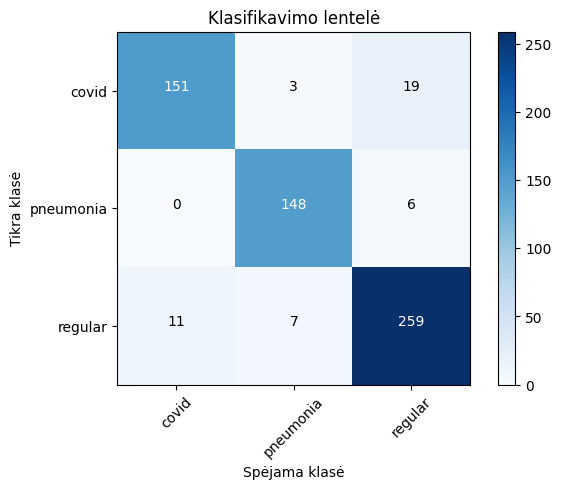

Final Metrics Across All Folds:
Average Accuracy: 0.95 ± 0.01
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.98 ± 0.03
Class covid - Average Recall: 0.91 ± 0.03
Class covid - Average F1 Score: 0.94 ± 0.02
Class pneumonia - Average Precision: 0.96 ± 0.02
Class pneumonia - Average Recall: 0.96 ± 0.02
Class pneumonia - Average F1 Score: 0.96 ± 0.02
Class regular - Average Precision: 0.93 ± 0.02
Class regular - Average Recall: 0.97 ± 0.02
Class regular - Average F1 Score: 0.95 ± 0.01


In [22]:
# For overall results
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    base_dir = f'/content/image_dataset/splits/fold_{fold}'
    train_dir = os.path.join(base_dir, 'train')
    test_dir = os.path.join(base_dir, 'test')
    val_dir = os.path.join(base_dir, 'val')


    # Data generators
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
        shuffle=False
    )

    val_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'
    )

    # Compute class weights
    class_weights_array = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_generator.classes),
        y=train_generator.classes
    )
    class_weights = {i: weight for i, weight in enumerate(class_weights_array)}

    print(f"Training fold {fold}")

    # Print the computed class weights
    for class_index, weight in class_weights.items():
        print(f"Class index {class_index}: Weight {weight:.2f}")

    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

    # Calculate the number of layers to make trainable
    total_layers = len(base_model.layers)
    layers_to_train = int(total_layers * 0.30)  # 30% of the total number of layers

    # Make the first 30% of layers trainable
    for layer in base_model.layers[:layers_to_train]:
        layer.trainable = True

    # Freeze the rest of the layers
    for layer in base_model.layers[layers_to_train:]:
        layer.trainable = False

    # Freeze the layers of the base model
    #base_model.trainable = False


    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  # Dropout added here
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)  # Another Dropout layer
    # Add a fully connected layer for classification
    output_layer = Dense(3, activation='softmax')(x)


    # Construct the final model
    model = Model(inputs=base_model.input, outputs=output_layer)

    #optimizer
    my_optimizer = Nadam(learning_rate=0.0002)

    # Compile the model
    model.compile(optimizer=my_optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy', AUC()])

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


    #model params
    total_params = model.count_params()
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    non_trainable_params = total_params - trainable_params

    print(f"Total parameters: {total_params}")
    print(f"Trainable parameters: {trainable_params}")
    print(f"Non-trainable parameters: {non_trainable_params}")

    # Train the model
    history = model.fit(
        train_generator,
        epochs=30,
        validation_data=val_generator,
        class_weight=class_weights,
        callbacks=[early_stopping]
    )

    #training results
    plot_training(history)

    # Save the model
    model_save_path = f'/content/drive/MyDrive/Bakis/ModelOutputs/cross_nadam_0.0002_fold_{fold}.h5'
    model.save(model_save_path)
    print(f"Model saved to {model_save_path}")


    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## Focal loss + nadam + 0.0002

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 0
Class index 0: Weight 1.15
Class index 1: Weight 1.37
Class index 2: Weight 0.71
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 44s 404ms/step - loss: 1.8019 - accuracy: 0.5669 - auc_5: 0.7576 - val_loss: 1.1754 - val_accuracy: 0.6591 - val_auc_5: 0.8504
Epoch 2/30
61/61 [==============================] - 27s 440ms/step - loss: 1.1536 - accuracy: 0.7225 - auc_5: 0.8827 - val_loss: 0.7777 - val_accuracy: 0.7789 - val_auc_5: 0.9279
Epoch 3/30
61/61 [==============================] - 27s 437ms/step - loss: 0.8635 - accuracy: 0.7897 - auc_5: 0.9274 - val_loss: 0.6611 - val_accuracy: 0.8120 - val_auc_5: 0.9435
Epoch 4/30
61/61 [==============================] - 27s 436ms/step - loss: 0.7191 - accuracy: 0.8186 - auc_5: 0.9452 - val_loss: 0.4984 - val_accuracy: 

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

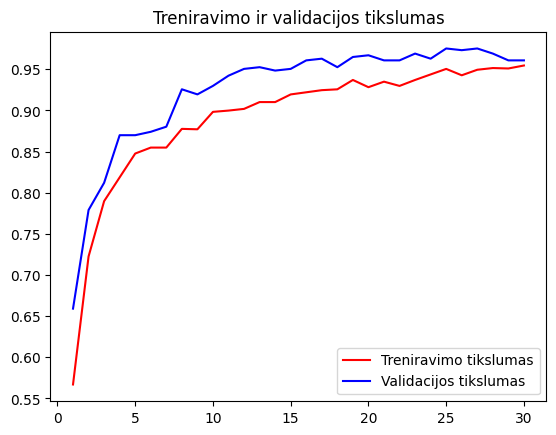

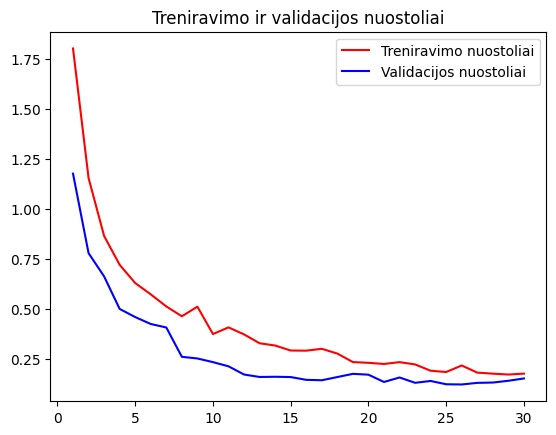

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_nadam_0.0002_fold_0.h5


<ipython-input-23-bff1f7c20e7c>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 65ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.99      0.92      0.95       203
   pneumonia       0.94      0.98      0.96       139
     regular       0.94      0.98      0.96       263

    accuracy                           0.96       605
   macro avg       0.96      0.96      0.96       605
weighted avg       0.96      0.96      0.96       605

Accuracy: 0.9586776859504132
Specificity for covid: 1.00
Specificity for pneumonia: 0.98
Specificity for regular: 0.95
Macro-average Specificity: 0.98


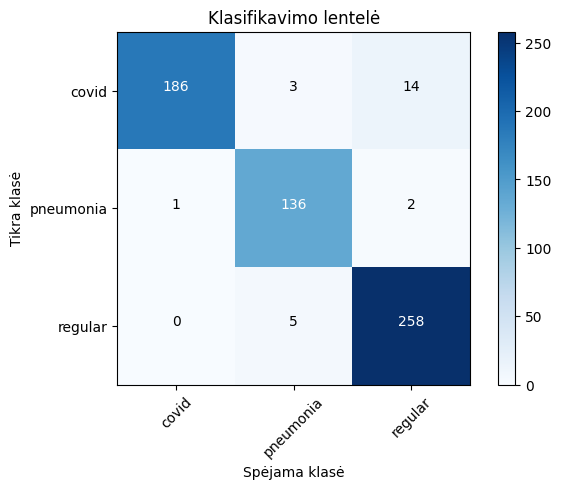

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 1
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 41s 381ms/step - loss: 1.8172 - accuracy: 0.5767 - auc_6: 0.7576 - val_loss: 1.3291 - val_accuracy: 0.6798 - val_auc_6: 0.8297
Epoch 2/30
61/61 [==============================] - 26s 426ms/step - loss: 1.0713 - accuracy: 0.7457 - auc_6: 0.8943 - val_loss: 1.0570 - val_accuracy: 0.7169 - val_auc_6: 0.8823
Epoch 3/30
61/61 [==============================] - 26s 427ms/step - loss: 0.9432 - accuracy: 0.7773 - auc_6: 0.9188 - val_loss: 0.6981 - val_accuracy: 0.8140 - val_auc_6: 0.9453
Epoch 4/30
61/61 [==============================] - 27s 439ms/step - loss: 0.7491 - accuracy: 0.8264 - auc_6: 0.9442 - val_loss: 0.5214 - val_accuracy: 

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

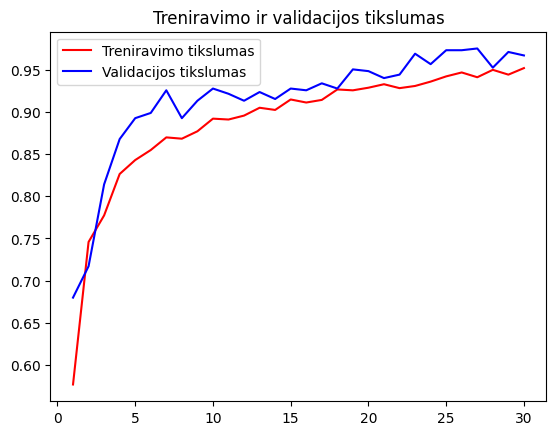

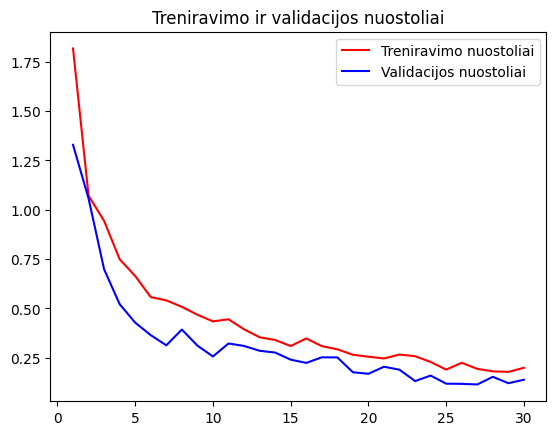

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_nadam_0.0002_fold_1.h5


<ipython-input-23-bff1f7c20e7c>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 63ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.99      0.95      0.97       175
   pneumonia       0.99      0.96      0.98       152
     regular       0.95      0.99      0.97       278

    accuracy                           0.97       605
   macro avg       0.98      0.97      0.97       605
weighted avg       0.97      0.97      0.97       605

Accuracy: 0.971900826446281
Specificity for covid: 1.00
Specificity for pneumonia: 1.00
Specificity for regular: 0.95
Macro-average Specificity: 0.98


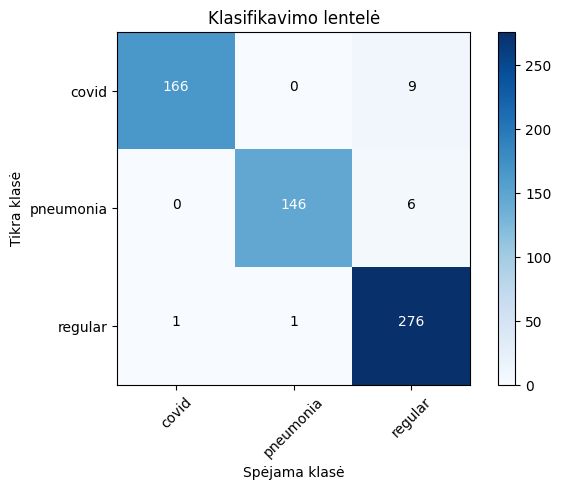

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 2
Class index 0: Weight 1.12
Class index 1: Weight 1.36
Class index 2: Weight 0.73
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 42s 389ms/step - loss: 1.8635 - accuracy: 0.5525 - auc_7: 0.7465 - val_loss: 1.7674 - val_accuracy: 0.5165 - val_auc_7: 0.7423
Epoch 2/30
61/61 [==============================] - 26s 427ms/step - loss: 1.1109 - accuracy: 0.7426 - auc_7: 0.8915 - val_loss: 1.0732 - val_accuracy: 0.6612 - val_auc_7: 0.8751
Epoch 3/30
61/61 [==============================] - 26s 425ms/step - loss: 0.8811 - accuracy: 0.7974 - auc_7: 0.9257 - val_loss: 0.7806 - val_accuracy: 0.7955 - val_auc_7: 0.9326
Epoch 4/30
61/61 [==============================] - 26s 426ms/step - loss: 0.7621 - accuracy: 0.8171 - auc_7: 0.9392 - val_loss: 0.7029 - val_accuracy: 

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

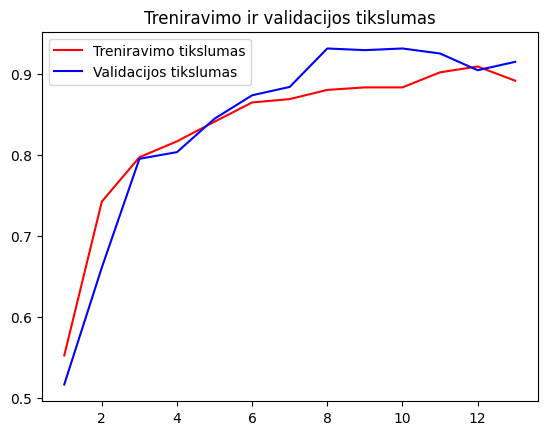

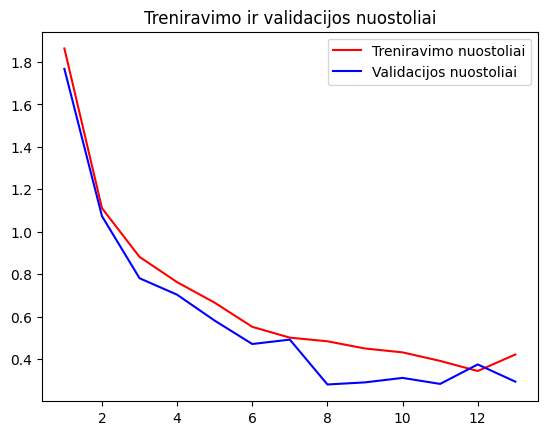

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_nadam_0.0002_fold_2.h5


<ipython-input-23-bff1f7c20e7c>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 67ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.95      0.90      0.92       180
   pneumonia       0.98      0.90      0.93       136
     regular       0.92      0.99      0.95       289

    accuracy                           0.94       605
   macro avg       0.95      0.93      0.94       605
weighted avg       0.94      0.94      0.94       605

Accuracy: 0.9404958677685951
Specificity for covid: 0.98
Specificity for pneumonia: 0.99
Specificity for regular: 0.92
Macro-average Specificity: 0.97


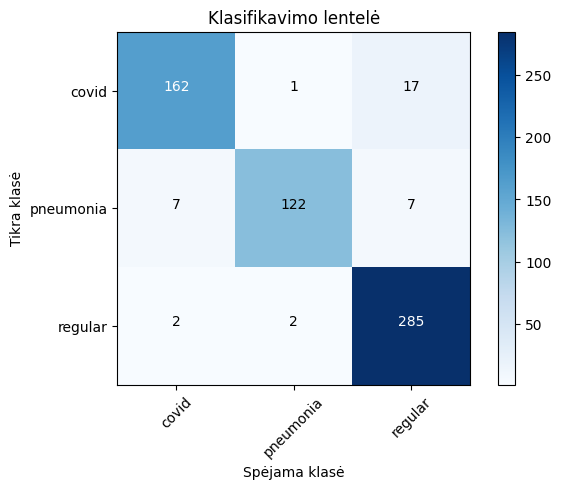

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 3
Class index 0: Weight 1.13
Class index 1: Weight 1.39
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 42s 395ms/step - loss: 1.8385 - accuracy: 0.5654 - auc_8: 0.7536 - val_loss: 1.3745 - val_accuracy: 0.6157 - val_auc_8: 0.8008
Epoch 2/30
61/61 [==============================] - 27s 444ms/step - loss: 1.1339 - accuracy: 0.7230 - auc_8: 0.8867 - val_loss: 1.2278 - val_accuracy: 0.6632 - val_auc_8: 0.8482
Epoch 3/30
61/61 [==============================] - 27s 432ms/step - loss: 0.9391 - accuracy: 0.7695 - auc_8: 0.9166 - val_loss: 0.8055 - val_accuracy: 0.7769 - val_auc_8: 0.9258
Epoch 4/30
61/61 [==============================] - 27s 437ms/step - loss: 0.7628 - accuracy: 0.8041 - auc_8: 0.9390 - val_loss: 0.6483 - val_accuracy: 

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

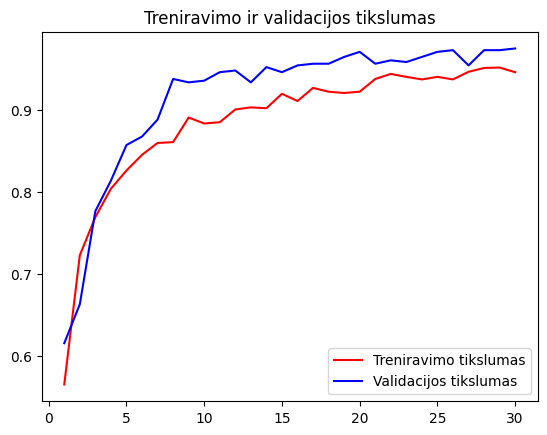

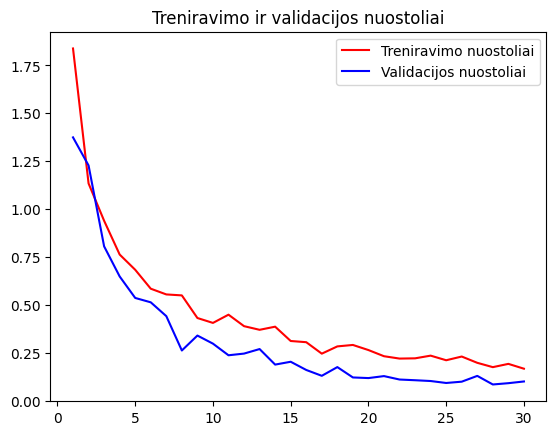

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_nadam_0.0002_fold_3.h5


<ipython-input-23-bff1f7c20e7c>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 63ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.96      0.95      0.95       187
   pneumonia       0.96      0.90      0.93       145
     regular       0.93      0.97      0.95       273

    accuracy                           0.95       605
   macro avg       0.95      0.94      0.94       605
weighted avg       0.95      0.95      0.95       605

Accuracy: 0.9454545454545454
Specificity for covid: 0.98
Specificity for pneumonia: 0.99
Specificity for regular: 0.94
Macro-average Specificity: 0.97


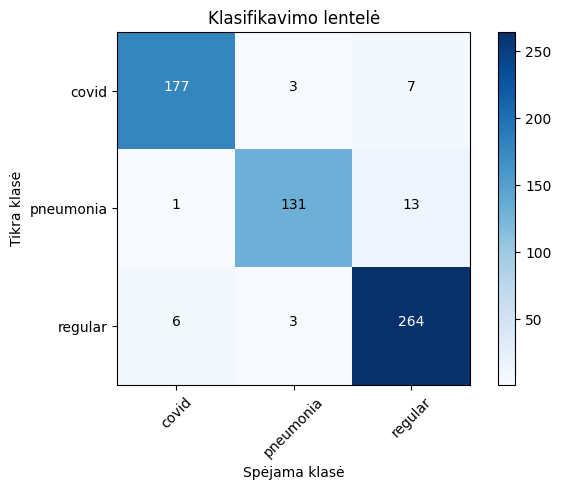

Found 1936 images belonging to 3 classes.
Found 604 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 4
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 41s 388ms/step - loss: 1.7860 - accuracy: 0.5770 - auc_9: 0.7645 - val_loss: 1.4587 - val_accuracy: 0.5888 - val_auc_9: 0.7941
Epoch 2/30
61/61 [==============================] - 26s 429ms/step - loss: 1.0527 - accuracy: 0.7376 - auc_9: 0.8967 - val_loss: 1.0625 - val_accuracy: 0.7231 - val_auc_9: 0.8758
Epoch 3/30
61/61 [==============================] - 27s 434ms/step - loss: 0.8436 - accuracy: 0.7898 - auc_9: 0.9275 - val_loss: 0.7142 - val_accuracy: 0.8182 - val_auc_9: 0.9390
Epoch 4/30
61/61 [==============================] - 26s 430ms/step - loss: 0.7266 - accuracy: 0.8270 - auc_9: 0.9448 - val_loss: 0.6374 - val_accuracy: 

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

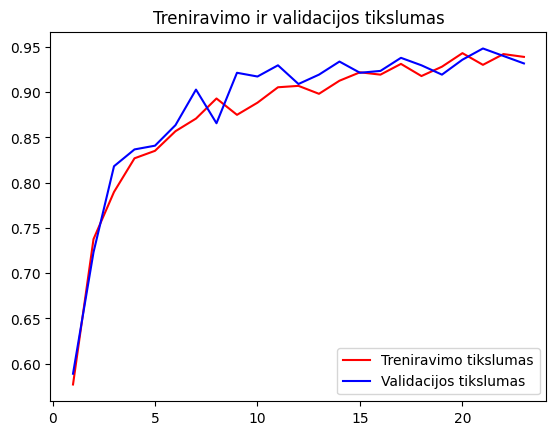

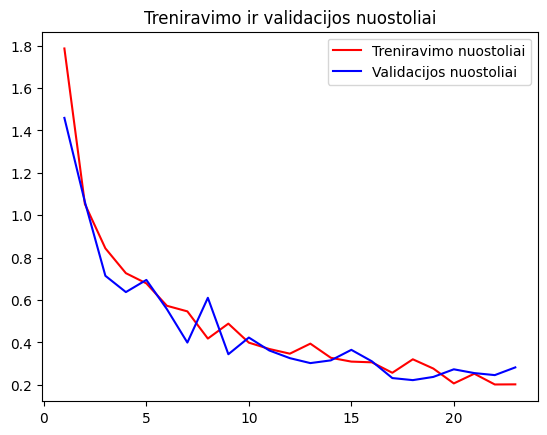

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_nadam_0.0002_fold_4.h5


<ipython-input-23-bff1f7c20e7c>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 69ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.97      0.87      0.92       173
   pneumonia       0.94      0.92      0.93       154
     regular       0.90      0.97      0.93       277

    accuracy                           0.93       604
   macro avg       0.94      0.92      0.93       604
weighted avg       0.93      0.93      0.93       604

Accuracy: 0.9271523178807947
Specificity for covid: 0.99
Specificity for pneumonia: 0.98
Specificity for regular: 0.91
Macro-average Specificity: 0.96


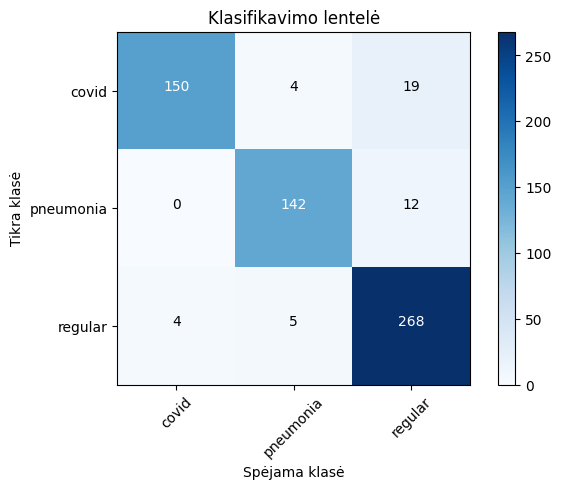

Final Metrics Across All Folds:
Average Accuracy: 0.95 ± 0.02
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.97 ± 0.02
Class covid - Average Recall: 0.92 ± 0.03
Class covid - Average F1 Score: 0.94 ± 0.02
Class pneumonia - Average Precision: 0.96 ± 0.02
Class pneumonia - Average Recall: 0.93 ± 0.03
Class pneumonia - Average F1 Score: 0.95 ± 0.02
Class regular - Average Precision: 0.93 ± 0.02
Class regular - Average Recall: 0.98 ± 0.01
Class regular - Average F1 Score: 0.95 ± 0.01


In [23]:
# For overall results
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    base_dir = f'/content/image_dataset/splits/fold_{fold}'
    train_dir = os.path.join(base_dir, 'train')
    test_dir = os.path.join(base_dir, 'test')
    val_dir = os.path.join(base_dir, 'val')


    # Data generators
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
        shuffle=False
    )

    val_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'
    )

    # Compute class weights
    class_weights_array = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_generator.classes),
        y=train_generator.classes
    )
    class_weights = {i: weight for i, weight in enumerate(class_weights_array)}

    print(f"Training fold {fold}")

    # Print the computed class weights
    for class_index, weight in class_weights.items():
        print(f"Class index {class_index}: Weight {weight:.2f}")

    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

    # Calculate the number of layers to make trainable
    total_layers = len(base_model.layers)
    layers_to_train = int(total_layers * 0.30)  # 30% of the total number of layers

    # Make the first 30% of layers trainable
    for layer in base_model.layers[:layers_to_train]:
        layer.trainable = True

    # Freeze the rest of the layers
    for layer in base_model.layers[layers_to_train:]:
        layer.trainable = False

    # Freeze the layers of the base model
    #base_model.trainable = False


    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  # Dropout added here
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)  # Another Dropout layer
    # Add a fully connected layer for classification
    output_layer = Dense(3, activation='softmax')(x)


    # Construct the final model
    model = Model(inputs=base_model.input, outputs=output_layer)

    #optimizer
    my_optimizer = Nadam(learning_rate=0.0002)

    # Compile the model
    model.compile(optimizer=my_optimizer, loss=focal_loss(), metrics=['accuracy', AUC()])

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


    #model params
    total_params = model.count_params()
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    non_trainable_params = total_params - trainable_params

    print(f"Total parameters: {total_params}")
    print(f"Trainable parameters: {trainable_params}")
    print(f"Non-trainable parameters: {non_trainable_params}")

    # Train the model
    history = model.fit(
        train_generator,
        epochs=30,
        validation_data=val_generator,
        class_weight=class_weights,
        callbacks=[early_stopping]
    )

    #training results
    plot_training(history)

    # Save the model
    model_save_path = f'/content/drive/MyDrive/Bakis/ModelOutputs/focal_nadam_0.0002_fold_{fold}.h5'
    model.save(model_save_path)
    print(f"Model saved to {model_save_path}")


    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## Focal loss + nadam + 0.0001

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 0
Class index 0: Weight 1.15
Class index 1: Weight 1.37
Class index 2: Weight 0.71
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 40s 384ms/step - loss: 2.1156 - accuracy: 0.5240 - auc_10: 0.6924 - val_loss: 1.4672 - val_accuracy: 0.5640 - val_auc_10: 0.7934
Epoch 2/30
61/61 [==============================] - 26s 429ms/step - loss: 1.4473 - accuracy: 0.6594 - auc_10: 0.8306 - val_loss: 1.1119 - val_accuracy: 0.6756 - val_auc_10: 0.8682
Epoch 3/30
61/61 [==============================] - 26s 426ms/step - loss: 1.0956 - accuracy: 0.7359 - auc_10: 0.8889 - val_loss: 0.8568 - val_accuracy: 0.7727 - val_auc_10: 0.9185
Epoch 4/30
61/61 [==============================] - 26s 424ms/step - loss: 1.0339 - accuracy: 0.7556 - auc_10: 0.9011 - val_loss: 0.6655 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

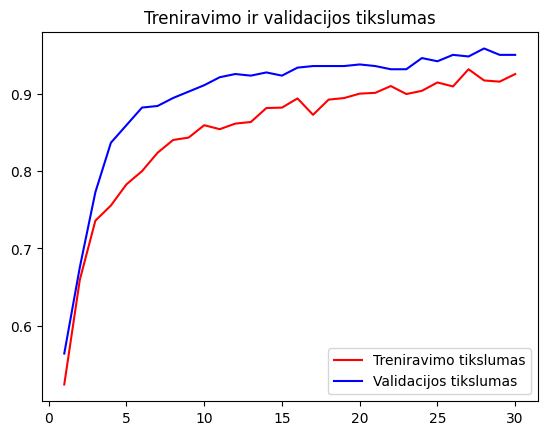

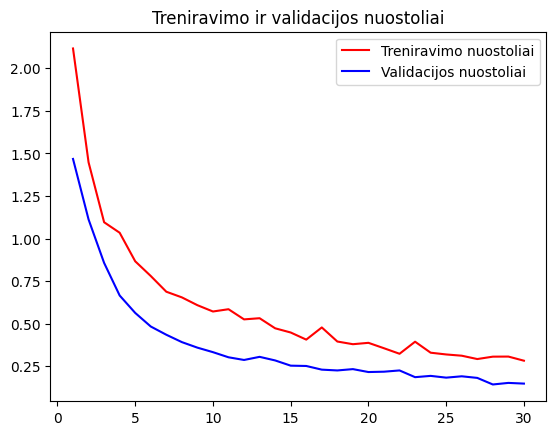

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_nadam_0.0001_fold_0.h5


<ipython-input-24-dbed11919d28>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 64ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.99      0.92      0.96       203
   pneumonia       0.97      0.96      0.96       139
     regular       0.93      0.99      0.96       263

    accuracy                           0.96       605
   macro avg       0.96      0.96      0.96       605
weighted avg       0.96      0.96      0.96       605

Accuracy: 0.9586776859504132
Specificity for covid: 1.00
Specificity for pneumonia: 0.99
Specificity for regular: 0.94
Macro-average Specificity: 0.98


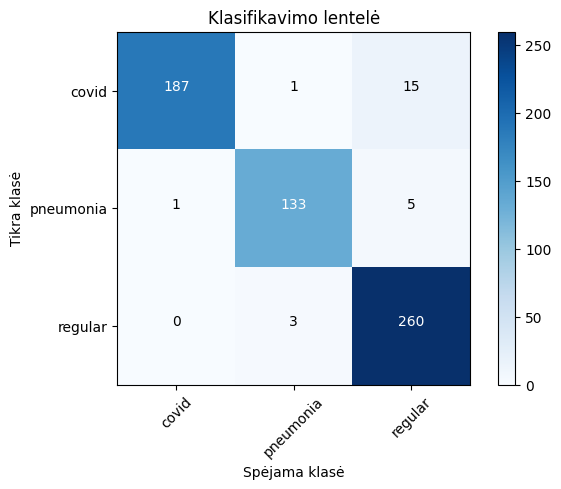

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 1
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 41s 384ms/step - loss: 2.1249 - accuracy: 0.5111 - auc_11: 0.6946 - val_loss: 1.8388 - val_accuracy: 0.5145 - val_auc_11: 0.6975
Epoch 2/30
61/61 [==============================] - 26s 420ms/step - loss: 1.3968 - accuracy: 0.6698 - auc_11: 0.8380 - val_loss: 1.2961 - val_accuracy: 0.6570 - val_auc_11: 0.8255
Epoch 3/30
61/61 [==============================] - 26s 421ms/step - loss: 1.1544 - accuracy: 0.7266 - auc_11: 0.8822 - val_loss: 1.1637 - val_accuracy: 0.6983 - val_auc_11: 0.8651
Epoch 4/30
61/61 [==============================] - 26s 415ms/step - loss: 1.0450 - accuracy: 0.7468 - auc_11: 0.8993 - val_loss: 0.8825 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

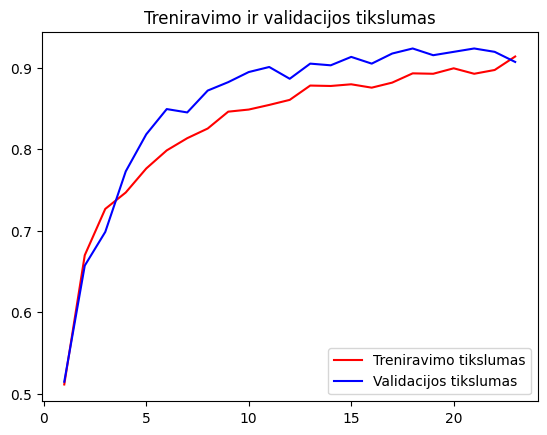

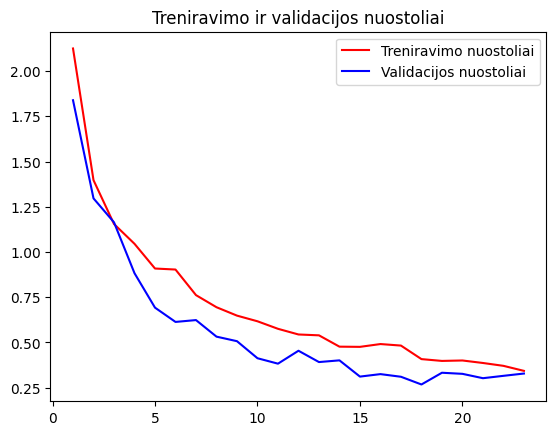

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_nadam_0.0001_fold_1.h5


<ipython-input-24-dbed11919d28>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 70ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.96      0.90      0.93       175
   pneumonia       0.94      0.97      0.95       152
     regular       0.93      0.95      0.94       278

    accuracy                           0.94       605
   macro avg       0.94      0.94      0.94       605
weighted avg       0.94      0.94      0.94       605

Accuracy: 0.9404958677685951
Specificity for covid: 0.99
Specificity for pneumonia: 0.98
Specificity for regular: 0.94
Macro-average Specificity: 0.97


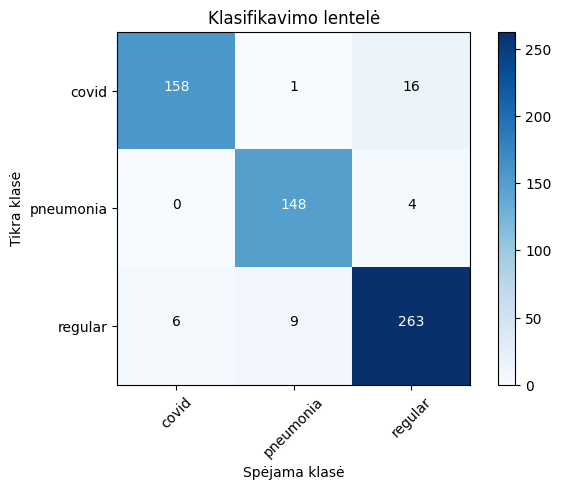

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 2
Class index 0: Weight 1.12
Class index 1: Weight 1.36
Class index 2: Weight 0.73
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 43s 387ms/step - loss: 2.0053 - accuracy: 0.5230 - auc_12: 0.7038 - val_loss: 1.6465 - val_accuracy: 0.5269 - val_auc_12: 0.7517
Epoch 2/30
61/61 [==============================] - 26s 430ms/step - loss: 1.4398 - accuracy: 0.6708 - auc_12: 0.8347 - val_loss: 1.1766 - val_accuracy: 0.6736 - val_auc_12: 0.8541
Epoch 3/30
61/61 [==============================] - 26s 430ms/step - loss: 1.1135 - accuracy: 0.7416 - auc_12: 0.8913 - val_loss: 0.9707 - val_accuracy: 0.7190 - val_auc_12: 0.8983
Epoch 4/30
61/61 [==============================] - 26s 430ms/step - loss: 1.0028 - accuracy: 0.7597 - auc_12: 0.9065 - val_loss: 0.8736 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

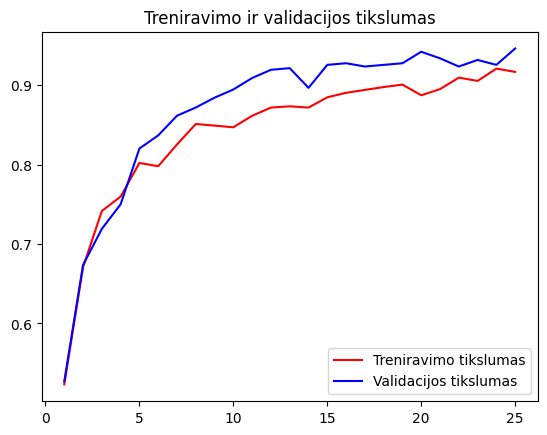

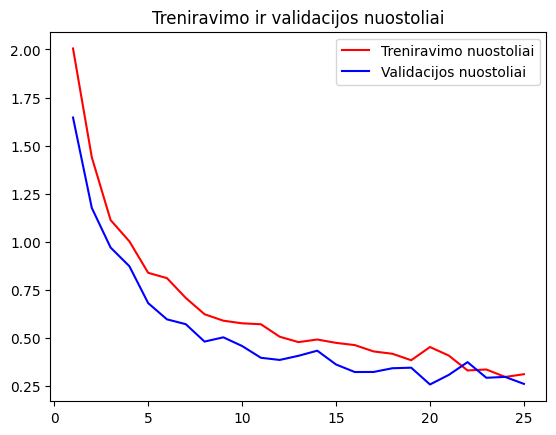

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_nadam_0.0001_fold_2.h5


<ipython-input-24-dbed11919d28>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 2s 62ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.98      0.94      0.96       180
   pneumonia       0.96      0.96      0.96       136
     regular       0.96      0.98      0.97       289

    accuracy                           0.97       605
   macro avg       0.97      0.96      0.96       605
weighted avg       0.97      0.97      0.97       605

Accuracy: 0.9652892561983472
Specificity for covid: 0.99
Specificity for pneumonia: 0.99
Specificity for regular: 0.96
Macro-average Specificity: 0.98


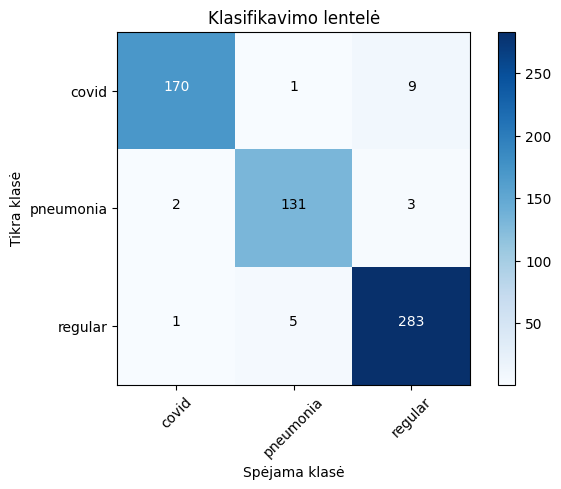

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 3
Class index 0: Weight 1.13
Class index 1: Weight 1.39
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 40s 379ms/step - loss: 2.1035 - accuracy: 0.4966 - auc_13: 0.6871 - val_loss: 1.3859 - val_accuracy: 0.5826 - val_auc_13: 0.8076
Epoch 2/30
61/61 [==============================] - 26s 420ms/step - loss: 1.4364 - accuracy: 0.6548 - auc_13: 0.8260 - val_loss: 0.9977 - val_accuracy: 0.7417 - val_auc_13: 0.8996
Epoch 3/30
61/61 [==============================] - 26s 419ms/step - loss: 1.1606 - accuracy: 0.7065 - auc_13: 0.8769 - val_loss: 0.7029 - val_accuracy: 0.8182 - val_auc_13: 0.9462
Epoch 4/30
61/61 [==============================] - 26s 420ms/step - loss: 1.0229 - accuracy: 0.7488 - auc_13: 0.9004 - val_loss: 0.5702 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

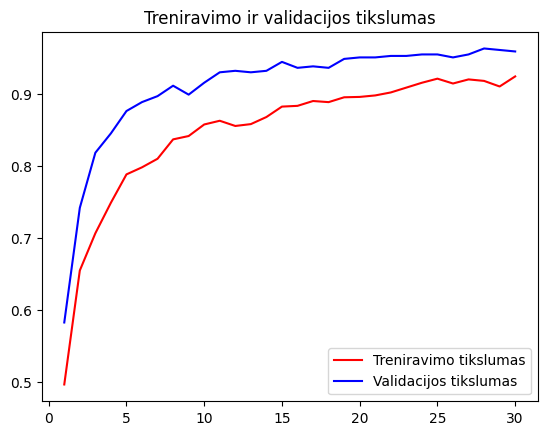

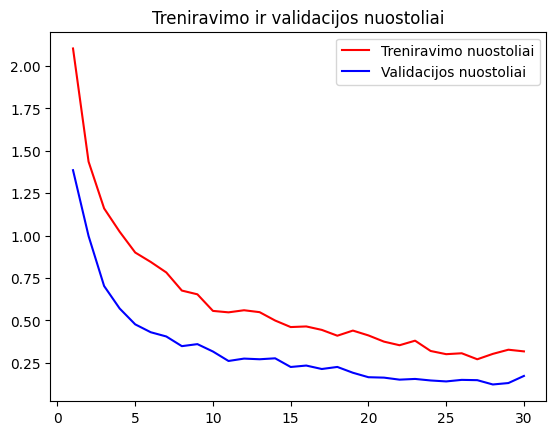

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_nadam_0.0001_fold_3.h5


<ipython-input-24-dbed11919d28>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 67ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.99      0.87      0.92       187
   pneumonia       0.96      0.94      0.95       145
     regular       0.90      0.99      0.94       273

    accuracy                           0.94       605
   macro avg       0.95      0.93      0.94       605
weighted avg       0.94      0.94      0.94       605

Accuracy: 0.9388429752066115
Specificity for covid: 1.00
Specificity for pneumonia: 0.99
Specificity for regular: 0.91
Macro-average Specificity: 0.96


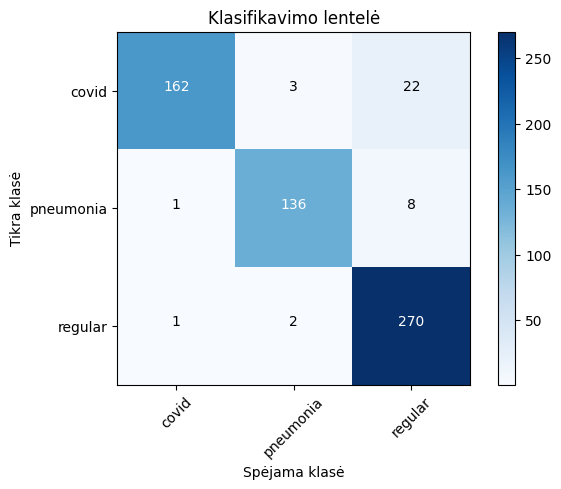

Found 1936 images belonging to 3 classes.
Found 604 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 4
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 41s 382ms/step - loss: 2.2419 - accuracy: 0.4737 - auc_14: 0.6594 - val_loss: 1.5301 - val_accuracy: 0.5826 - val_auc_14: 0.7539
Epoch 2/30
61/61 [==============================] - 26s 422ms/step - loss: 1.3517 - accuracy: 0.6808 - auc_14: 0.8449 - val_loss: 1.2396 - val_accuracy: 0.6860 - val_auc_14: 0.8459
Epoch 3/30
61/61 [==============================] - 26s 426ms/step - loss: 1.1384 - accuracy: 0.7195 - auc_14: 0.8779 - val_loss: 1.1234 - val_accuracy: 0.7066 - val_auc_14: 0.8768
Epoch 4/30
61/61 [==============================] - 26s 430ms/step - loss: 0.9651 - accuracy: 0.7645 - auc_14: 0.9081 - val_loss: 0.9129 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

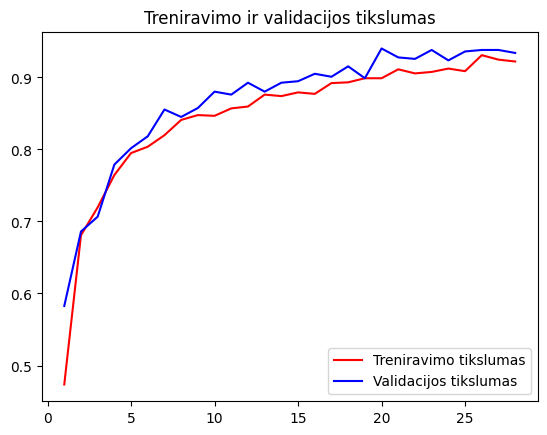

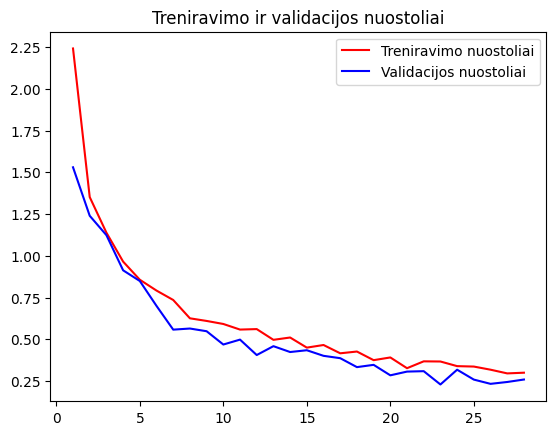

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_nadam_0.0001_fold_4.h5


<ipython-input-24-dbed11919d28>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 67ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.97      0.87      0.92       173
   pneumonia       0.95      0.95      0.95       154
     regular       0.91      0.97      0.94       277

    accuracy                           0.94       604
   macro avg       0.94      0.93      0.94       604
weighted avg       0.94      0.94      0.94       604

Accuracy: 0.9354304635761589
Specificity for covid: 0.99
Specificity for pneumonia: 0.98
Specificity for regular: 0.91
Macro-average Specificity: 0.96


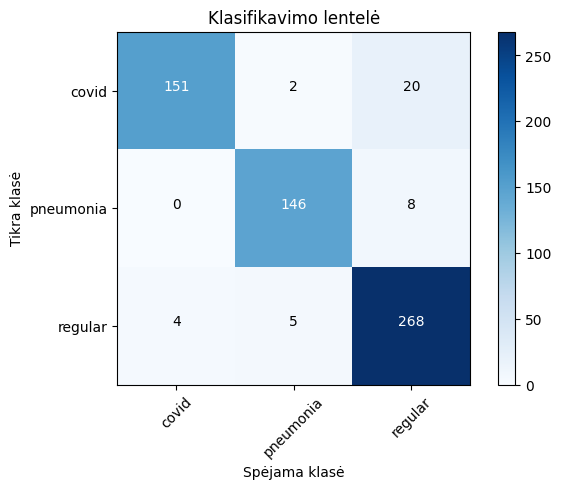

Final Metrics Across All Folds:
Average Accuracy: 0.95 ± 0.01
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.98 ± 0.01
Class covid - Average Recall: 0.90 ± 0.03
Class covid - Average F1 Score: 0.94 ± 0.02
Class pneumonia - Average Precision: 0.96 ± 0.01
Class pneumonia - Average Recall: 0.96 ± 0.01
Class pneumonia - Average F1 Score: 0.96 ± 0.00
Class regular - Average Precision: 0.92 ± 0.02
Class regular - Average Recall: 0.97 ± 0.02
Class regular - Average F1 Score: 0.95 ± 0.01


In [24]:
# For overall results
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    base_dir = f'/content/image_dataset/splits/fold_{fold}'
    train_dir = os.path.join(base_dir, 'train')
    test_dir = os.path.join(base_dir, 'test')
    val_dir = os.path.join(base_dir, 'val')


    # Data generators
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
        shuffle=False
    )

    val_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'
    )

    # Compute class weights
    class_weights_array = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_generator.classes),
        y=train_generator.classes
    )
    class_weights = {i: weight for i, weight in enumerate(class_weights_array)}

    print(f"Training fold {fold}")

    # Print the computed class weights
    for class_index, weight in class_weights.items():
        print(f"Class index {class_index}: Weight {weight:.2f}")

    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

    # Calculate the number of layers to make trainable
    total_layers = len(base_model.layers)
    layers_to_train = int(total_layers * 0.30)  # 30% of the total number of layers

    # Make the first 30% of layers trainable
    for layer in base_model.layers[:layers_to_train]:
        layer.trainable = True

    # Freeze the rest of the layers
    for layer in base_model.layers[layers_to_train:]:
        layer.trainable = False

    # Freeze the layers of the base model
    #base_model.trainable = False


    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  # Dropout added here
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)  # Another Dropout layer
    # Add a fully connected layer for classification
    output_layer = Dense(3, activation='softmax')(x)


    # Construct the final model
    model = Model(inputs=base_model.input, outputs=output_layer)

    #optimizer
    my_optimizer = Nadam(learning_rate=0.0001)

    # Compile the model
    model.compile(optimizer=my_optimizer, loss=focal_loss(), metrics=['accuracy', AUC()])

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


    #model params
    total_params = model.count_params()
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    non_trainable_params = total_params - trainable_params

    print(f"Total parameters: {total_params}")
    print(f"Trainable parameters: {trainable_params}")
    print(f"Non-trainable parameters: {non_trainable_params}")

    # Train the model
    history = model.fit(
        train_generator,
        epochs=30,
        validation_data=val_generator,
        class_weight=class_weights,
        callbacks=[early_stopping]
    )

    #training results
    plot_training(history)

    # Save the model
    model_save_path = f'/content/drive/MyDrive/Bakis/ModelOutputs/focal_nadam_0.0001_fold_{fold}.h5'
    model.save(model_save_path)
    print(f"Model saved to {model_save_path}")


    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## Cross entropy + nadam + 0.0001

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 0
Class index 0: Weight 1.15
Class index 1: Weight 1.37
Class index 2: Weight 0.71
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 43s 427ms/step - loss: 1.0101 - accuracy: 0.5018 - auc_15: 0.6996 - val_loss: 0.9667 - val_accuracy: 0.4897 - val_auc_15: 0.7292
Epoch 2/30
61/61 [==============================] - 26s 429ms/step - loss: 0.7467 - accuracy: 0.6842 - auc_15: 0.8531 - val_loss: 0.7605 - val_accuracy: 0.6322 - val_auc_15: 0.8378
Epoch 3/30
61/61 [==============================] - 26s 425ms/step - loss: 0.5864 - accuracy: 0.7643 - auc_15: 0.9109 - val_loss: 0.5963 - val_accuracy: 0.7479 - val_auc_15: 0.9032
Epoch 4/30
61/61 [==============================] - 26s 430ms/step - loss: 0.5312 - accuracy: 0.7886 - auc_15: 0.9264 - val_loss: 0.4666 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

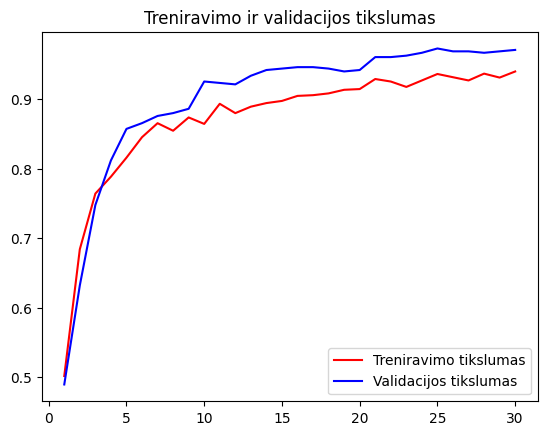

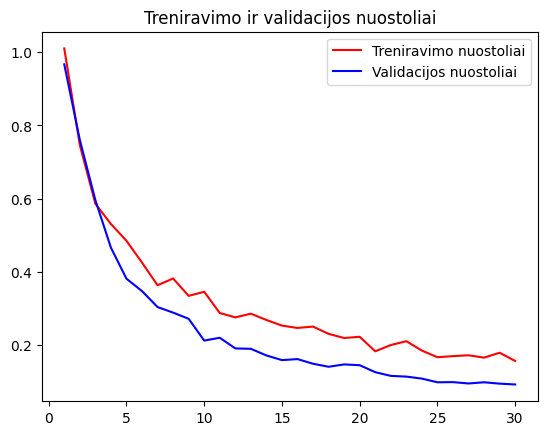

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_nadam_0.0001_fold_0.h5


<ipython-input-25-8e7750e536d5>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 74ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.99      0.91      0.95       203
   pneumonia       1.00      0.96      0.98       139
     regular       0.92      1.00      0.95       263

    accuracy                           0.96       605
   macro avg       0.97      0.95      0.96       605
weighted avg       0.96      0.96      0.96       605

Accuracy: 0.9570247933884297
Specificity for covid: 1.00
Specificity for pneumonia: 1.00
Specificity for regular: 0.93
Macro-average Specificity: 0.97


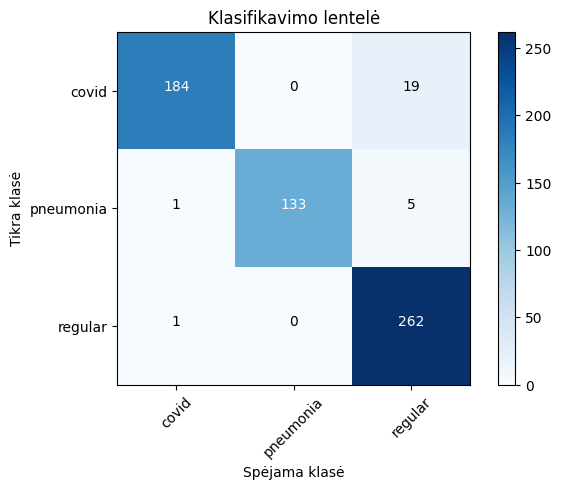

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 1
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 41s 386ms/step - loss: 0.9883 - accuracy: 0.5483 - auc_16: 0.7254 - val_loss: 0.8463 - val_accuracy: 0.6095 - val_auc_16: 0.8119
Epoch 2/30
61/61 [==============================] - 26s 426ms/step - loss: 0.7258 - accuracy: 0.7059 - auc_16: 0.8592 - val_loss: 0.7498 - val_accuracy: 0.6054 - val_auc_16: 0.8417
Epoch 3/30
61/61 [==============================] - 26s 425ms/step - loss: 0.5946 - accuracy: 0.7607 - auc_16: 0.9090 - val_loss: 0.5829 - val_accuracy: 0.7521 - val_auc_16: 0.9110
Epoch 4/30
61/61 [==============================] - 26s 426ms/step - loss: 0.5257 - accuracy: 0.8041 - auc_16: 0.9248 - val_loss: 0.4936 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

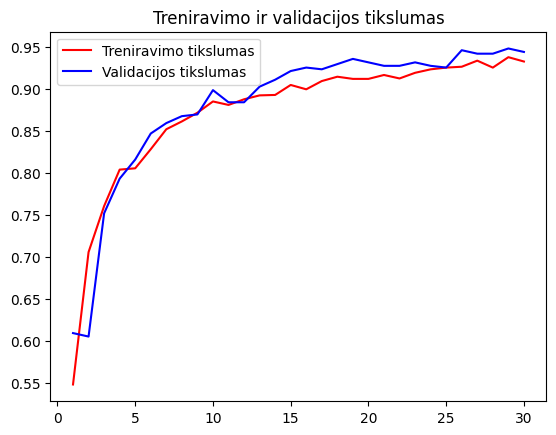

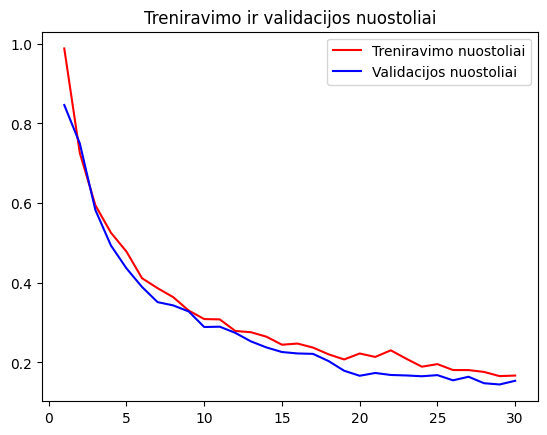

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_nadam_0.0001_fold_1.h5


<ipython-input-25-8e7750e536d5>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 70ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       1.00      0.90      0.95       175
   pneumonia       1.00      0.95      0.97       152
     regular       0.92      1.00      0.96       278

    accuracy                           0.96       605
   macro avg       0.97      0.95      0.96       605
weighted avg       0.96      0.96      0.96       605

Accuracy: 0.9586776859504132
Specificity for covid: 1.00
Specificity for pneumonia: 1.00
Specificity for regular: 0.92
Macro-average Specificity: 0.97


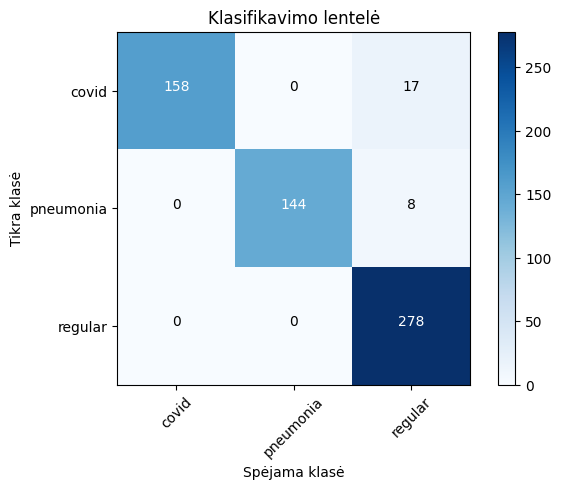

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 2
Class index 0: Weight 1.12
Class index 1: Weight 1.36
Class index 2: Weight 0.73
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 41s 384ms/step - loss: 1.0281 - accuracy: 0.5245 - auc_17: 0.7036 - val_loss: 0.9073 - val_accuracy: 0.5310 - val_auc_17: 0.7632
Epoch 2/30
61/61 [==============================] - 26s 421ms/step - loss: 0.7294 - accuracy: 0.6997 - auc_17: 0.8609 - val_loss: 0.7367 - val_accuracy: 0.6632 - val_auc_17: 0.8547
Epoch 3/30
61/61 [==============================] - 26s 427ms/step - loss: 0.5930 - accuracy: 0.7669 - auc_17: 0.9085 - val_loss: 0.6071 - val_accuracy: 0.7252 - val_auc_17: 0.9012
Epoch 4/30
61/61 [==============================] - 26s 425ms/step - loss: 0.5238 - accuracy: 0.7953 - auc_17: 0.9272 - val_loss: 0.5011 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

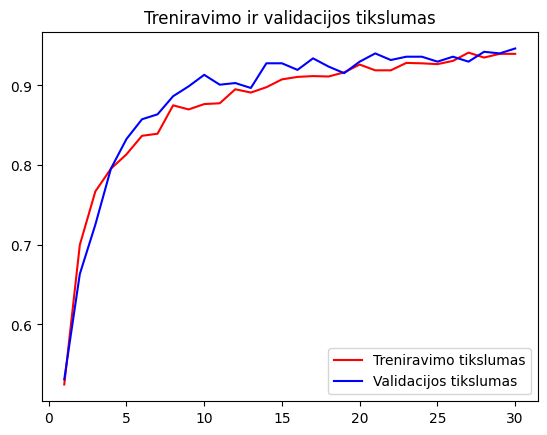

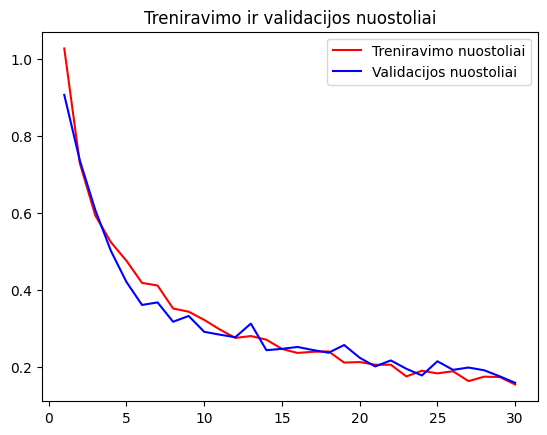

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_nadam_0.0001_fold_2.h5


<ipython-input-25-8e7750e536d5>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 71ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.97      0.92      0.94       180
   pneumonia       0.98      0.94      0.96       136
     regular       0.94      0.99      0.96       289

    accuracy                           0.96       605
   macro avg       0.96      0.95      0.95       605
weighted avg       0.96      0.96      0.96       605

Accuracy: 0.9553719008264463
Specificity for covid: 0.99
Specificity for pneumonia: 0.99
Specificity for regular: 0.94
Macro-average Specificity: 0.97


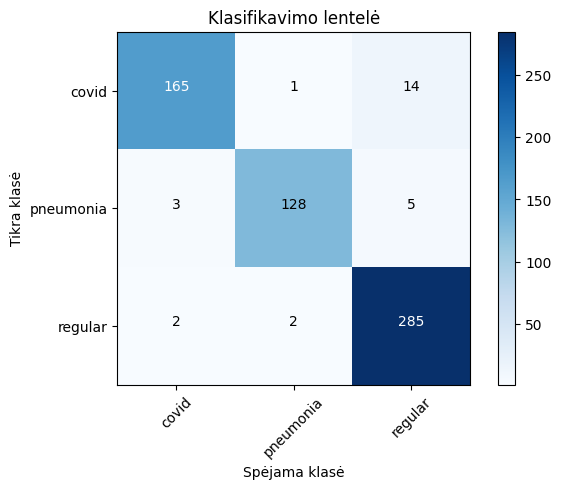

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 3
Class index 0: Weight 1.13
Class index 1: Weight 1.39
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 42s 391ms/step - loss: 0.9914 - accuracy: 0.5385 - auc_18: 0.7176 - val_loss: 0.8195 - val_accuracy: 0.5971 - val_auc_18: 0.8199
Epoch 2/30
61/61 [==============================] - 27s 441ms/step - loss: 0.7161 - accuracy: 0.6997 - auc_18: 0.8650 - val_loss: 0.6521 - val_accuracy: 0.7211 - val_auc_18: 0.8944
Epoch 3/30
61/61 [==============================] - 27s 432ms/step - loss: 0.6245 - accuracy: 0.7561 - auc_18: 0.8966 - val_loss: 0.5294 - val_accuracy: 0.7851 - val_auc_18: 0.9304
Epoch 4/30
61/61 [==============================] - 26s 427ms/step - loss: 0.5304 - accuracy: 0.7933 - auc_18: 0.9249 - val_loss: 0.4477 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

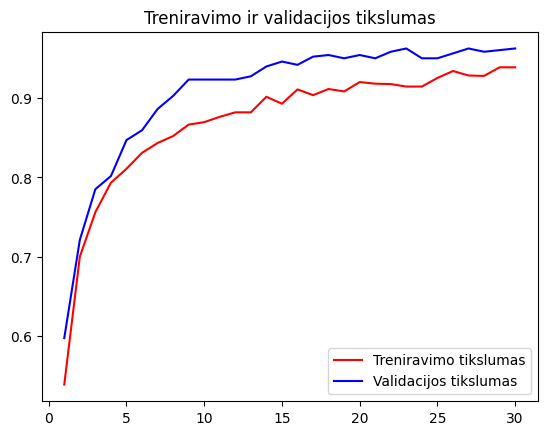

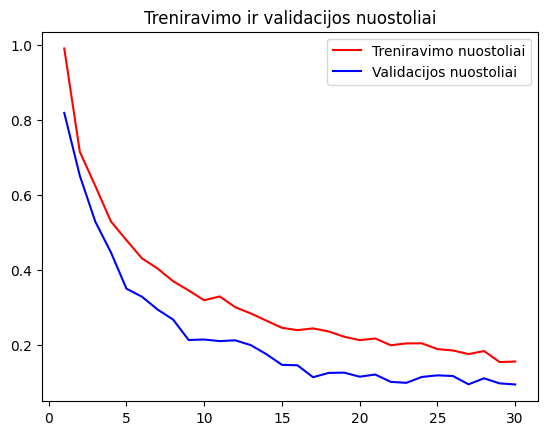

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_nadam_0.0001_fold_3.h5


<ipython-input-25-8e7750e536d5>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 73ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.99      0.94      0.96       187
   pneumonia       0.96      0.97      0.97       145
     regular       0.95      0.98      0.97       273

    accuracy                           0.97       605
   macro avg       0.97      0.96      0.97       605
weighted avg       0.97      0.97      0.97       605

Accuracy: 0.9652892561983472
Specificity for covid: 1.00
Specificity for pneumonia: 0.99
Specificity for regular: 0.96
Macro-average Specificity: 0.98


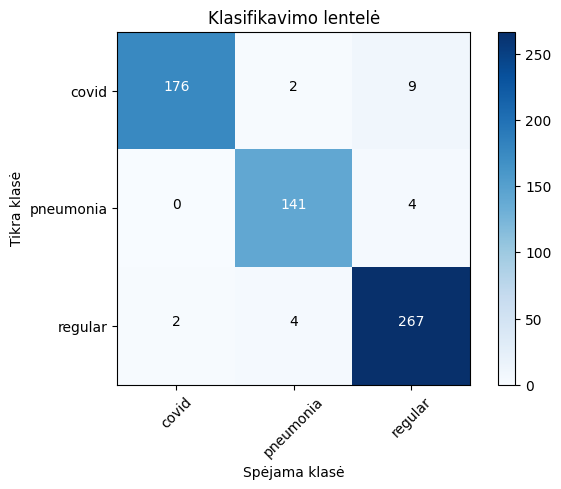

Found 1936 images belonging to 3 classes.
Found 604 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 4
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 47s 399ms/step - loss: 1.0088 - accuracy: 0.5088 - auc_19: 0.6983 - val_loss: 0.9173 - val_accuracy: 0.5186 - val_auc_19: 0.7586
Epoch 2/30
61/61 [==============================] - 27s 431ms/step - loss: 0.7060 - accuracy: 0.7071 - auc_19: 0.8658 - val_loss: 0.7982 - val_accuracy: 0.5888 - val_auc_19: 0.8211
Epoch 3/30
61/61 [==============================] - 26s 428ms/step - loss: 0.6282 - accuracy: 0.7521 - auc_19: 0.8940 - val_loss: 0.6547 - val_accuracy: 0.7128 - val_auc_19: 0.8813
Epoch 4/30
61/61 [==============================] - 26s 428ms/step - loss: 0.5093 - accuracy: 0.7918 - auc_19: 0.9297 - val_loss: 0.5137 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

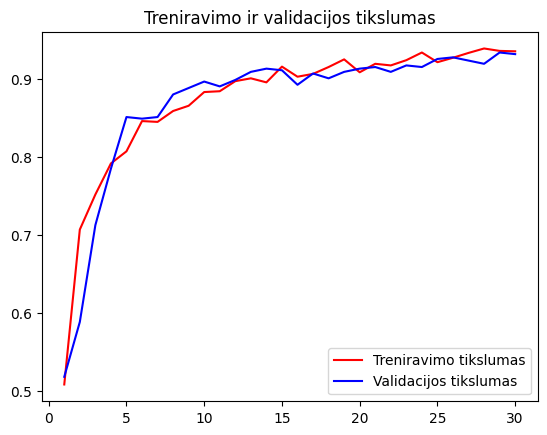

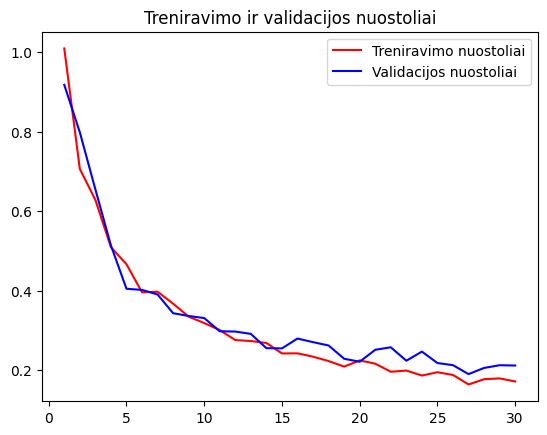

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_nadam_0.0001_fold_4.h5


<ipython-input-25-8e7750e536d5>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 70ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.98      0.84      0.90       173
   pneumonia       0.91      0.99      0.95       154
     regular       0.91      0.95      0.93       277

    accuracy                           0.93       604
   macro avg       0.93      0.92      0.93       604
weighted avg       0.93      0.93      0.92       604

Accuracy: 0.9254966887417219
Specificity for covid: 0.99
Specificity for pneumonia: 0.97
Specificity for regular: 0.92
Macro-average Specificity: 0.96


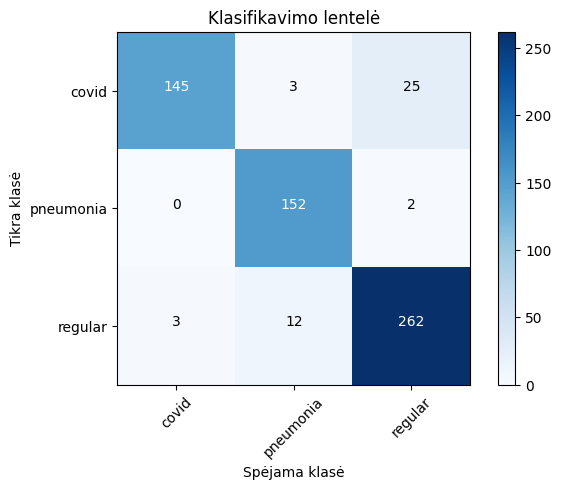

Final Metrics Across All Folds:
Average Accuracy: 0.95 ± 0.01
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.99 ± 0.01
Class covid - Average Recall: 0.90 ± 0.03
Class covid - Average F1 Score: 0.94 ± 0.02
Class pneumonia - Average Precision: 0.97 ± 0.03
Class pneumonia - Average Recall: 0.96 ± 0.02
Class pneumonia - Average F1 Score: 0.96 ± 0.01
Class regular - Average Precision: 0.93 ± 0.02
Class regular - Average Recall: 0.98 ± 0.02
Class regular - Average F1 Score: 0.95 ± 0.01


In [25]:
# For overall results
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    base_dir = f'/content/image_dataset/splits/fold_{fold}'
    train_dir = os.path.join(base_dir, 'train')
    test_dir = os.path.join(base_dir, 'test')
    val_dir = os.path.join(base_dir, 'val')


    # Data generators
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
        shuffle=False
    )

    val_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'
    )

    # Compute class weights
    class_weights_array = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_generator.classes),
        y=train_generator.classes
    )
    class_weights = {i: weight for i, weight in enumerate(class_weights_array)}

    print(f"Training fold {fold}")

    # Print the computed class weights
    for class_index, weight in class_weights.items():
        print(f"Class index {class_index}: Weight {weight:.2f}")

    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

    # Calculate the number of layers to make trainable
    total_layers = len(base_model.layers)
    layers_to_train = int(total_layers * 0.30)  # 30% of the total number of layers

    # Make the first 30% of layers trainable
    for layer in base_model.layers[:layers_to_train]:
        layer.trainable = True

    # Freeze the rest of the layers
    for layer in base_model.layers[layers_to_train:]:
        layer.trainable = False

    # Freeze the layers of the base model
    #base_model.trainable = False


    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  # Dropout added here
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)  # Another Dropout layer
    # Add a fully connected layer for classification
    output_layer = Dense(3, activation='softmax')(x)


    # Construct the final model
    model = Model(inputs=base_model.input, outputs=output_layer)

    #optimizer
    my_optimizer = Nadam(learning_rate=0.0001)

    # Compile the model
    model.compile(optimizer=my_optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy', AUC()])

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


    #model params
    total_params = model.count_params()
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    non_trainable_params = total_params - trainable_params

    print(f"Total parameters: {total_params}")
    print(f"Trainable parameters: {trainable_params}")
    print(f"Non-trainable parameters: {non_trainable_params}")

    # Train the model
    history = model.fit(
        train_generator,
        epochs=30,
        validation_data=val_generator,
        class_weight=class_weights,
        callbacks=[early_stopping]
    )

    #training results
    plot_training(history)

    # Save the model
    model_save_path = f'/content/drive/MyDrive/Bakis/ModelOutputs/cross_nadam_0.0001_fold_{fold}.h5'
    model.save(model_save_path)
    print(f"Model saved to {model_save_path}")


    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## Cross entropy + sgd + 0.0001

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 0
Class index 0: Weight 1.15
Class index 1: Weight 1.37
Class index 2: Weight 0.71
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 37s 426ms/step - loss: 1.2634 - accuracy: 0.3189 - auc_20: 0.4900 - val_loss: 1.0096 - val_accuracy: 0.5083 - val_auc_20: 0.6973
Epoch 2/30
61/61 [==============================] - 27s 441ms/step - loss: 1.1575 - accuracy: 0.3948 - auc_20: 0.5726 - val_loss: 0.9646 - val_accuracy: 0.4855 - val_auc_20: 0.7266
Epoch 3/30
61/61 [==============================] - 27s 439ms/step - loss: 1.1060 - accuracy: 0.4357 - auc_20: 0.6148 - val_loss: 0.9313 - val_accuracy: 0.5083 - val_auc_20: 0.7469
Epoch 4/30
61/61 [==============================] - 27s 436ms/step - loss: 1.0538 - accuracy: 0.4791 - auc_20: 0.6619 - val_loss: 0.9049 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

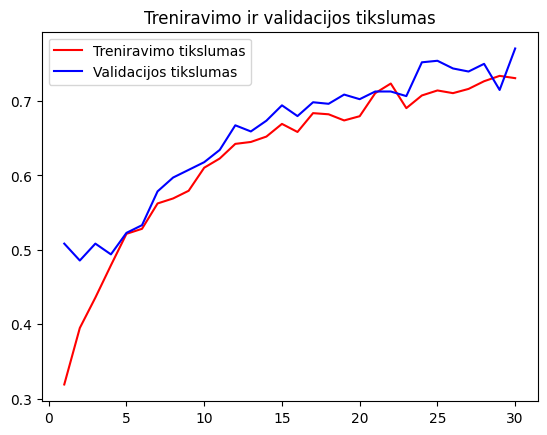

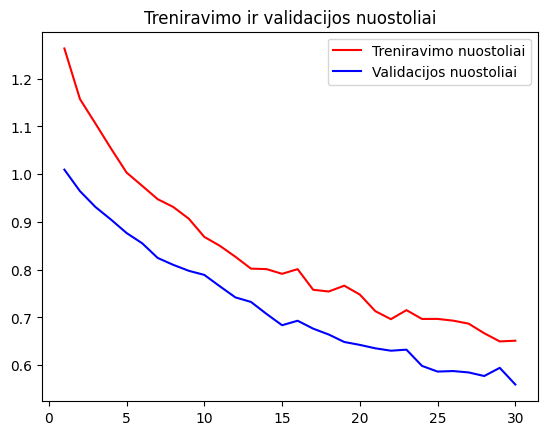

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_sgd_0001_fold_0.h5


<ipython-input-29-23681ee242c0>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 64ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.86      0.53      0.65       203
   pneumonia       0.84      0.77      0.80       139
     regular       0.70      0.93      0.80       263

    accuracy                           0.76       605
   macro avg       0.80      0.74      0.75       605
weighted avg       0.78      0.76      0.75       605

Accuracy: 0.7586776859504132
Specificity for covid: 0.96
Specificity for pneumonia: 0.95
Specificity for regular: 0.69
Macro-average Specificity: 0.87


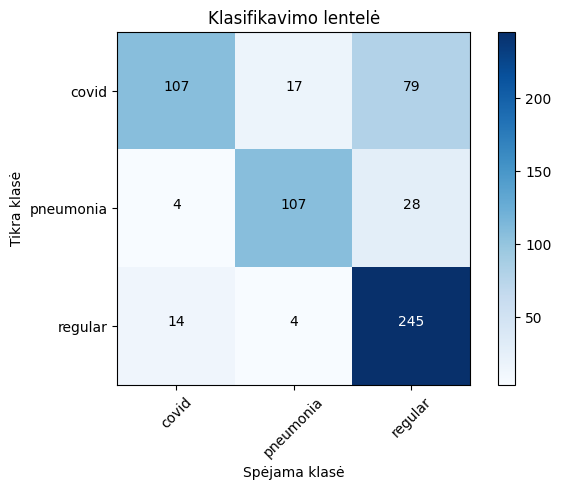

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 1
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 37s 438ms/step - loss: 1.2759 - accuracy: 0.3680 - auc_21: 0.5472 - val_loss: 0.9621 - val_accuracy: 0.5661 - val_auc_21: 0.7830
Epoch 2/30
61/61 [==============================] - 26s 431ms/step - loss: 1.1557 - accuracy: 0.4212 - auc_21: 0.5952 - val_loss: 0.9376 - val_accuracy: 0.5207 - val_auc_21: 0.7781
Epoch 3/30
61/61 [==============================] - 26s 429ms/step - loss: 1.0960 - accuracy: 0.4610 - auc_21: 0.6261 - val_loss: 0.9070 - val_accuracy: 0.5496 - val_auc_21: 0.7893
Epoch 4/30
61/61 [==============================] - 27s 438ms/step - loss: 1.0342 - accuracy: 0.4915 - auc_21: 0.6736 - val_loss: 0.8837 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

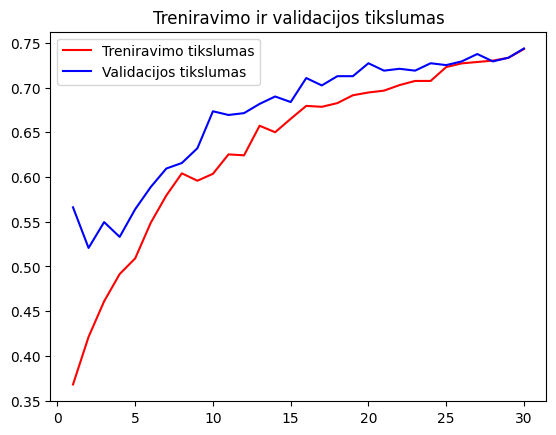

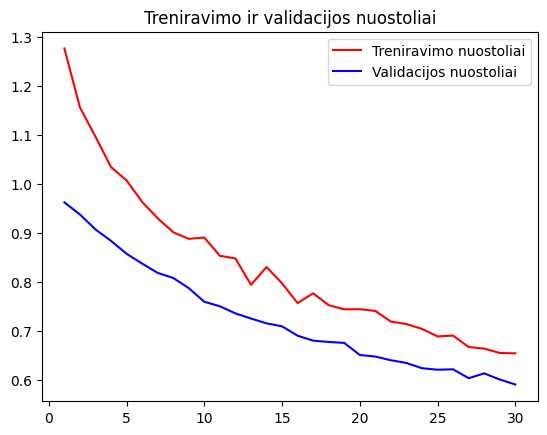

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_sgd_0001_fold_1.h5


<ipython-input-29-23681ee242c0>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 63ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.74      0.55      0.63       175
   pneumonia       0.81      0.77      0.79       152
     regular       0.73      0.86      0.79       278

    accuracy                           0.75       605
   macro avg       0.76      0.73      0.74       605
weighted avg       0.75      0.75      0.74       605

Accuracy: 0.7487603305785124
Specificity for covid: 0.92
Specificity for pneumonia: 0.94
Specificity for regular: 0.72
Macro-average Specificity: 0.86


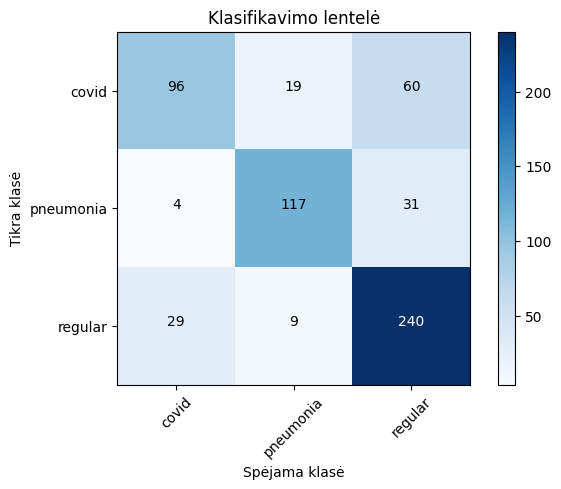

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 2
Class index 0: Weight 1.12
Class index 1: Weight 1.36
Class index 2: Weight 0.73
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 37s 442ms/step - loss: 1.2817 - accuracy: 0.3633 - auc_22: 0.5261 - val_loss: 1.0631 - val_accuracy: 0.4339 - val_auc_22: 0.6111
Epoch 2/30
61/61 [==============================] - 27s 437ms/step - loss: 1.1721 - accuracy: 0.3928 - auc_22: 0.5638 - val_loss: 0.9896 - val_accuracy: 0.5310 - val_auc_22: 0.7248
Epoch 3/30
61/61 [==============================] - 26s 427ms/step - loss: 1.1119 - accuracy: 0.4470 - auc_22: 0.6212 - val_loss: 0.9340 - val_accuracy: 0.5744 - val_auc_22: 0.7870
Epoch 4/30
61/61 [==============================] - 26s 427ms/step - loss: 1.0748 - accuracy: 0.4532 - auc_22: 0.6429 - val_loss: 0.8965 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

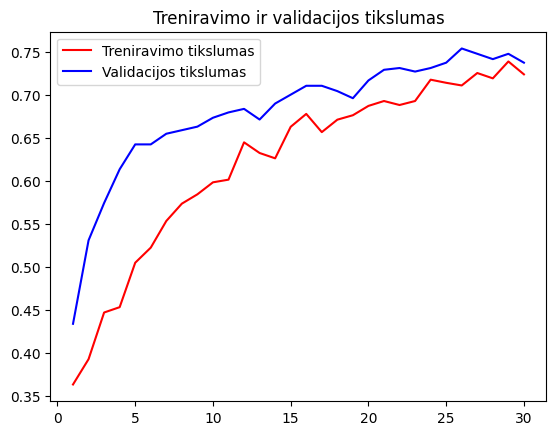

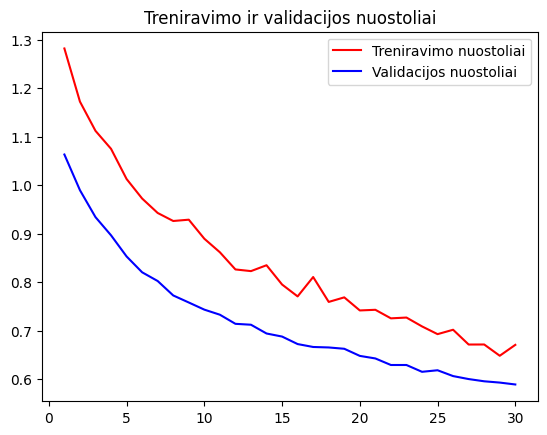

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_sgd_0001_fold_2.h5


<ipython-input-29-23681ee242c0>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 62ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.74      0.56      0.64       180
   pneumonia       0.81      0.70      0.75       136
     regular       0.73      0.88      0.80       289

    accuracy                           0.75       605
   macro avg       0.76      0.71      0.73       605
weighted avg       0.75      0.75      0.74       605

Accuracy: 0.7454545454545455
Specificity for covid: 0.92
Specificity for pneumonia: 0.95
Specificity for regular: 0.70
Macro-average Specificity: 0.85


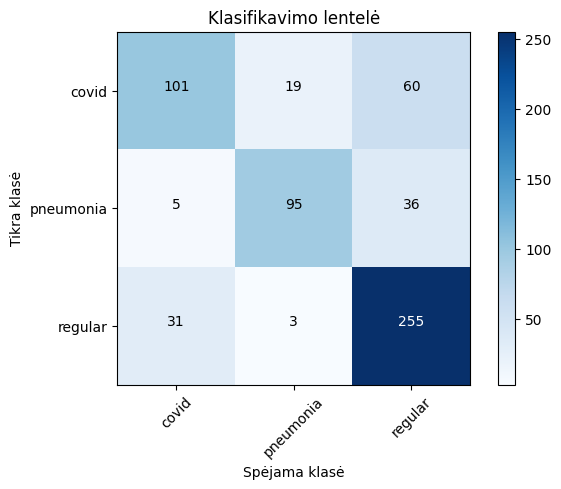

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 3
Class index 0: Weight 1.13
Class index 1: Weight 1.39
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 36s 427ms/step - loss: 1.2427 - accuracy: 0.3855 - auc_23: 0.5567 - val_loss: 1.0582 - val_accuracy: 0.4380 - val_auc_23: 0.6200
Epoch 2/30
61/61 [==============================] - 26s 427ms/step - loss: 1.1420 - accuracy: 0.4145 - auc_23: 0.5902 - val_loss: 0.9761 - val_accuracy: 0.4938 - val_auc_23: 0.7195
Epoch 3/30
61/61 [==============================] - 26s 429ms/step - loss: 1.0932 - accuracy: 0.4646 - auc_23: 0.6327 - val_loss: 0.9075 - val_accuracy: 0.5558 - val_auc_23: 0.7835
Epoch 4/30
61/61 [==============================] - 26s 429ms/step - loss: 1.0439 - accuracy: 0.4930 - auc_23: 0.6688 - val_loss: 0.8766 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

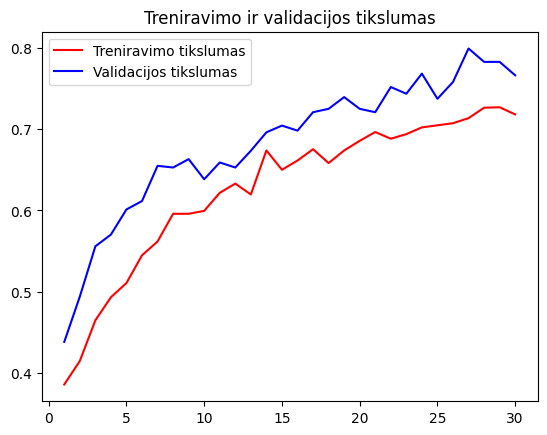

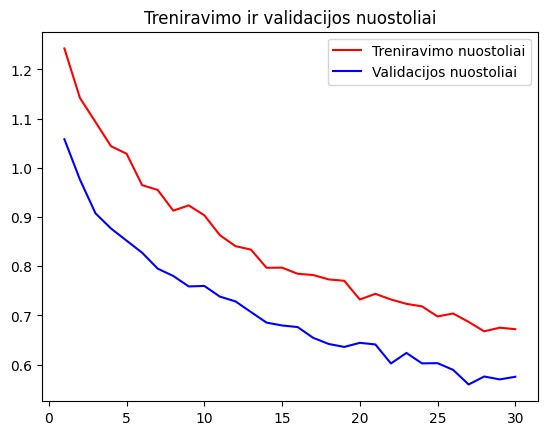

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_sgd_0001_fold_3.h5


<ipython-input-29-23681ee242c0>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 68ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.78      0.50      0.61       187
   pneumonia       0.70      0.86      0.77       145
     regular       0.75      0.84      0.80       273

    accuracy                           0.74       605
   macro avg       0.74      0.74      0.73       605
weighted avg       0.75      0.74      0.73       605

Accuracy: 0.7421487603305785
Specificity for covid: 0.94
Specificity for pneumonia: 0.88
Specificity for regular: 0.77
Macro-average Specificity: 0.86


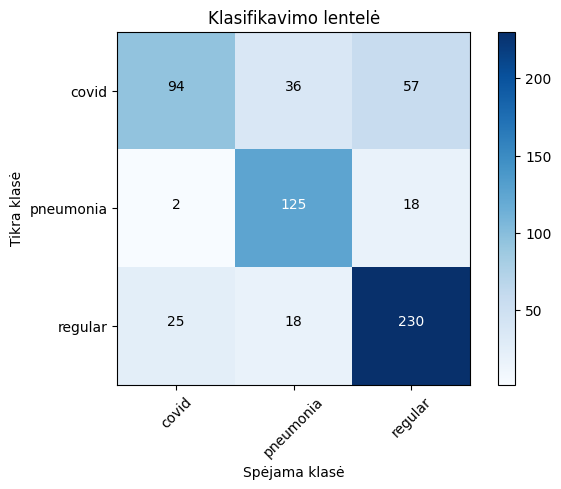

Found 1936 images belonging to 3 classes.
Found 604 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 4
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 36s 429ms/step - loss: 1.2599 - accuracy: 0.3585 - auc_24: 0.5305 - val_loss: 1.1056 - val_accuracy: 0.3285 - val_auc_24: 0.5187
Epoch 2/30
61/61 [==============================] - 26s 427ms/step - loss: 1.1701 - accuracy: 0.3874 - auc_24: 0.5665 - val_loss: 1.0256 - val_accuracy: 0.5041 - val_auc_24: 0.6880
Epoch 3/30
61/61 [==============================] - 26s 431ms/step - loss: 1.1094 - accuracy: 0.4437 - auc_24: 0.6185 - val_loss: 0.9778 - val_accuracy: 0.5393 - val_auc_24: 0.7440
Epoch 4/30
61/61 [==============================] - 26s 427ms/step - loss: 1.0589 - accuracy: 0.4726 - auc_24: 0.6496 - val_loss: 0.9450 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

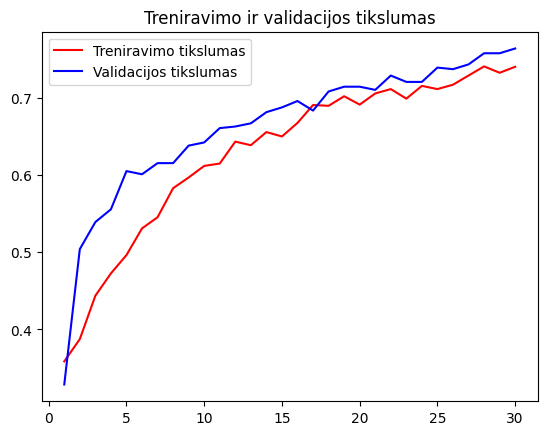

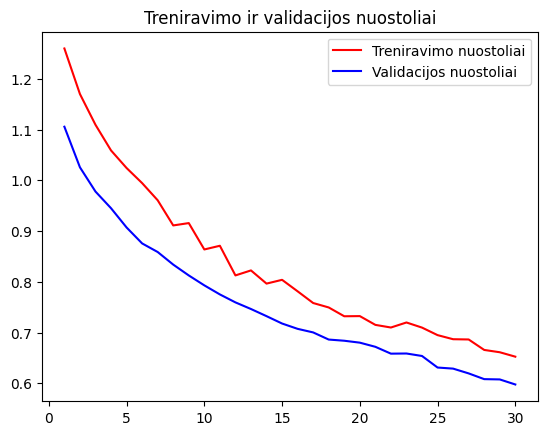

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/cross_sgd_0001_fold_4.h5


<ipython-input-29-23681ee242c0>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 69ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.89      0.49      0.63       173
   pneumonia       0.82      0.75      0.78       154
     regular       0.71      0.94      0.81       277

    accuracy                           0.76       604
   macro avg       0.80      0.73      0.74       604
weighted avg       0.79      0.76      0.75       604

Accuracy: 0.7632450331125827
Specificity for covid: 0.97
Specificity for pneumonia: 0.94
Specificity for regular: 0.68
Macro-average Specificity: 0.86


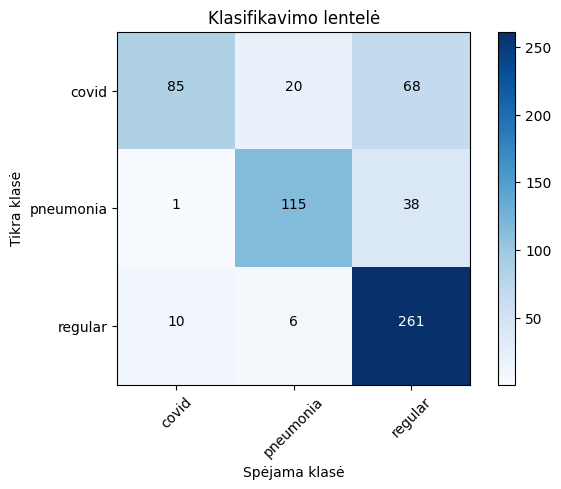

Final Metrics Across All Folds:
Average Accuracy: 0.75 ± 0.01
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.80 ± 0.06
Class covid - Average Recall: 0.53 ± 0.03
Class covid - Average F1 Score: 0.63 ± 0.01
Class pneumonia - Average Precision: 0.79 ± 0.05
Class pneumonia - Average Recall: 0.77 ± 0.05
Class pneumonia - Average F1 Score: 0.78 ± 0.02
Class regular - Average Precision: 0.72 ± 0.02
Class regular - Average Recall: 0.89 ± 0.04
Class regular - Average F1 Score: 0.80 ± 0.01


In [29]:
# For overall results
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    base_dir = f'/content/image_dataset/splits/fold_{fold}'
    train_dir = os.path.join(base_dir, 'train')
    test_dir = os.path.join(base_dir, 'test')
    val_dir = os.path.join(base_dir, 'val')


    # Data generators
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
        shuffle=False
    )

    val_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'
    )

    # Compute class weights
    class_weights_array = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_generator.classes),
        y=train_generator.classes
    )
    class_weights = {i: weight for i, weight in enumerate(class_weights_array)}

    print(f"Training fold {fold}")

    # Print the computed class weights
    for class_index, weight in class_weights.items():
        print(f"Class index {class_index}: Weight {weight:.2f}")

    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

    # Calculate the number of layers to make trainable
    total_layers = len(base_model.layers)
    layers_to_train = int(total_layers * 0.30)  # 30% of the total number of layers

    # Make the first 30% of layers trainable
    for layer in base_model.layers[:layers_to_train]:
        layer.trainable = True

    # Freeze the rest of the layers
    for layer in base_model.layers[layers_to_train:]:
        layer.trainable = False

    # Freeze the layers of the base model
    #base_model.trainable = False


    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  # Dropout added here
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)  # Another Dropout layer
    # Add a fully connected layer for classification
    output_layer = Dense(3, activation='softmax')(x)


    # Construct the final model
    model = Model(inputs=base_model.input, outputs=output_layer)

    #optimizer
    my_optimizer = SGD(learning_rate=0.0001, momentum=0.9)

    # Compile the model
    model.compile(optimizer=my_optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy', AUC()])

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


    #model params
    total_params = model.count_params()
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    non_trainable_params = total_params - trainable_params

    print(f"Total parameters: {total_params}")
    print(f"Trainable parameters: {trainable_params}")
    print(f"Non-trainable parameters: {non_trainable_params}")

    # Train the model
    history = model.fit(
        train_generator,
        epochs=30,
        validation_data=val_generator,
        class_weight=class_weights,
        callbacks=[early_stopping]
    )

    #training results
    plot_training(history)

    # Save the model
    model_save_path = f'/content/drive/MyDrive/Bakis/ModelOutputs/cross_sgd_0001_fold_{fold}.h5'
    model.save(model_save_path)
    print(f"Model saved to {model_save_path}")


    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## Focal loss + adam + 0.0001

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 0
Class index 0: Weight 1.15
Class index 1: Weight 1.37
Class index 2: Weight 0.71
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 40s 393ms/step - loss: 2.0181 - accuracy: 0.5147 - auc_25: 0.7019 - val_loss: 1.5442 - val_accuracy: 0.5682 - val_auc_25: 0.7626
Epoch 2/30
61/61 [==============================] - 27s 433ms/step - loss: 1.4826 - accuracy: 0.6620 - auc_25: 0.8257 - val_loss: 1.0922 - val_accuracy: 0.6632 - val_auc_25: 0.8674
Epoch 3/30
61/61 [==============================] - 27s 437ms/step - loss: 1.0641 - accuracy: 0.7390 - auc_25: 0.8895 - val_loss: 0.9034 - val_accuracy: 0.7314 - val_auc_25: 0.9043
Epoch 4/30
61/61 [==============================] - 27s 434ms/step - loss: 0.9729 - accuracy: 0.7726 - auc_25: 0.9067 - val_loss: 0.7065 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

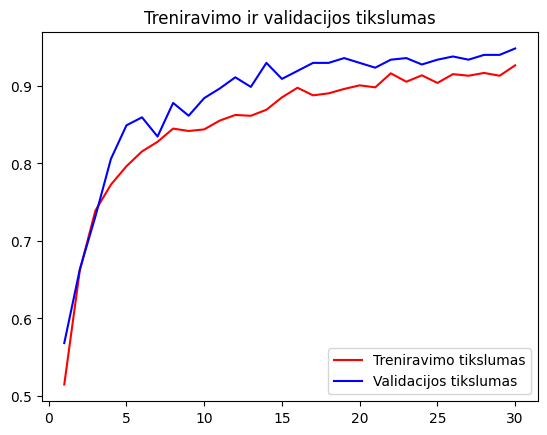

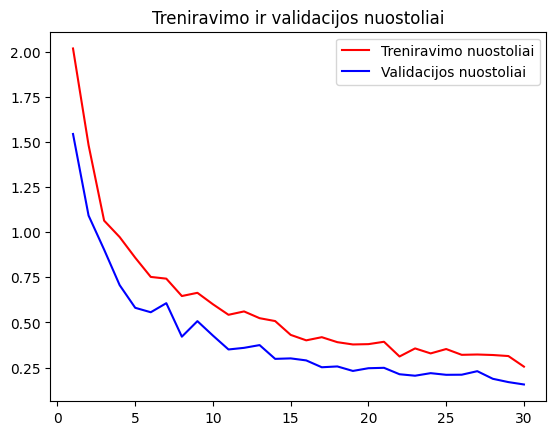

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_adam_0.0001_fold_0.h5


<ipython-input-30-06ebd8acceba>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 67ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       1.00      0.86      0.93       203
   pneumonia       0.97      0.97      0.97       139
     regular       0.90      1.00      0.95       263

    accuracy                           0.95       605
   macro avg       0.96      0.94      0.95       605
weighted avg       0.95      0.95      0.94       605

Accuracy: 0.9454545454545454
Specificity for covid: 1.00
Specificity for pneumonia: 0.99
Specificity for regular: 0.92
Macro-average Specificity: 0.97


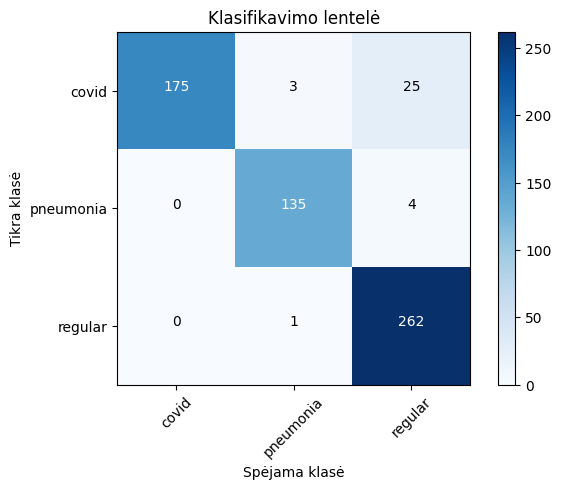

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 1
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 38s 390ms/step - loss: 2.0794 - accuracy: 0.5225 - auc_26: 0.7097 - val_loss: 1.7632 - val_accuracy: 0.5207 - val_auc_26: 0.7181
Epoch 2/30
61/61 [==============================] - 26s 429ms/step - loss: 1.3907 - accuracy: 0.6806 - auc_26: 0.8445 - val_loss: 1.2865 - val_accuracy: 0.6074 - val_auc_26: 0.8258
Epoch 3/30
61/61 [==============================] - 26s 424ms/step - loss: 1.1655 - accuracy: 0.7240 - auc_26: 0.8816 - val_loss: 0.9623 - val_accuracy: 0.7521 - val_auc_26: 0.9027
Epoch 4/30
61/61 [==============================] - 26s 429ms/step - loss: 0.9878 - accuracy: 0.7628 - auc_26: 0.9086 - val_loss: 0.7872 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

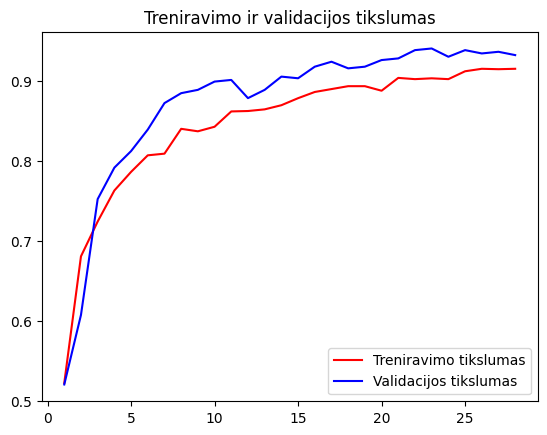

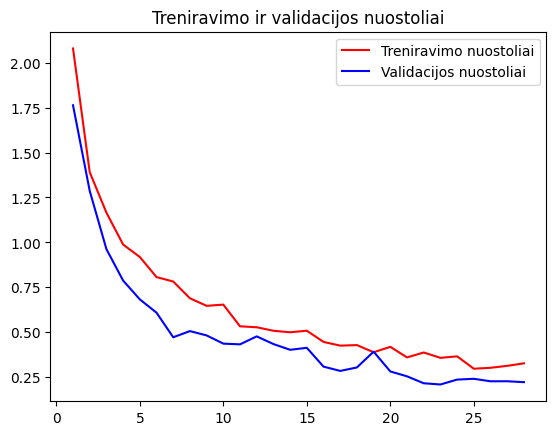

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_adam_0.0001_fold_1.h5


<ipython-input-30-06ebd8acceba>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 68ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.95      0.91      0.93       175
   pneumonia       0.99      0.92      0.96       152
     regular       0.91      0.97      0.94       278

    accuracy                           0.94       605
   macro avg       0.95      0.93      0.94       605
weighted avg       0.94      0.94      0.94       605

Accuracy: 0.9388429752066115
Specificity for covid: 0.98
Specificity for pneumonia: 1.00
Specificity for regular: 0.92
Macro-average Specificity: 0.96


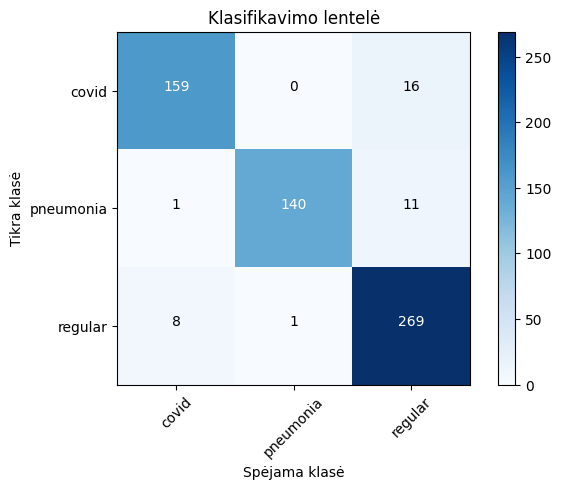

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 2
Class index 0: Weight 1.12
Class index 1: Weight 1.36
Class index 2: Weight 0.73
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 38s 391ms/step - loss: 1.9735 - accuracy: 0.5333 - auc_27: 0.7211 - val_loss: 1.7060 - val_accuracy: 0.5186 - val_auc_27: 0.7549
Epoch 2/30
61/61 [==============================] - 26s 429ms/step - loss: 1.3028 - accuracy: 0.6899 - auc_27: 0.8549 - val_loss: 1.1530 - val_accuracy: 0.6798 - val_auc_27: 0.8609
Epoch 3/30
61/61 [==============================] - 26s 424ms/step - loss: 1.1946 - accuracy: 0.7313 - auc_27: 0.8787 - val_loss: 0.9633 - val_accuracy: 0.7500 - val_auc_27: 0.9022
Epoch 4/30
61/61 [==============================] - 26s 427ms/step - loss: 0.9555 - accuracy: 0.7752 - auc_27: 0.9143 - val_loss: 0.7971 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

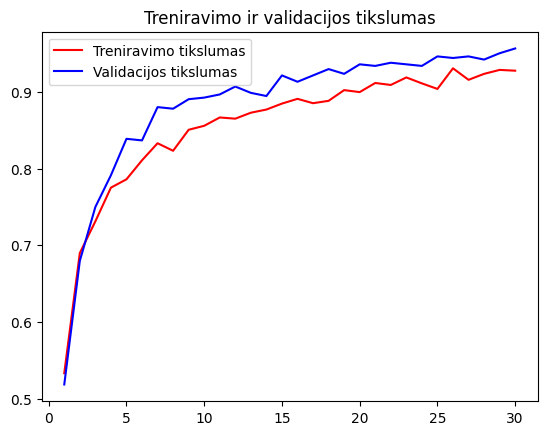

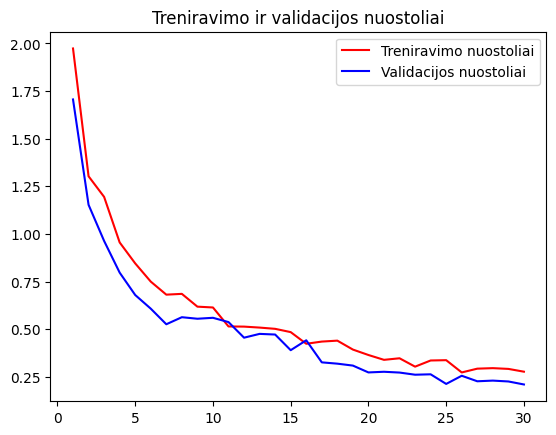

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_adam_0.0001_fold_2.h5


<ipython-input-30-06ebd8acceba>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 63ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.98      0.93      0.96       180
   pneumonia       0.96      0.96      0.96       136
     regular       0.95      0.98      0.97       289

    accuracy                           0.96       605
   macro avg       0.96      0.96      0.96       605
weighted avg       0.96      0.96      0.96       605

Accuracy: 0.9619834710743802
Specificity for covid: 0.99
Specificity for pneumonia: 0.99
Specificity for regular: 0.96
Macro-average Specificity: 0.98


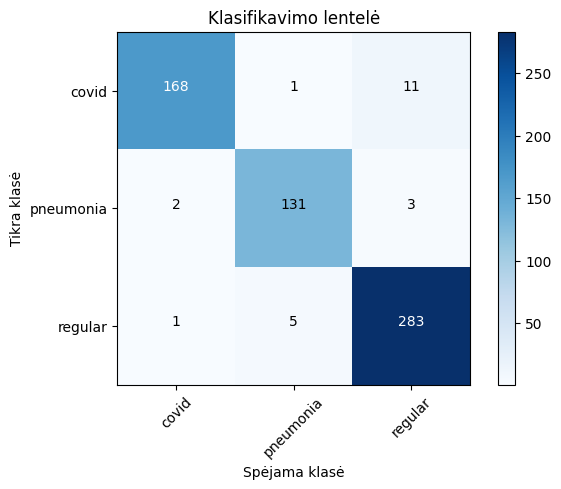

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 3
Class index 0: Weight 1.13
Class index 1: Weight 1.39
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 37s 388ms/step - loss: 2.1039 - accuracy: 0.5173 - auc_28: 0.6979 - val_loss: 1.6319 - val_accuracy: 0.5351 - val_auc_28: 0.7479
Epoch 2/30
61/61 [==============================] - 26s 429ms/step - loss: 1.4306 - accuracy: 0.6687 - auc_28: 0.8336 - val_loss: 1.1648 - val_accuracy: 0.6302 - val_auc_28: 0.8511
Epoch 3/30
61/61 [==============================] - 26s 423ms/step - loss: 1.1759 - accuracy: 0.7266 - auc_28: 0.8766 - val_loss: 0.8863 - val_accuracy: 0.7355 - val_auc_28: 0.9084
Epoch 4/30
61/61 [==============================] - 26s 424ms/step - loss: 1.0731 - accuracy: 0.7354 - auc_28: 0.8935 - val_loss: 0.6299 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

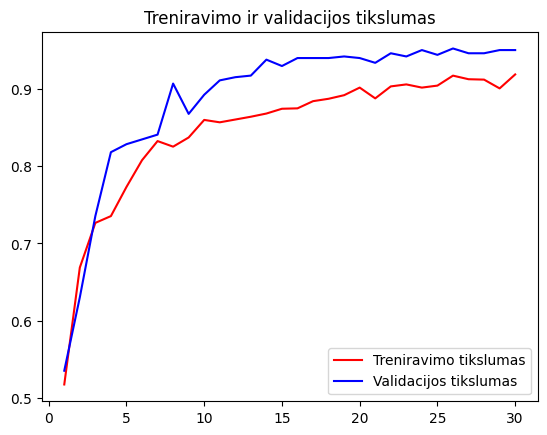

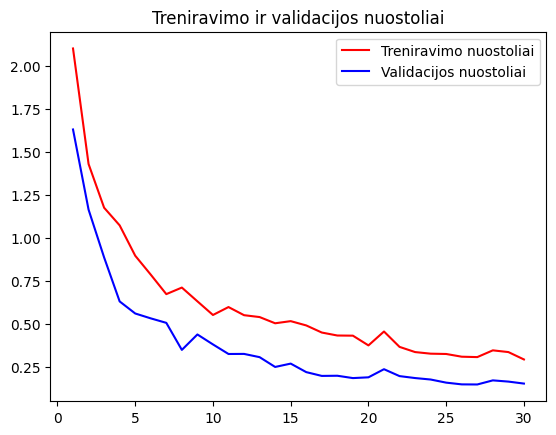

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_adam_0.0001_fold_3.h5


<ipython-input-30-06ebd8acceba>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 65ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.98      0.88      0.93       187
   pneumonia       0.95      0.97      0.96       145
     regular       0.92      0.98      0.95       273

    accuracy                           0.95       605
   macro avg       0.95      0.94      0.95       605
weighted avg       0.95      0.95      0.95       605

Accuracy: 0.9454545454545454
Specificity for covid: 0.99
Specificity for pneumonia: 0.98
Specificity for regular: 0.93
Macro-average Specificity: 0.97


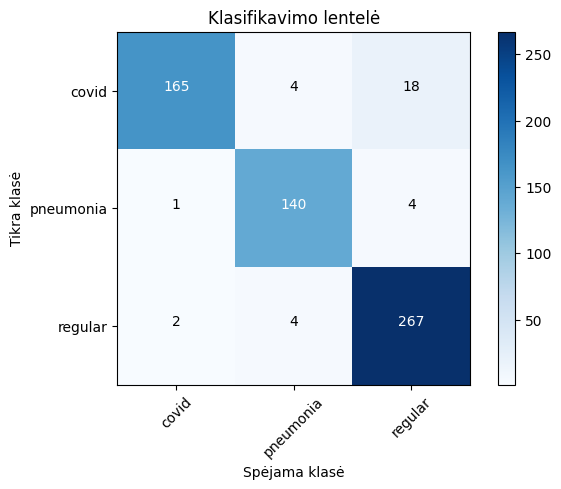

Found 1936 images belonging to 3 classes.
Found 604 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 4
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 38s 390ms/step - loss: 2.0818 - accuracy: 0.5181 - auc_29: 0.6960 - val_loss: 1.4840 - val_accuracy: 0.5930 - val_auc_29: 0.7797
Epoch 2/30
61/61 [==============================] - 27s 434ms/step - loss: 1.4162 - accuracy: 0.6746 - auc_29: 0.8367 - val_loss: 1.3589 - val_accuracy: 0.6074 - val_auc_29: 0.8236
Epoch 3/30
61/61 [==============================] - 26s 423ms/step - loss: 1.0973 - accuracy: 0.7397 - auc_29: 0.8889 - val_loss: 1.1847 - val_accuracy: 0.6963 - val_auc_29: 0.8688
Epoch 4/30
61/61 [==============================] - 27s 435ms/step - loss: 0.9544 - accuracy: 0.7624 - auc_29: 0.9097 - val_loss: 0.8617 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

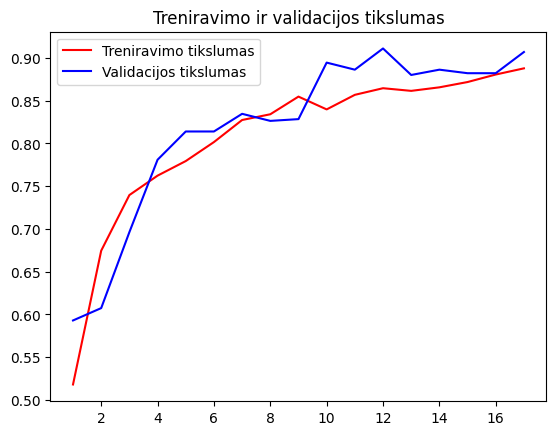

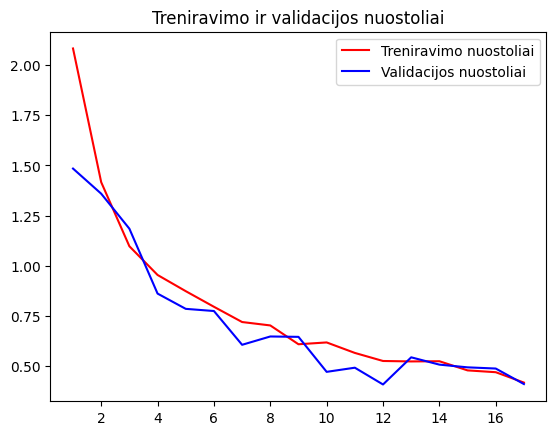

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_adam_0.0001_fold_4.h5


<ipython-input-30-06ebd8acceba>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 73ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.96      0.86      0.91       173
   pneumonia       0.96      0.90      0.93       154
     regular       0.88      0.97      0.92       277

    accuracy                           0.92       604
   macro avg       0.93      0.91      0.92       604
weighted avg       0.92      0.92      0.92       604

Accuracy: 0.9205298013245033
Specificity for covid: 0.99
Specificity for pneumonia: 0.99
Specificity for regular: 0.89
Macro-average Specificity: 0.95


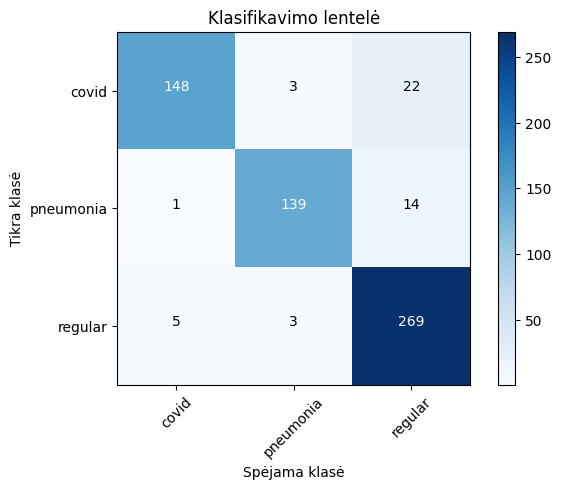

Final Metrics Across All Folds:
Average Accuracy: 0.94 ± 0.01
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.97 ± 0.02
Class covid - Average Recall: 0.89 ± 0.03
Class covid - Average F1 Score: 0.93 ± 0.02
Class pneumonia - Average Precision: 0.96 ± 0.02
Class pneumonia - Average Recall: 0.94 ± 0.03
Class pneumonia - Average F1 Score: 0.95 ± 0.01
Class regular - Average Precision: 0.91 ± 0.02
Class regular - Average Recall: 0.98 ± 0.01
Class regular - Average F1 Score: 0.94 ± 0.01


In [30]:
# For overall results
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    base_dir = f'/content/image_dataset/splits/fold_{fold}'
    train_dir = os.path.join(base_dir, 'train')
    test_dir = os.path.join(base_dir, 'test')
    val_dir = os.path.join(base_dir, 'val')


    # Data generators
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
        shuffle=False
    )

    val_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'
    )

    # Compute class weights
    class_weights_array = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_generator.classes),
        y=train_generator.classes
    )
    class_weights = {i: weight for i, weight in enumerate(class_weights_array)}

    print(f"Training fold {fold}")

    # Print the computed class weights
    for class_index, weight in class_weights.items():
        print(f"Class index {class_index}: Weight {weight:.2f}")

    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

    # Calculate the number of layers to make trainable
    total_layers = len(base_model.layers)
    layers_to_train = int(total_layers * 0.30)  # 30% of the total number of layers

    # Make the first 30% of layers trainable
    for layer in base_model.layers[:layers_to_train]:
        layer.trainable = True

    # Freeze the rest of the layers
    for layer in base_model.layers[layers_to_train:]:
        layer.trainable = False

    # Freeze the layers of the base model
    #base_model.trainable = False


    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  # Dropout added here
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)  # Another Dropout layer
    # Add a fully connected layer for classification
    output_layer = Dense(3, activation='softmax')(x)


    # Construct the final model
    model = Model(inputs=base_model.input, outputs=output_layer)

    #optimizer
    my_optimizer = Adam(learning_rate=0.0001)

    # Compile the model
    model.compile(optimizer=my_optimizer, loss=focal_loss(), metrics=['accuracy', AUC()])

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


    #model params
    total_params = model.count_params()
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    non_trainable_params = total_params - trainable_params

    print(f"Total parameters: {total_params}")
    print(f"Trainable parameters: {trainable_params}")
    print(f"Non-trainable parameters: {non_trainable_params}")

    # Train the model
    history = model.fit(
        train_generator,
        epochs=30,
        validation_data=val_generator,
        class_weight=class_weights,
        callbacks=[early_stopping]
    )

    #training results
    plot_training(history)

    # Save the model
    model_save_path = f'/content/drive/MyDrive/Bakis/ModelOutputs/focal_adam_0.0001_fold_{fold}.h5'
    model.save(model_save_path)
    print(f"Model saved to {model_save_path}")


    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")


## Focal loss + sgd + 0.0001

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 0
Class index 0: Weight 1.15
Class index 1: Weight 1.37
Class index 2: Weight 0.71
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 36s 428ms/step - loss: 2.5750 - accuracy: 0.3897 - auc_30: 0.5676 - val_loss: 1.8236 - val_accuracy: 0.4153 - val_auc_30: 0.6462
Epoch 2/30
61/61 [==============================] - 26s 431ms/step - loss: 2.0723 - accuracy: 0.4842 - auc_30: 0.6739 - val_loss: 1.5077 - val_accuracy: 0.6095 - val_auc_30: 0.7671
Epoch 3/30
61/61 [==============================] - 26s 426ms/step - loss: 1.7026 - accuracy: 0.5623 - auc_30: 0.7579 - val_loss: 1.2914 - val_accuracy: 0.6488 - val_auc_30: 0.8314
Epoch 4/30
61/61 [==============================] - 26s 431ms/step - loss: 1.6183 - accuracy: 0.6067 - auc_30: 0.7822 - val_loss: 1.1365 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

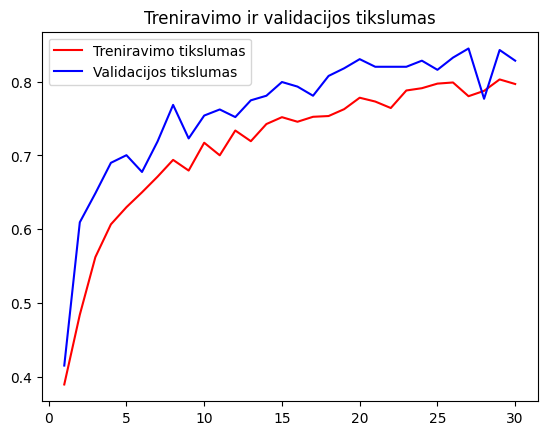

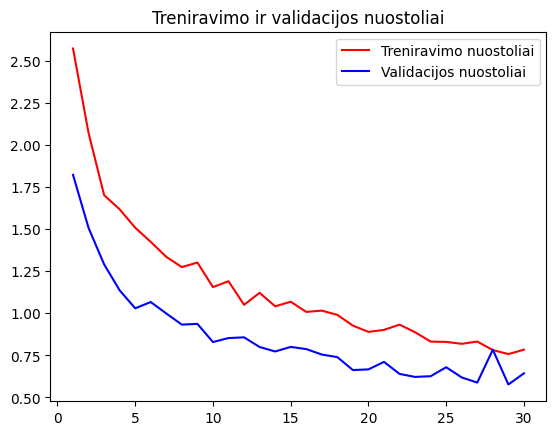

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_sgd_0.0001_fold_0.h5


<ipython-input-31-7e56e3d7c083>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 67ms/step
Results for fold 0
              precision    recall  f1-score   support

       covid       0.97      0.67      0.80       203
   pneumonia       0.82      0.89      0.85       139
     regular       0.79      0.94      0.86       263

    accuracy                           0.84       605
   macro avg       0.86      0.84      0.84       605
weighted avg       0.86      0.84      0.84       605

Accuracy: 0.8396694214876033
Specificity for covid: 0.99
Specificity for pneumonia: 0.94
Specificity for regular: 0.81
Macro-average Specificity: 0.91


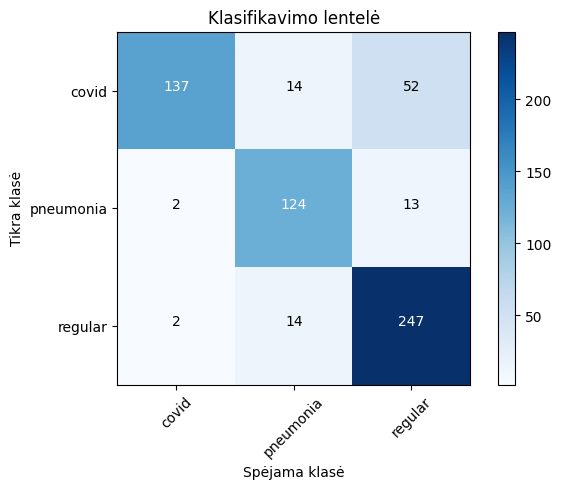

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 1
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 40s 431ms/step - loss: 2.4035 - accuracy: 0.4253 - auc_31: 0.6048 - val_loss: 1.7070 - val_accuracy: 0.4959 - val_auc_31: 0.7103
Epoch 2/30
61/61 [==============================] - 26s 431ms/step - loss: 1.9306 - accuracy: 0.5302 - auc_31: 0.7112 - val_loss: 1.4814 - val_accuracy: 0.5227 - val_auc_31: 0.7869
Epoch 3/30
61/61 [==============================] - 26s 427ms/step - loss: 1.7383 - accuracy: 0.5757 - auc_31: 0.7495 - val_loss: 1.3467 - val_accuracy: 0.5764 - val_auc_31: 0.8214
Epoch 4/30
61/61 [==============================] - 26s 424ms/step - loss: 1.5794 - accuracy: 0.6165 - auc_31: 0.7890 - val_loss: 1.2198 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

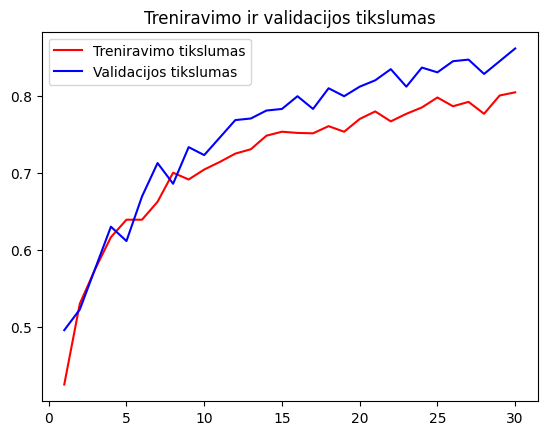

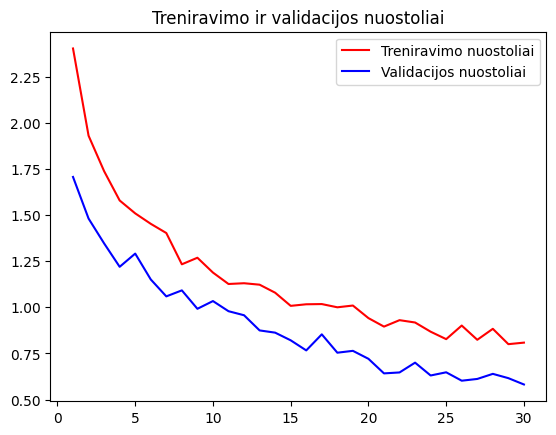

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_sgd_0.0001_fold_1.h5


<ipython-input-31-7e56e3d7c083>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 64ms/step
Results for fold 1
              precision    recall  f1-score   support

       covid       0.90      0.79      0.84       175
   pneumonia       0.91      0.85      0.88       152
     regular       0.85      0.95      0.90       278

    accuracy                           0.88       605
   macro avg       0.89      0.86      0.87       605
weighted avg       0.88      0.88      0.88       605

Accuracy: 0.8776859504132232
Specificity for covid: 0.96
Specificity for pneumonia: 0.97
Specificity for regular: 0.86
Macro-average Specificity: 0.93


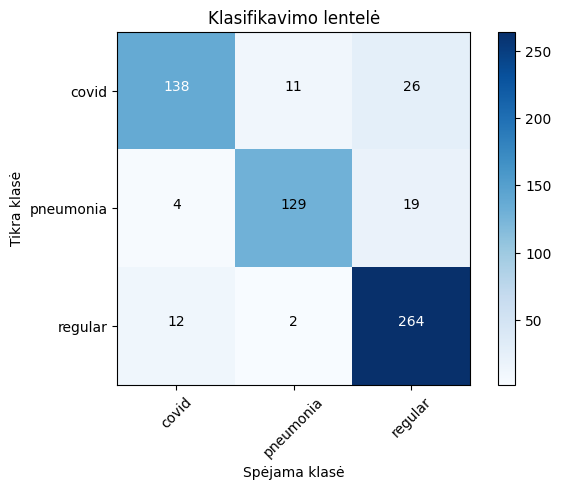

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 2
Class index 0: Weight 1.12
Class index 1: Weight 1.36
Class index 2: Weight 0.73
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 37s 441ms/step - loss: 2.5712 - accuracy: 0.4047 - auc_32: 0.5757 - val_loss: 1.7275 - val_accuracy: 0.5248 - val_auc_32: 0.6991
Epoch 2/30
61/61 [==============================] - 26s 429ms/step - loss: 1.9010 - accuracy: 0.5292 - auc_32: 0.7104 - val_loss: 1.4926 - val_accuracy: 0.5992 - val_auc_32: 0.7908
Epoch 3/30
61/61 [==============================] - 27s 436ms/step - loss: 1.6515 - accuracy: 0.5762 - auc_32: 0.7696 - val_loss: 1.3316 - val_accuracy: 0.6281 - val_auc_32: 0.8289
Epoch 4/30
61/61 [==============================] - 26s 427ms/step - loss: 1.5622 - accuracy: 0.6284 - auc_32: 0.7927 - val_loss: 1.1953 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

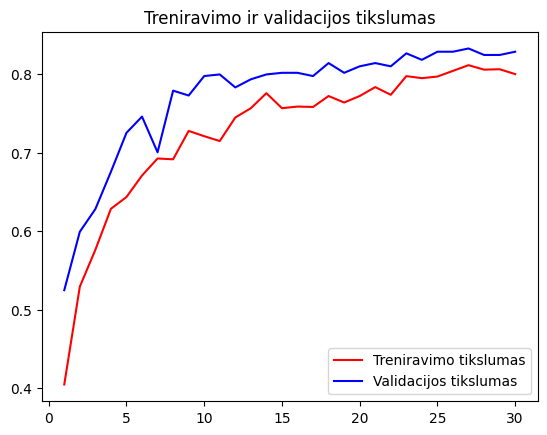

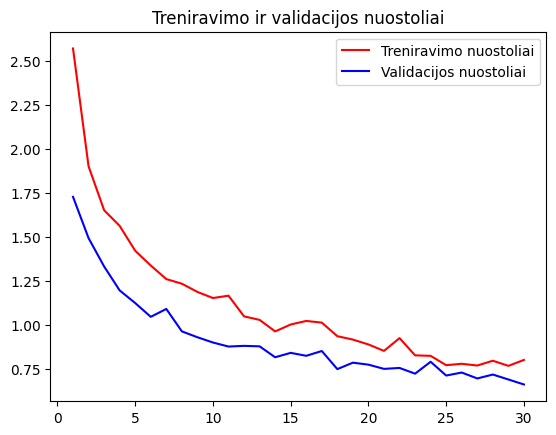

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_sgd_0.0001_fold_2.h5


<ipython-input-31-7e56e3d7c083>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 66ms/step
Results for fold 2
              precision    recall  f1-score   support

       covid       0.91      0.71      0.79       180
   pneumonia       0.97      0.84      0.90       136
     regular       0.80      0.96      0.87       289

    accuracy                           0.86       605
   macro avg       0.89      0.84      0.86       605
weighted avg       0.87      0.86      0.86       605

Accuracy: 0.8578512396694215
Specificity for covid: 0.97
Specificity for pneumonia: 0.99
Specificity for regular: 0.78
Macro-average Specificity: 0.91


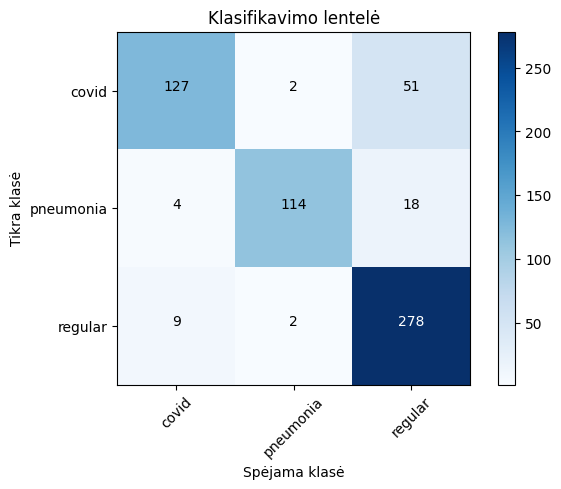

Found 1935 images belonging to 3 classes.
Found 605 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 3
Class index 0: Weight 1.13
Class index 1: Weight 1.39
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 37s 445ms/step - loss: 2.5754 - accuracy: 0.4114 - auc_33: 0.5856 - val_loss: 1.7111 - val_accuracy: 0.4835 - val_auc_33: 0.7036
Epoch 2/30
61/61 [==============================] - 27s 433ms/step - loss: 1.9829 - accuracy: 0.5152 - auc_33: 0.6982 - val_loss: 1.5270 - val_accuracy: 0.5186 - val_auc_33: 0.7732
Epoch 3/30
61/61 [==============================] - 27s 437ms/step - loss: 1.7397 - accuracy: 0.5886 - auc_33: 0.7635 - val_loss: 1.2113 - val_accuracy: 0.6446 - val_auc_33: 0.8583
Epoch 4/30
61/61 [==============================] - 26s 425ms/step - loss: 1.5617 - accuracy: 0.6134 - auc_33: 0.7896 - val_loss: 1.3222 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

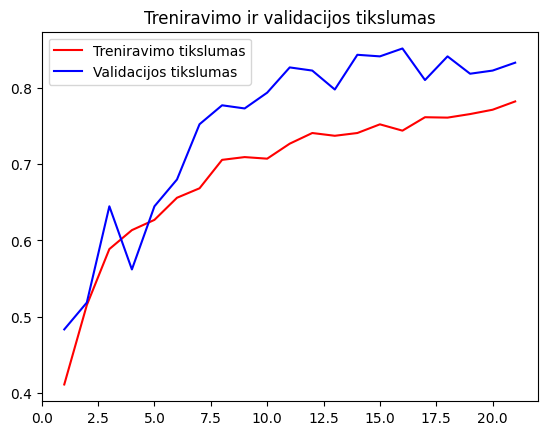

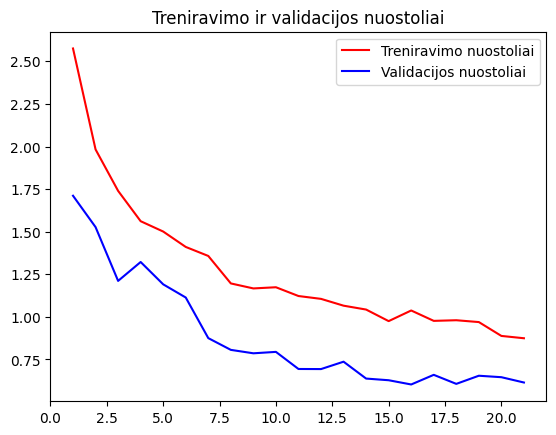

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_sgd_0.0001_fold_3.h5


<ipython-input-31-7e56e3d7c083>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 75ms/step
Results for fold 3
              precision    recall  f1-score   support

       covid       0.82      0.77      0.79       187
   pneumonia       0.78      0.86      0.82       145
     regular       0.86      0.84      0.85       273

    accuracy                           0.82       605
   macro avg       0.82      0.82      0.82       605
weighted avg       0.83      0.82      0.82       605

Accuracy: 0.824793388429752
Specificity for covid: 0.92
Specificity for pneumonia: 0.92
Specificity for regular: 0.88
Macro-average Specificity: 0.91


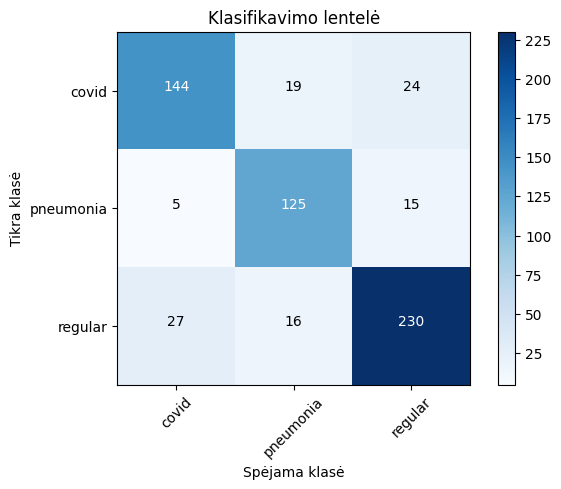

Found 1936 images belonging to 3 classes.
Found 604 images belonging to 3 classes.
Found 484 images belonging to 3 classes.
Training fold 4
Class index 0: Weight 1.11
Class index 1: Weight 1.40
Class index 2: Weight 0.72
Total parameters: 5364390
Trainable parameters: 1370869
Non-trainable parameters: 3993521
Epoch 1/30
61/61 [==============================] - 37s 443ms/step - loss: 2.4234 - accuracy: 0.4153 - auc_34: 0.5959 - val_loss: 1.6874 - val_accuracy: 0.5000 - val_auc_34: 0.7022
Epoch 2/30
61/61 [==============================] - 27s 442ms/step - loss: 1.9636 - accuracy: 0.5181 - auc_34: 0.7015 - val_loss: 1.3615 - val_accuracy: 0.6157 - val_auc_34: 0.8306
Epoch 3/30
61/61 [==============================] - 26s 431ms/step - loss: 1.7195 - accuracy: 0.5868 - auc_34: 0.7590 - val_loss: 1.2362 - val_accuracy: 0.6570 - val_auc_34: 0.8570
Epoch 4/30
61/61 [==============================] - 27s 442ms/step - loss: 1.5509 - accuracy: 0.6224 - auc_34: 0.7931 - val_loss: 1.1124 - val_acc

<ipython-input-21-216799bd4a55>:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, acc, 'r-', label='Treniravimo tikslumas', color='red')
<ipython-input-21-216799bd4a55>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, val_acc, 'b-', label='Validacijos tikslumas', color='blue')
<ipython-input-21-216799bd4a55>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'r-', label='Treniravimo nuostoliai', color='red')
<ipython-input-21-216799bd4a55>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.

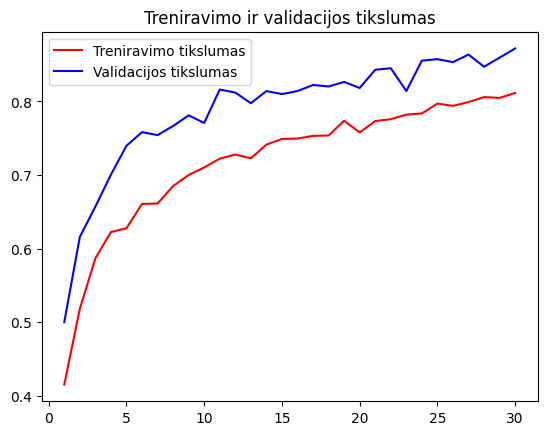

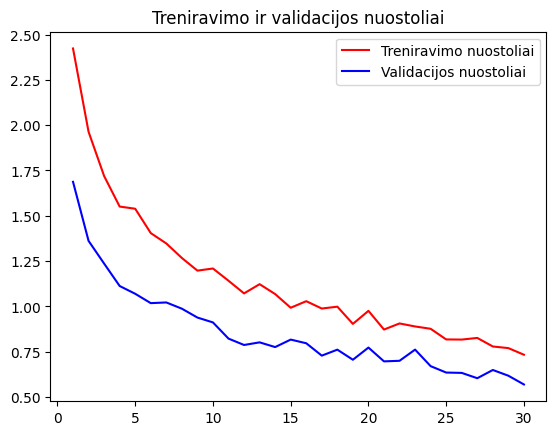

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/Bakis/ModelOutputs/focal_sgd_0.0001_fold_4.h5


<ipython-input-31-7e56e3d7c083>:120: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)


19/19 [==============================] - 3s 68ms/step
Results for fold 4
              precision    recall  f1-score   support

       covid       0.91      0.69      0.79       173
   pneumonia       0.89      0.90      0.89       154
     regular       0.82      0.94      0.88       277

    accuracy                           0.86       604
   macro avg       0.87      0.84      0.85       604
weighted avg       0.86      0.86      0.85       604

Accuracy: 0.8576158940397351
Specificity for covid: 0.97
Specificity for pneumonia: 0.96
Specificity for regular: 0.83
Macro-average Specificity: 0.92


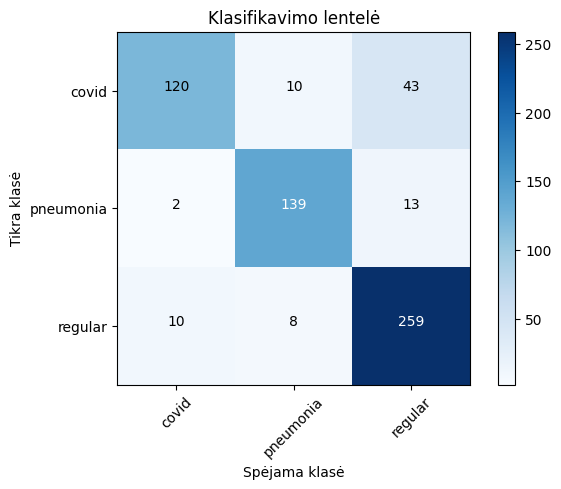

Final Metrics Across All Folds:
Average Accuracy: 0.85 ± 0.02
Final Metrics for Each Class Across All Folds:
Class covid - Average Precision: 0.90 ± 0.05
Class covid - Average Recall: 0.73 ± 0.04
Class covid - Average F1 Score: 0.80 ± 0.02
Class pneumonia - Average Precision: 0.87 ± 0.07
Class pneumonia - Average Recall: 0.87 ± 0.02
Class pneumonia - Average F1 Score: 0.87 ± 0.03
Class regular - Average Precision: 0.82 ± 0.03
Class regular - Average Recall: 0.93 ± 0.04
Class regular - Average F1 Score: 0.87 ± 0.02


In [31]:
# For overall results
all_accuracies = []
all_specificities = []
class_precision = {}
class_recall = {}
class_f1 = {}

for fold in range(5):
    base_dir = f'/content/image_dataset/splits/fold_{fold}'
    train_dir = os.path.join(base_dir, 'train')
    test_dir = os.path.join(base_dir, 'test')
    val_dir = os.path.join(base_dir, 'val')


    # Data generators
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',  # Use 'sparse' if you have integer labels and are using SparseCategoricalCrossentropy
        shuffle=False
    )

    val_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical'
    )

    # Compute class weights
    class_weights_array = class_weight.compute_class_weight(
        class_weight='balanced',
        classes=np.unique(train_generator.classes),
        y=train_generator.classes
    )
    class_weights = {i: weight for i, weight in enumerate(class_weights_array)}

    print(f"Training fold {fold}")

    # Print the computed class weights
    for class_index, weight in class_weights.items():
        print(f"Class index {class_index}: Weight {weight:.2f}")

    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

    # Calculate the number of layers to make trainable
    total_layers = len(base_model.layers)
    layers_to_train = int(total_layers * 0.30)  # 30% of the total number of layers

    # Make the first 30% of layers trainable
    for layer in base_model.layers[:layers_to_train]:
        layer.trainable = True

    # Freeze the rest of the layers
    for layer in base_model.layers[layers_to_train:]:
        layer.trainable = False

    # Freeze the layers of the base model
    #base_model.trainable = False


    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)  # Dropout added here
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)  # Another Dropout layer
    # Add a fully connected layer for classification
    output_layer = Dense(3, activation='softmax')(x)


    # Construct the final model
    model = Model(inputs=base_model.input, outputs=output_layer)

    #optimizer
    my_optimizer = SGD(learning_rate=0.0001, momentum=0.9)

    # Compile the model
    model.compile(optimizer=my_optimizer, loss=focal_loss(), metrics=['accuracy', AUC()])

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


    #model params
    total_params = model.count_params()
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    non_trainable_params = total_params - trainable_params

    print(f"Total parameters: {total_params}")
    print(f"Trainable parameters: {trainable_params}")
    print(f"Non-trainable parameters: {non_trainable_params}")

    # Train the model
    history = model.fit(
        train_generator,
        epochs=30,
        validation_data=val_generator,
        class_weight=class_weights,
        callbacks=[early_stopping]
    )

    #training results
    plot_training(history)

    # Save the model
    model_save_path = f'/content/drive/MyDrive/Bakis/ModelOutputs/focal_sgd_0.0001_fold_{fold}.h5'
    model.save(model_save_path)
    print(f"Model saved to {model_save_path}")


    # Predict the label of the test data
    test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
    predictions = model.predict(test_generator, steps=test_steps_per_epoch)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = test_generator.classes
    class_labels = list(test_generator.class_indices.keys())

    # Calculate the metrics
    report = classification_report(true_classes, predicted_classes, target_names=class_labels, output_dict=True)
    conf_matrix = confusion_matrix(true_classes, predicted_classes)
    accuracy = accuracy_score(true_classes, predicted_classes)

    print(f"Results for fold {fold}")
    print(classification_report(true_classes, predicted_classes, target_names=class_labels))
    print('Accuracy:', accuracy)

    # Calculate and print specificity for each class
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        class_name = list(test_generator.class_indices.keys())[i]
        print(f'Specificity for {class_name}: {spec:.2f}')

    # Calculate specificity for each class and compute macro-average
    specificities = []
    for i in range(len(test_generator.class_indices)):
        spec = calculate_specificity(conf_matrix, i)
        specificities.append(spec)

    # Calculate and print macro-average specificity
    macro_avg_specificity = np.mean(specificities)
    print(f'Macro-average Specificity: {macro_avg_specificity:.2f}')

    # Plot the confusion matrix
    plot_confusion_matrix(conf_matrix, classes=class_labels)
    plt.show()

    for label in class_labels:
        if label not in class_precision:
            class_precision[label] = []
            class_recall[label] = []
            class_f1[label] = []

        class_precision[label].append(report[label]['precision'])
        class_recall[label].append(report[label]['recall'])
        class_f1[label].append(report[label]['f1-score'])

    all_accuracies.append(accuracy)

# Bendrų rezultatų skaičiavimas
print("Final Metrics Across All Folds:")
print(f"Average Accuracy: {np.mean(all_accuracies):.2f} ± {np.std(all_accuracies):.2f}")

print("Final Metrics for Each Class Across All Folds:")
for label in class_labels:
    avg_precision = np.mean(class_precision[label])
    std_precision = np.std(class_precision[label])
    avg_recall = np.mean(class_recall[label])
    std_recall = np.std(class_recall[label])
    avg_f1 = np.mean(class_f1[label])
    std_f1 = np.std(class_f1[label])

    print(f"Class {label} - Average Precision: {avg_precision:.2f} ± {std_precision:.2f}")
    print(f"Class {label} - Average Recall: {avg_recall:.2f} ± {std_recall:.2f}")
    print(f"Class {label} - Average F1 Score: {avg_f1:.2f} ± {std_f1:.2f}")
